# HOUSING: PRICE PREDICTION

Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

    • Which variables are important to predict the price of variable?

    • How do these variables describe the price of the house?

Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

Technical Requirements:

    • Data contains 1460 entries each having 81 variables.

    • Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

    • Extensive EDA has to be performed to gain relationships of important variable and price.

    • Data contains numerical as well as categorical variable. You need to handle them accordingly.

    • You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 

    Parameters. 

    • You need to find important features which affect the price positively or negatively.

    • Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
    test.csv file.

The “Data file.csv” and “Data description.txt” are enclosed with this file

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve


import warnings
warnings.filterwarnings('ignore')

#Housing Price train data
df_train = pd.read_csv('housing_price_train.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [2]:
print(df_train.shape)

(1168, 81)


In [3]:
#Housing Price test data
df_test = pd.read_csv('housing_price_test.csv')
display(df_test.head())
print(df_test.shape)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

(292, 80)


In [4]:
dupli=df_train.duplicated()
df_train[dupli]


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

Duplicate Values are not avaialble  based on the nature of data collected

In [5]:
# strip whitespaces--Leading and trailing from column names 
df_train.columns = df_train.columns.str.strip()

In [6]:
#Count the empty (NaN, NAN, na) values in each column
df_train.isna().sum().sum()

5558

In [7]:
pd.set_option('display.max_columns', None) # show all columns in a dataframe
pd.set_option('display.max_rows', None) # show all rows in a dataframe

In [8]:
df_train.isna().sum() # checking for missing values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Using the isna and sum fuctions together on our dataframe we can take a look at missing data information. 

Looks like we do have missing values present in few of our columns. 

However we will check the percentage of missing information before we began treating them.

In [9]:
print("Missing column values in percentage:")
for col in df_train:
    #missing_values = np.round(df_train[col].isnull().sum().sort_values(ascending = False))
    percentage = np.round((df_train[col].isnull().sum()/df_train.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')
    #print(pd.concat([missing_values, percentage], axis = 1, keys =['Missing Values', '% Missing data']))

Missing column values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 18.322 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 93.408 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.599 %
MasVnrArea : 0.599 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.568 %
BsmtCond : 2.568 %
BsmtExposure : 2.654 %
BsmtFinType1 : 2.568 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.654 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.0 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
Bedr

So the column names and the percentage of missing data can be seen below: 
LotFrontage : 18.322 % Alley : 93.408 % MasVnrType : 0.599 % MasVnrArea : 0.599 % BsmtQual : 2.568 % BsmtCond : 2.568 % 
BsmtExposure : 2.654 % BsmtFinType1 : 2.568 % BsmtFinType2 : 2.654 % FireplaceQu : 47.175 % 
GarageType : 5.479 % GarageYrBlt : 5.479 % GarageFinish : 5.479 % GarageQual : 5.479 % GarageCond : 5.479 % 
PoolQC : 99.401 % Fence : 79.709 % MiscFeature : 96.233 %

Now I have decided to drop columns that have most of their values or almost of their values filled with a "null".

The columns that I am going to lose are as follows:
    
Alley : 93.408 % FireplaceQu : 47.175 % PoolQC : 99.401 % Fence : 79.709 % MiscFeature : 96.233 %

In [10]:
# data preprocessing 1
df_train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

Removed all the columns that had most of the values filled with null because treating them would mean manually entering data that was not 
originally collected properly and that would only make the model biased towards the few information we could get hold of.

In [11]:
print("We had {} Rows and {} Columns before dropping duplicates.".format(df_train.shape[0], df_train.shape[1]))
df_train.drop_duplicates(inplace=True)
print("We have {} Rows and {} Columns after dropping duplicates.".format(df_train.shape[0], df_train.shape[1]))

We had 1168 Rows and 76 Columns before dropping duplicates.
We have 1168 Rows and 76 Columns after dropping duplicates.


With the `drop_duplicates` option I tried to get rid of all the duplicate values present in our dataset.

However, we can see that there are no duplicate data present in our dataset.
I could not dropnull values as we were losing more data.

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In the above cell we see that there are 3 columns with float datatype,

35 columns with integer datatype and 38 columns with object datatype.

In [13]:
df_train.nunique().to_frame("Unique Values")

Unique Values
Id                      1168
MSSubClass                15
MSZoning                   5
LotFrontage              106
LotArea                  892
Street                     2
LotShape                   4
LandContour                4
Utilities                  1
LotConfig                  5
LandSlope                  3
Neighborhood              25
Condition1                 9
Condition2                 8
BldgType                   5
HouseStyle                 8
OverallQual               10
OverallCond                9
YearBuilt                110
YearRemodAdd              61
RoofStyle                  6
RoofMatl                   8
Exterior1st               14
Exterior2nd               15
MasVnrType                 4
MasVnrArea               283
ExterQual                  4
ExterCond                  5
Foundation                 6
BsmtQual                   4
BsmtCond                   4
BsmtExposure               4
BsmtFinType1               6
BsmtFinSF1               551
BsmtFinType2               6
BsmtFinSF2               122
BsmtUnfSF                681
TotalBsmtSF              636
Heating                    6
HeatingQC                  5
CentralAir                 2
Electrical                 5
1stFlrSF                 669
2ndFlrSF                 351
LowQualFinSF              21
GrLivArea                746
BsmtFullBath               4
BsmtHalfBath               3
FullBath                   4
HalfBath                   3
BedroomAbvGr               8
KitchenAbvGr               4
KitchenQual                4
TotRmsAbvGrd              12
Functional                 7
Fireplaces                 4
GarageType                 6
GarageYrBlt               97
GarageFinish               3
GarageCars                 5
GarageArea               392
GarageQual                 5
GarageCond                 5
PavedDrive                 3
WoodDeckSF               244
OpenPorchSF              176
EnclosedPorch            106
3SsnPorch                 18
ScreenPorch               65
PoolArea                   8
MiscVal                   20
MoSold                    12
YrSold                     5
SaleType                   9
SaleCondition              6
SalePrice                581

We are taking a look at all the unique value information present in each of the columns and remove any column
that has all the rows filled with same value 

or 

all with different unique values since they are not gonna help while building our machine learning model.

In [14]:
# data preprocessing 2
df_train.drop(["Id", "Utilities"], axis=1, inplace=True)

I see that column Id has all the rows filled with unique data while the column Utilities has only 1 unique value 
occupying all the rows

so they both are pretty useless and I have gotten rid of them from our dataframe.

In [15]:
object_datatype = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'O':
        object_datatype.append(x)        
print(f"Object Datatype Column Names", object_datatype)

numeric_datatype = []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'int64' or df_train.dtypes[x] == 'float64':
        numeric_datatype.append(x)
print(f"\nNumeric Datatype Column Names:", numeric_datatype)

Object Datatype Column Names ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numeric Datatype Column Names: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 

Since we have numeric as well as object datatype values I have separated those columns names in 2 different list variables 

that would be usefull in further analysis.

In [16]:
df_train.describe().T

count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       3.0  
GarageYrBlt      1980.0    2002.0    2010.0  
GarageC

Using the describe method in transpose format I am taking a look at all the numeric value details 

and basically the count, mean, standard deviation, min, 25%, 50%, 75% and max quartile values.

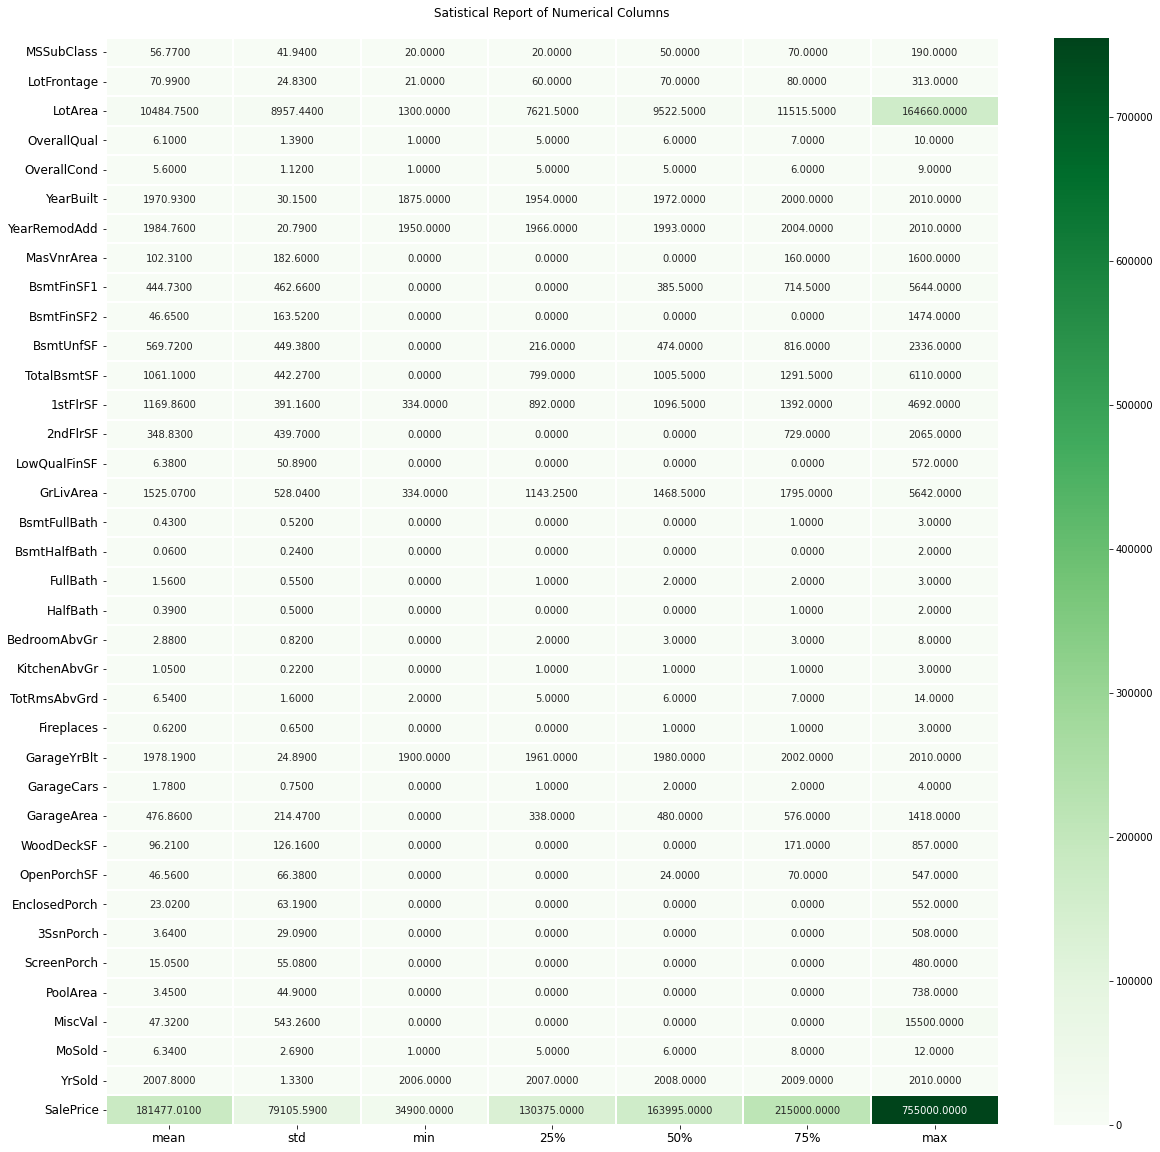

In [17]:
# visualizing the statistical description of numeric datatype columns
plt.figure(figsize = (20,20))
sns.heatmap(round(df_train.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="Greens")              
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [18]:
for col in object_datatype:
    print(col)
    print(df_train[col].value_counts())
    print("="*120)

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64
Condition1
Norm      1005
Feedr       67


In the above cell I am taking a look at all the unique value details present in columns 

that have object datatype values stored in them.

In [19]:
df_train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.365220 -0.124151     0.070462    -0.056978   
LotFrontage     -0.365220     1.000000  0.557257     0.247809    -0.053345   
LotArea         -0.124151     0.557257  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.247809  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.053345  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.118554  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.096050  0.027228     0.555945     0.080669   
MasVnrArea       0.027868     0.202225  0.121448     0.409163    -0.137882   
BsmtFinSF1      -0.052236     0.247780  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.002514  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.123943  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.386261  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.448186  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.099250  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007885 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.410414  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.104255  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001528  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.189321  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.053168  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.264010  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002890 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.351969  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.262076  0.285983     0.390067    -0.013632   
GarageYrBlt      0.077630     0.061101 -0.034981     0.541719    -0.318278   
GarageCars      -0.027639     0.276798  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.344908  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.101751  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.167092  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.023118 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.059508  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.033111  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.223429  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.004559  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.025046  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004296 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.341294  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.027868   -0.052236   -0.062403   
LotFrontage     0.118554      0.096050    0.202225    0.247780    0.002514   
LotArea         0.005506      0.027228    0.121448    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.409163    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.137882   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.323006    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.181869    0.114430   -0.044694   
MasVnrArea      0.323006      0.181869    1.000000    0.267066   -0.065723   
BsmtFinSF1      0.227933      0.114430    0.267066    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.065723   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.109850   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.366833    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

Checking the correlation values for all the numeric datatype columns.

In [20]:
print("Missing Value Data:")
print(df_train.isnull().sum())
print("\nDataframe Information:")
df_train.info()

Missing Value Data:
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath      

Performing analysis in the above cell I was able to come to a conclusion on how I would want to handle the missing data issue in my dataset. I am planning to replace the object datatype columns with mode values and numeric datatype columns with it's mean values.

Mode:

    MasVnrType
    BsmtQual
    BsmtCond
    BsmtExposure
    BsmtFinType1
    BsmtFinType2
    GarageType
    GarageFinish
    GarageQual
    GarageCond
    
Mean:

    LotFrontage
    MasVnrArea
    GarageYrBlt

# Filling the missing values using mean and mode options

In [21]:
# data preprocessing 3
mode = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType",
        "GarageFinish", "GarageQual", "GarageCond"]
mean = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for i in mode:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])
    
for j in mean:
    df_train[j] = df_train[j].fillna(df_train[j].mean())
    
print("Missing values count after filling the data")
print(df_train.isna().sum())

Missing values count after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitche

Great it looks like we have handled the missing values issue and now none of the columns have any null value in them.

In [22]:
print("\nDataframe Information:")
df_train.info()


Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null

# Visualization

In [23]:
print(df_train.nunique().sort_values())
print(df_train.shape)

CentralAir         2
Street             2
GarageFinish       3
HalfBath           3
LandSlope          3
BsmtHalfBath       3
PavedDrive         3
BsmtExposure       4
BsmtCond           4
BsmtQual           4
MasVnrType         4
Fireplaces         4
KitchenQual        4
ExterQual          4
FullBath           4
KitchenAbvGr       4
BsmtFullBath       4
LotShape           4
LandContour        4
Electrical         5
MSZoning           5
YrSold             5
ExterCond          5
LotConfig          5
BldgType           5
GarageCond         5
HeatingQC          5
GarageQual         5
GarageCars         5
GarageType         6
SaleCondition      6
BsmtFinType2       6
Heating            6
Foundation         6
RoofStyle          6
BsmtFinType1       6
Functional         7
RoofMatl           8
PoolArea           8
HouseStyle         8
Condition2         8
BedroomAbvGr       8
OverallCond        9
Condition1         9
SaleType           9
OverallQual       10
TotRmsAbvGrd      12
MoSold       

Sorted with the unique values column name list  with least unique values and the one's with the most in them.

In [24]:
single = ["CentralAir", "Street", "GarageFinish", "HalfBath", "LandSlope", "BsmtHalfBath", "PavedDrive", "BsmtExposure",
         "BsmtCond", "BsmtQual", "MasVnrType", "Fireplaces", "KitchenQual", "ExterQual", "FullBath", "KitchenAbvGr",
         "BsmtFullBath", "LotShape", "LandContour", "Electrical", "MSZoning", "YrSold", "ExterCond", "LotConfig",
         "BldgType", "GarageCond", "HeatingQC", "GarageQual", "GarageCars", "GarageType", "SaleCondition", "BsmtFinType2",
         "Heating", "Foundation", "RoofStyle", "BsmtFinType1", "Functional", "RoofMatl", "PoolArea", "HouseStyle",
         "Condition2", "BedroomAbvGr", "OverallCond", "Condition1", "SaleType"]

double = ["OverallQual", "TotRmsAbvGrd", "MoSold", "Exterior1st", "MSSubClass", "Exterior2nd", "3SsnPorch", "MiscVal", 
          "LowQualFinSF", "Neighborhood", "YearRemodAdd", "ScreenPorch", "GarageYrBlt"]

triple = ["EnclosedPorch", "LotFrontage", "YearBuilt", "BsmtFinSF2", "OpenPorchSF", "WoodDeckSF", "MasVnrArea", 
          "2ndFlrSF", "GarageArea", "BsmtFinSF1", "SalePrice", "TotalBsmtSF", "1stFlrSF", "BsmtUnfSF", "GrLivArea", 
          "LotArea"]

I have separated the column names as per the unique values they hold in single digit, double digit and triple digit formats.

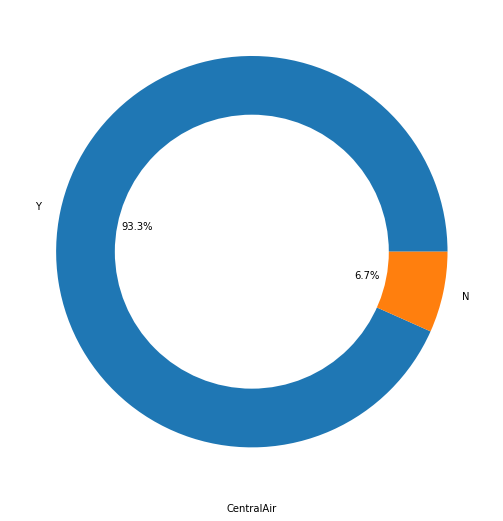

<Figure size 432x288 with 0 Axes>

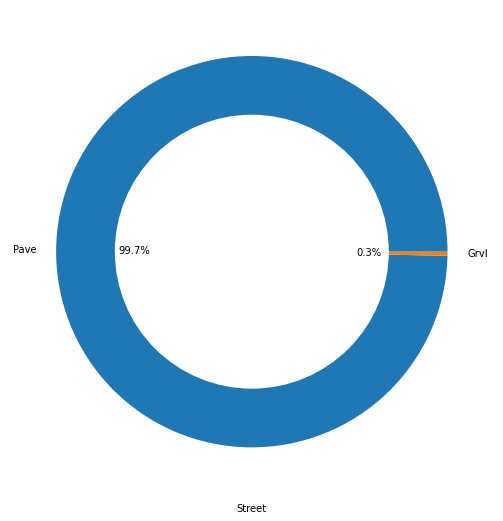

<Figure size 432x288 with 0 Axes>

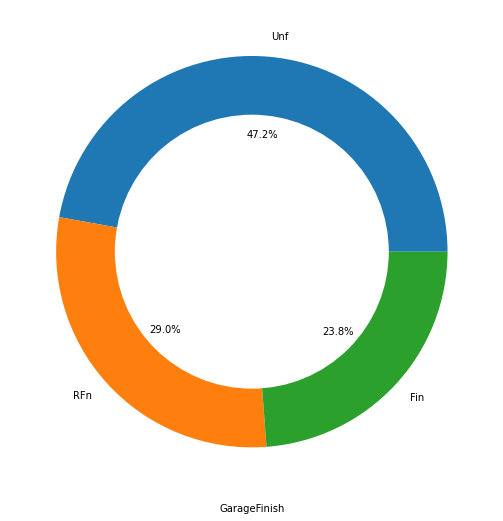

<Figure size 432x288 with 0 Axes>

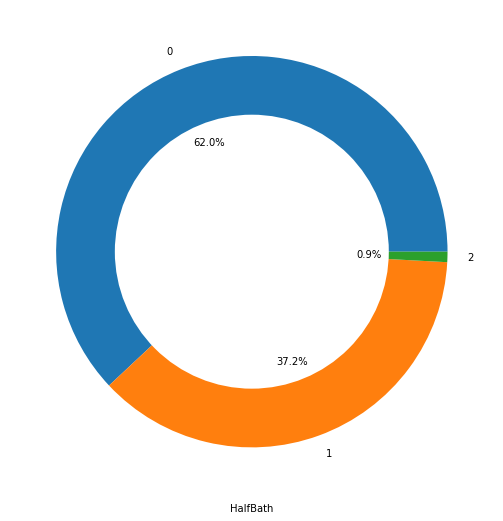

<Figure size 432x288 with 0 Axes>

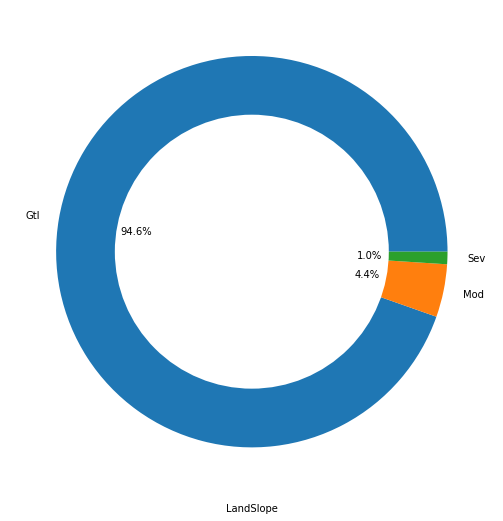

<Figure size 432x288 with 0 Axes>

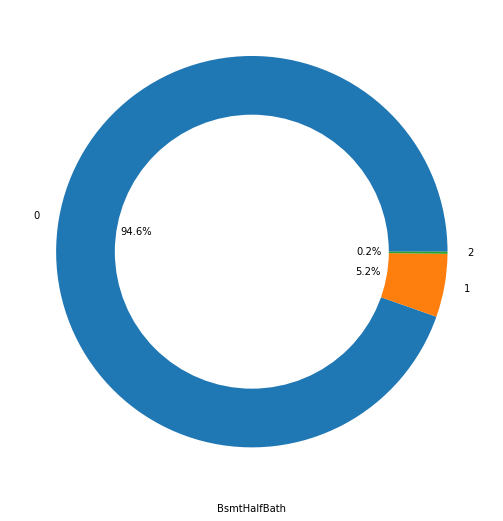

<Figure size 432x288 with 0 Axes>

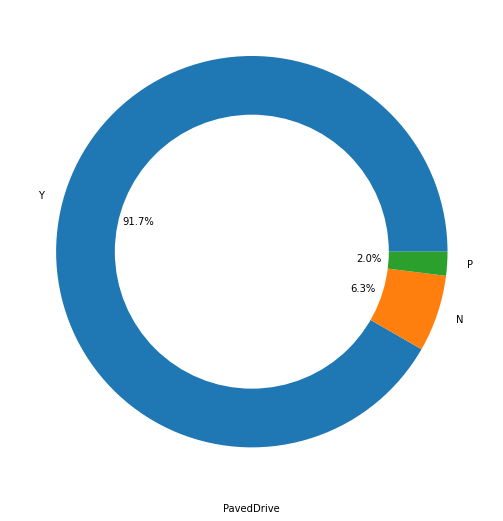

<Figure size 432x288 with 0 Axes>

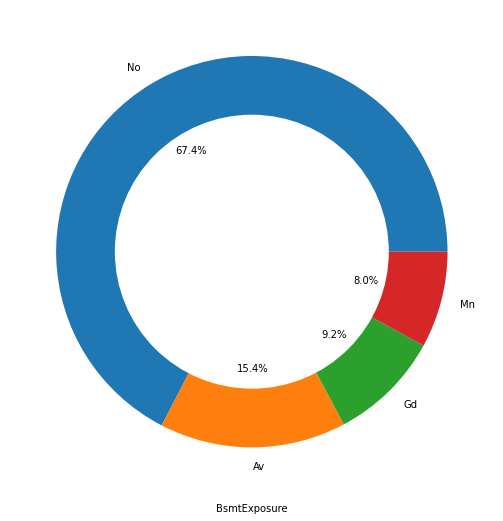

<Figure size 432x288 with 0 Axes>

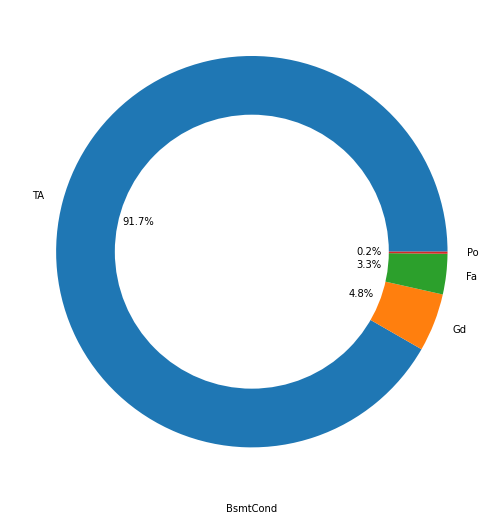

<Figure size 432x288 with 0 Axes>

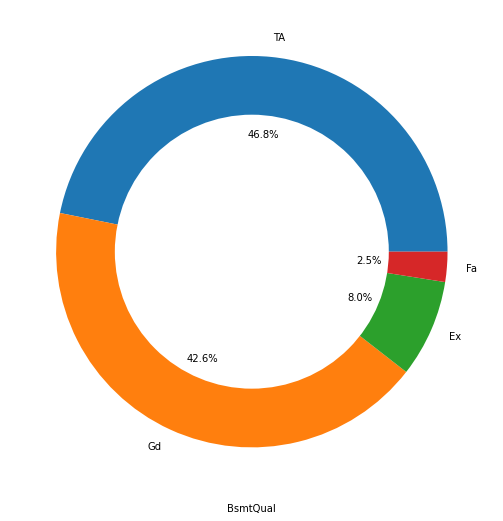

<Figure size 432x288 with 0 Axes>

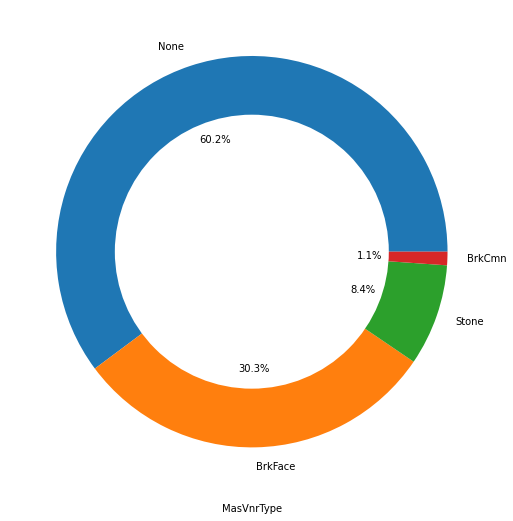

<Figure size 432x288 with 0 Axes>

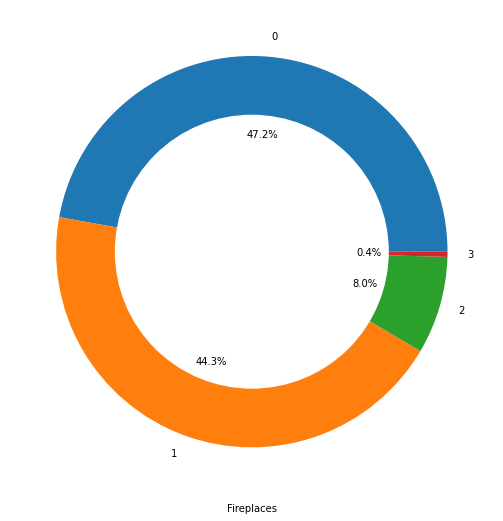

<Figure size 432x288 with 0 Axes>

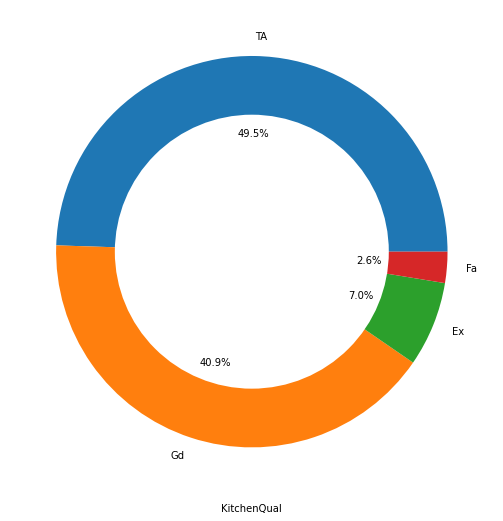

<Figure size 432x288 with 0 Axes>

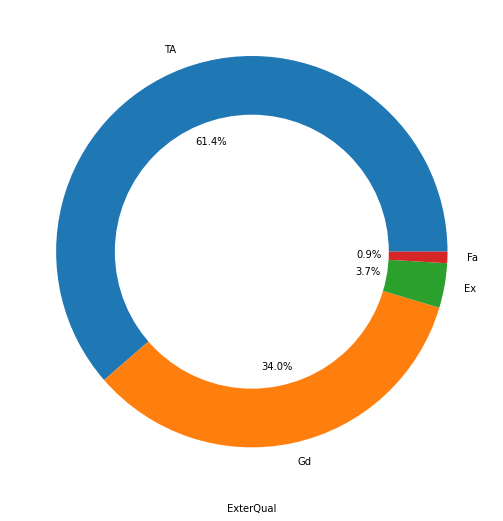

<Figure size 432x288 with 0 Axes>

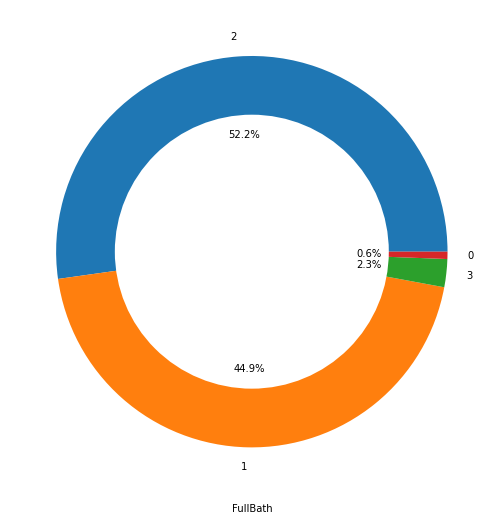

<Figure size 432x288 with 0 Axes>

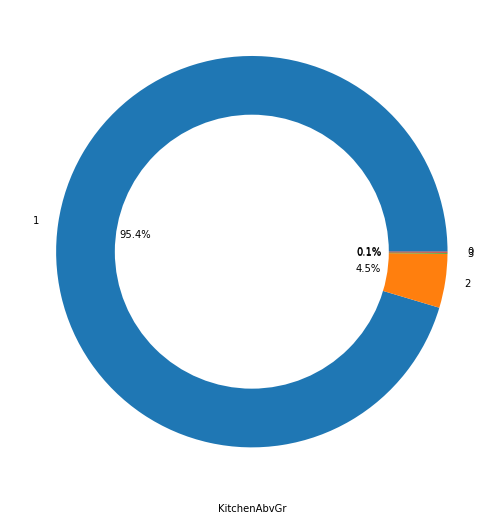

<Figure size 432x288 with 0 Axes>

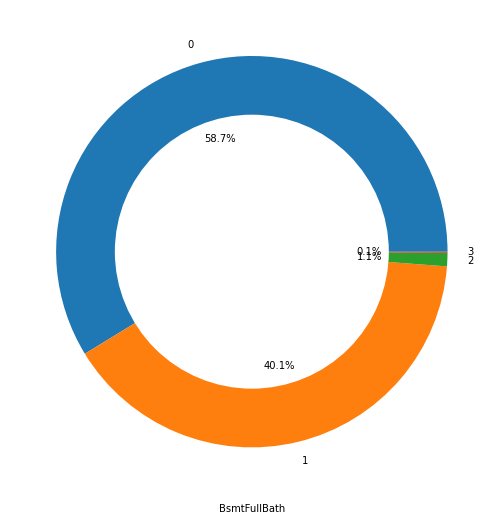

<Figure size 432x288 with 0 Axes>

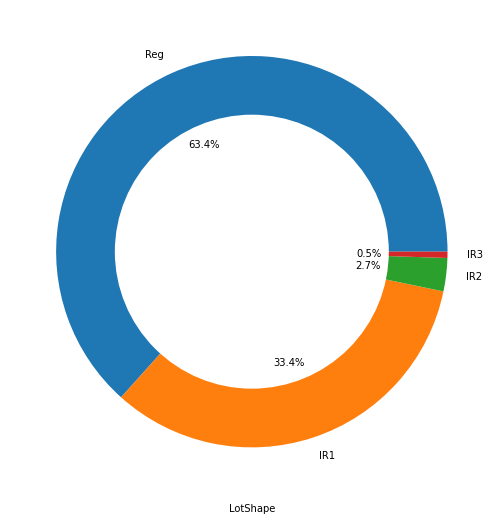

<Figure size 432x288 with 0 Axes>

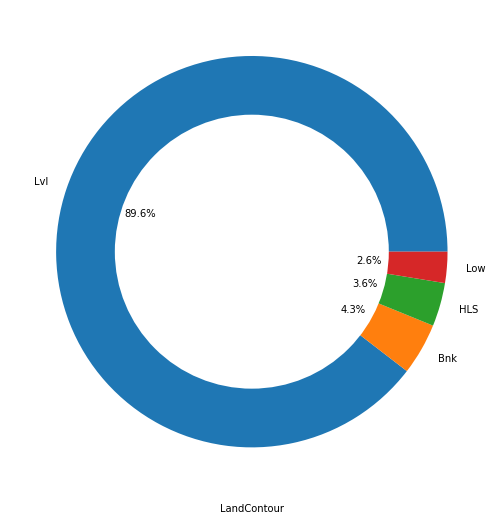

<Figure size 432x288 with 0 Axes>

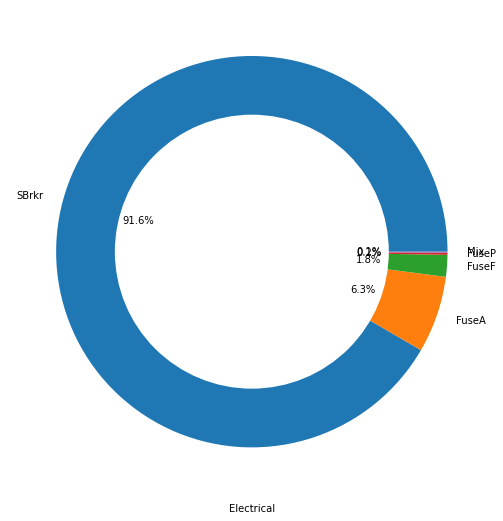

<Figure size 432x288 with 0 Axes>

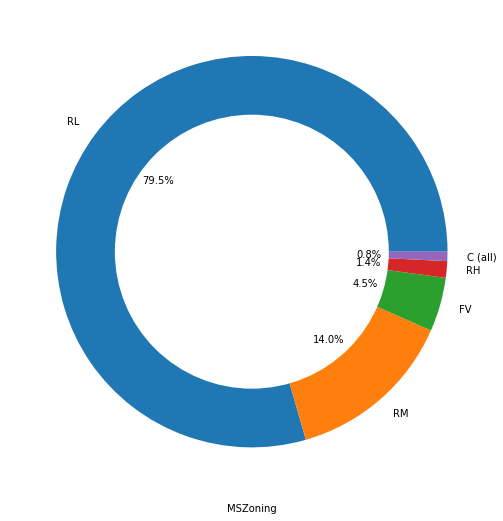

<Figure size 432x288 with 0 Axes>

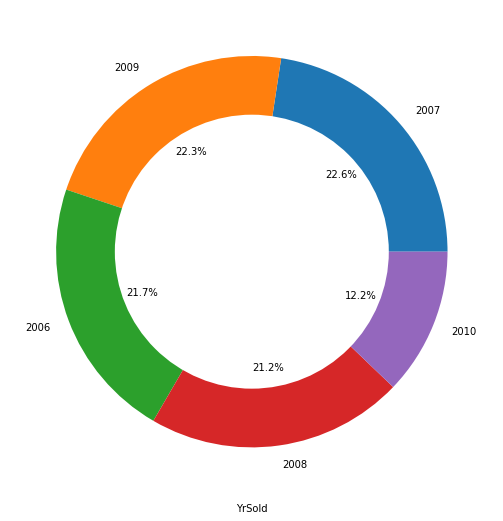

<Figure size 432x288 with 0 Axes>

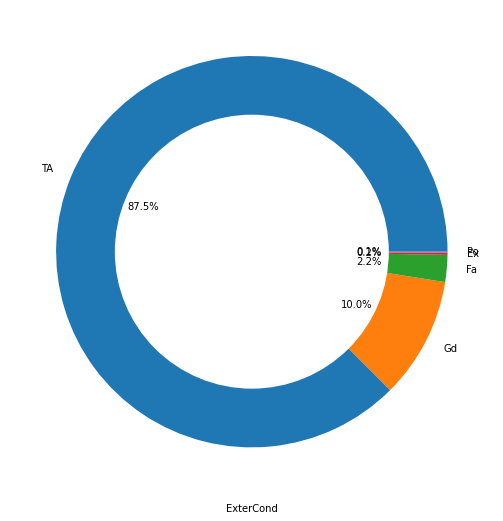

<Figure size 432x288 with 0 Axes>

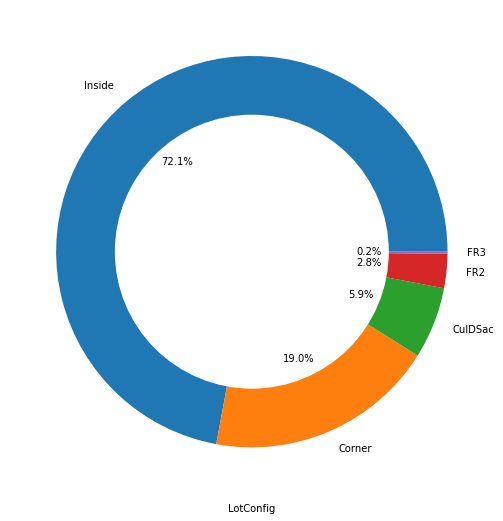

<Figure size 432x288 with 0 Axes>

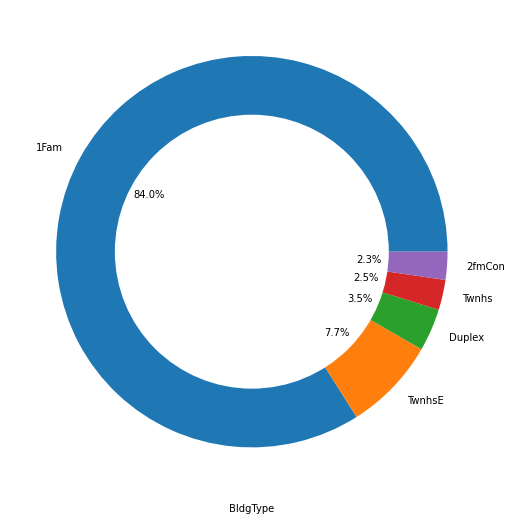

<Figure size 432x288 with 0 Axes>

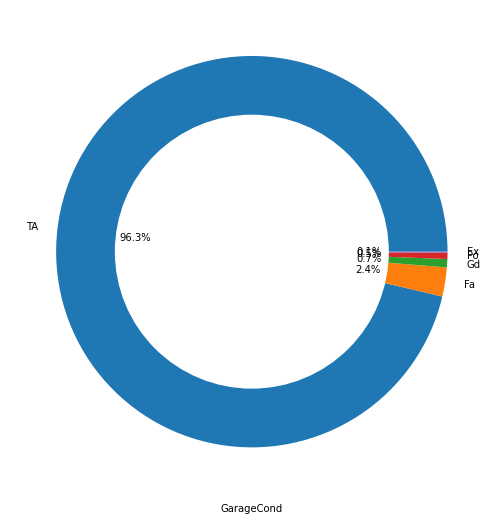

<Figure size 432x288 with 0 Axes>

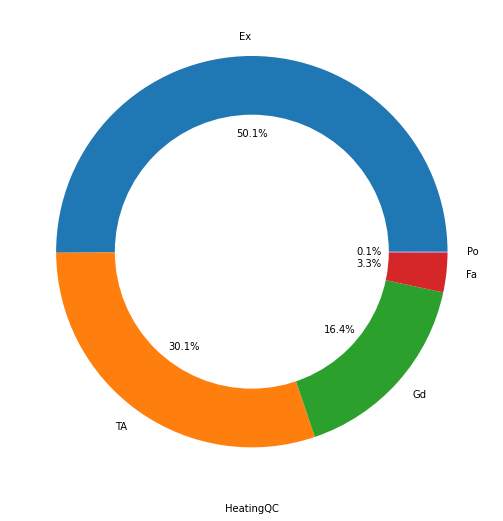

<Figure size 432x288 with 0 Axes>

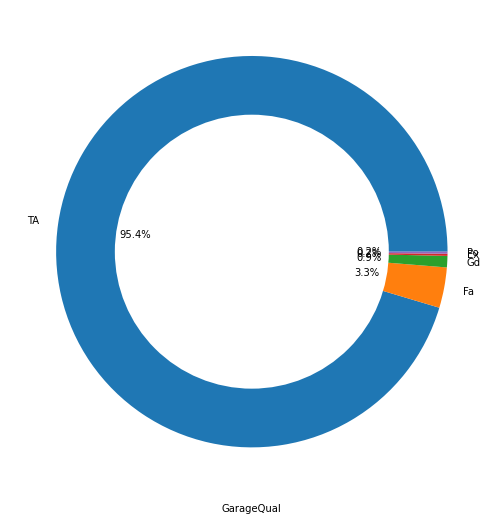

<Figure size 432x288 with 0 Axes>

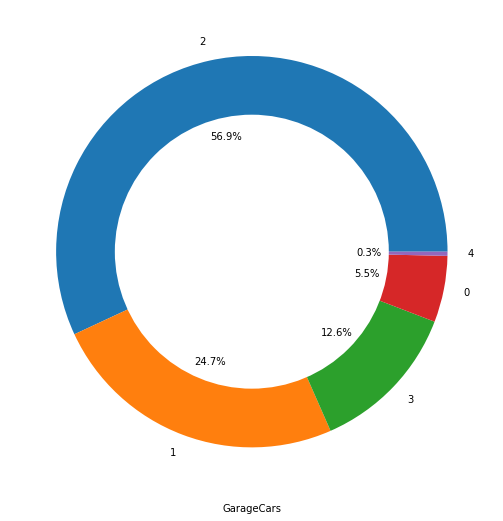

<Figure size 432x288 with 0 Axes>

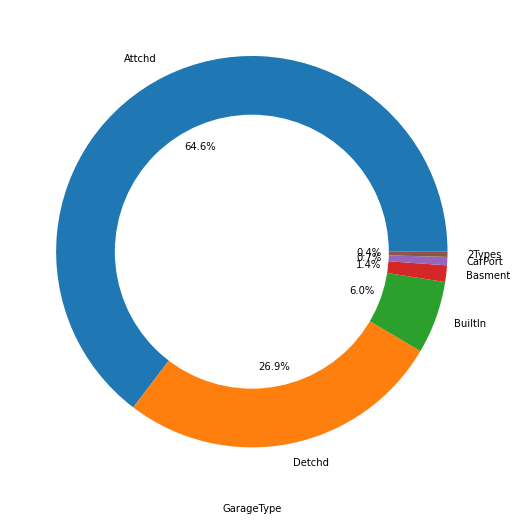

<Figure size 432x288 with 0 Axes>

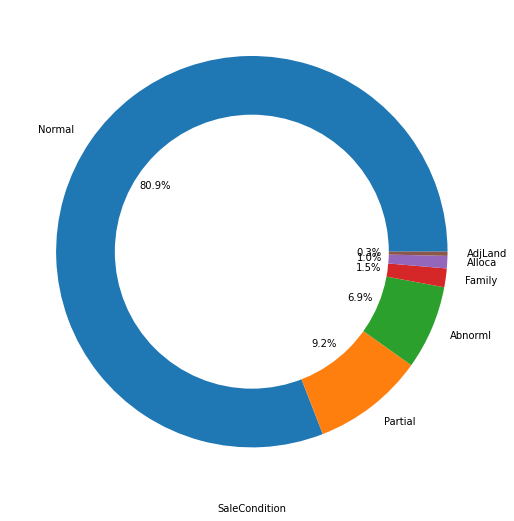

<Figure size 432x288 with 0 Axes>

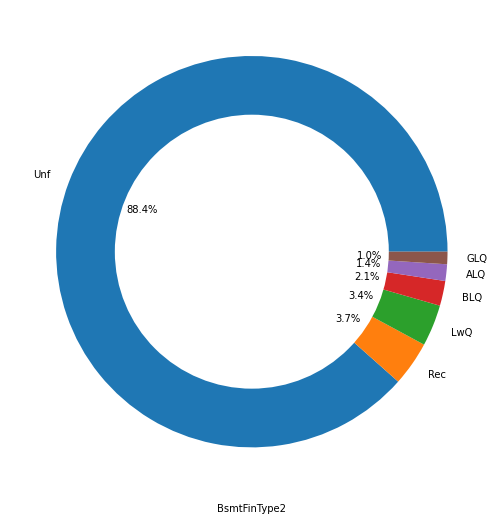

<Figure size 432x288 with 0 Axes>

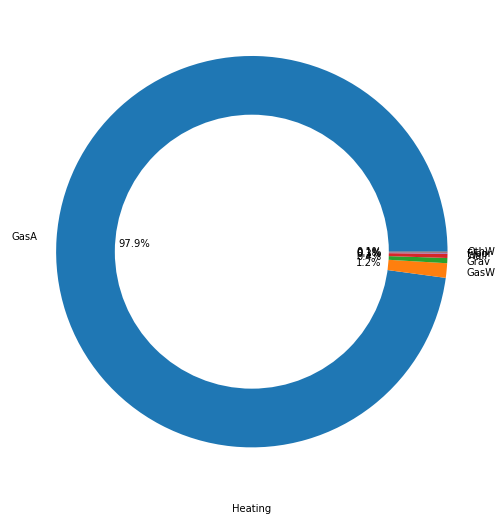

<Figure size 432x288 with 0 Axes>

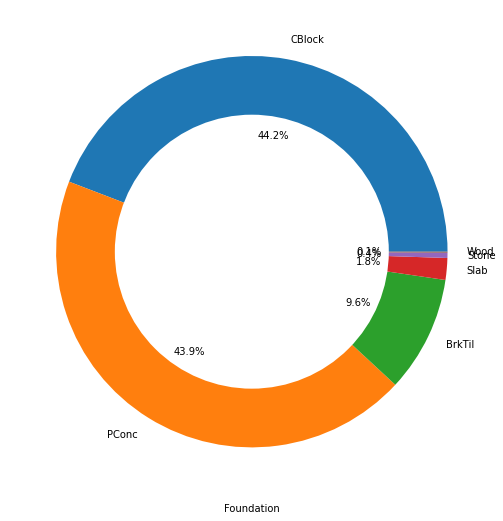

<Figure size 432x288 with 0 Axes>

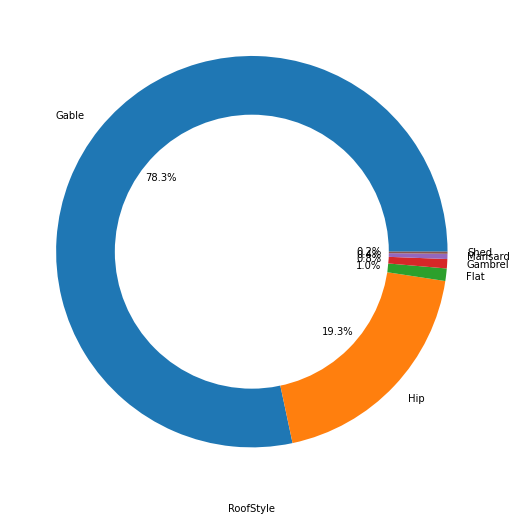

<Figure size 432x288 with 0 Axes>

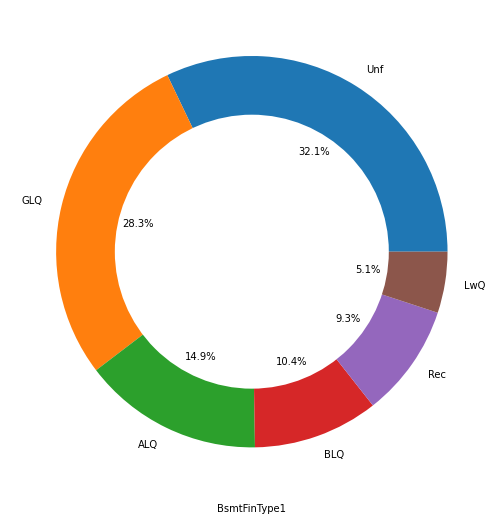

<Figure size 432x288 with 0 Axes>

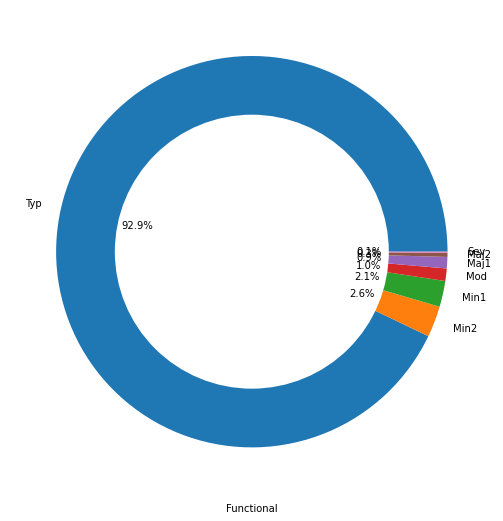

<Figure size 432x288 with 0 Axes>

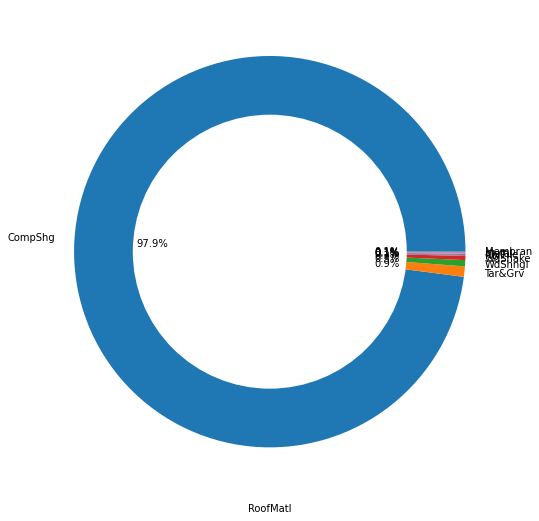

<Figure size 432x288 with 0 Axes>

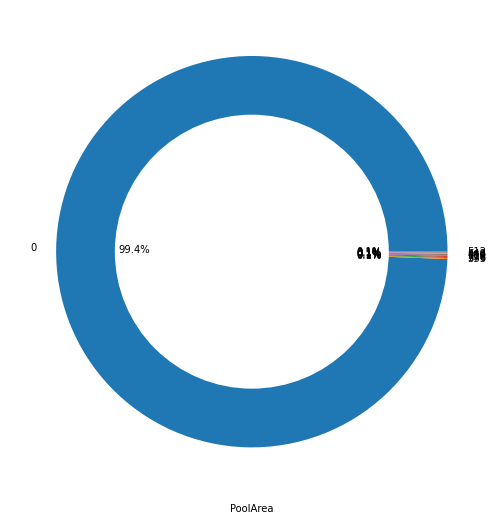

<Figure size 432x288 with 0 Axes>

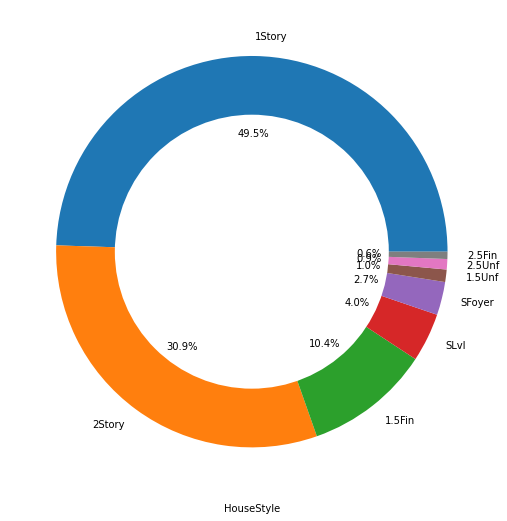

<Figure size 432x288 with 0 Axes>

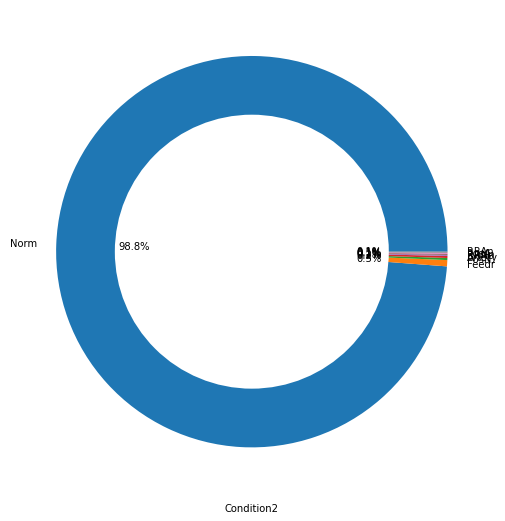

<Figure size 432x288 with 0 Axes>

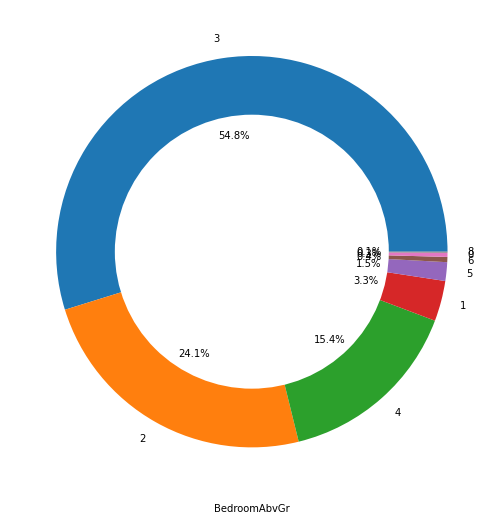

<Figure size 432x288 with 0 Axes>

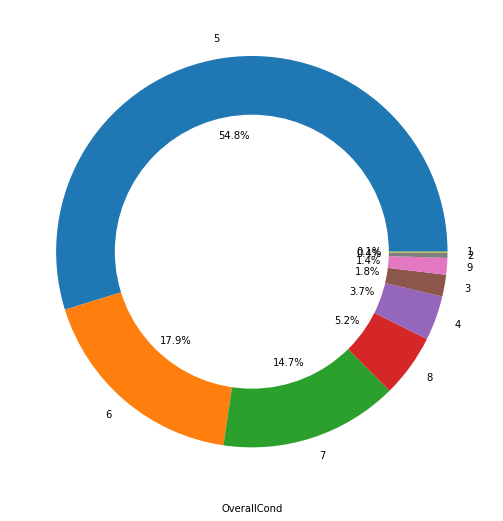

<Figure size 432x288 with 0 Axes>

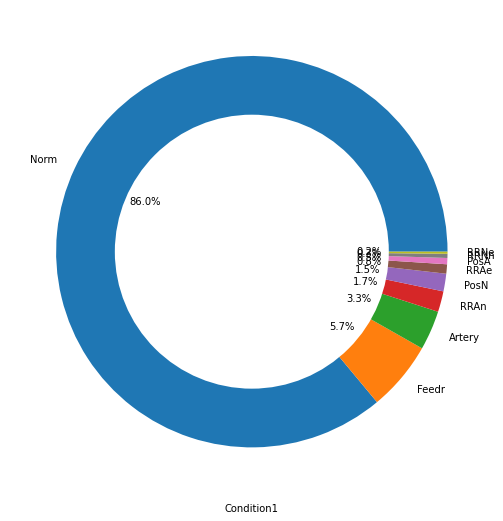

<Figure size 432x288 with 0 Axes>

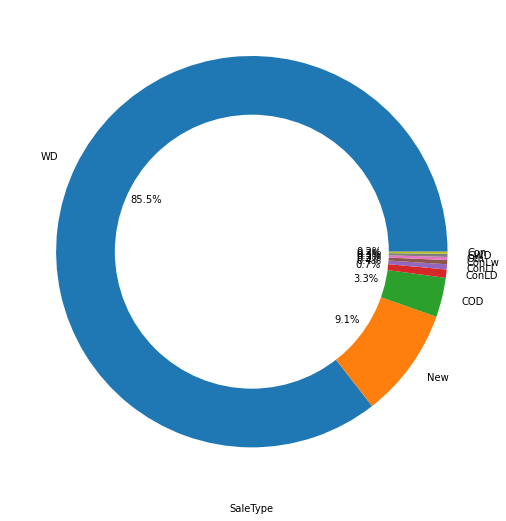

<Figure size 432x288 with 0 Axes>

In [25]:
for i in single:
    plt.figure(figsize=(9,9))
    df_train[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()


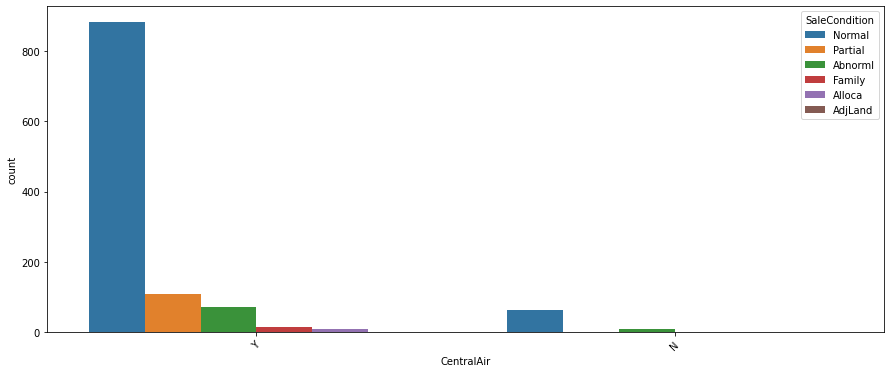

<Figure size 432x288 with 0 Axes>

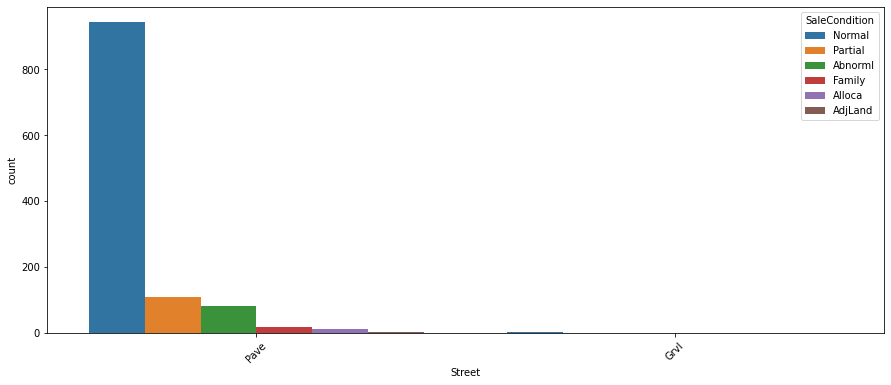

<Figure size 432x288 with 0 Axes>

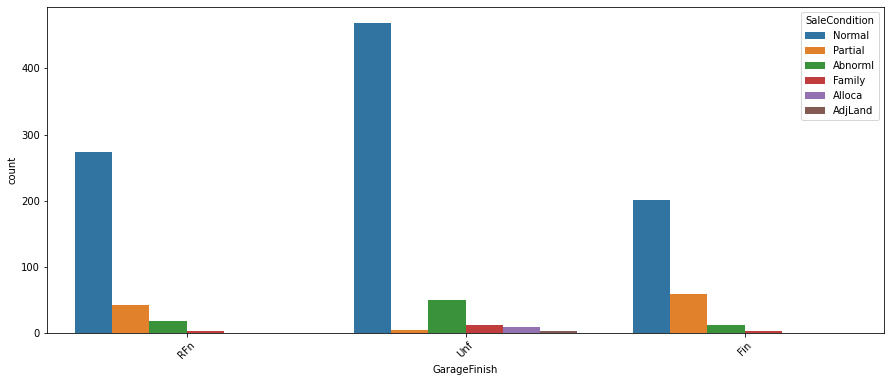

<Figure size 432x288 with 0 Axes>

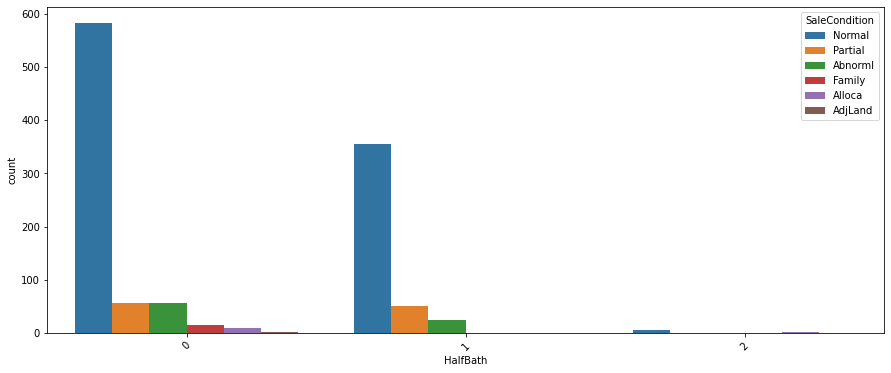

<Figure size 432x288 with 0 Axes>

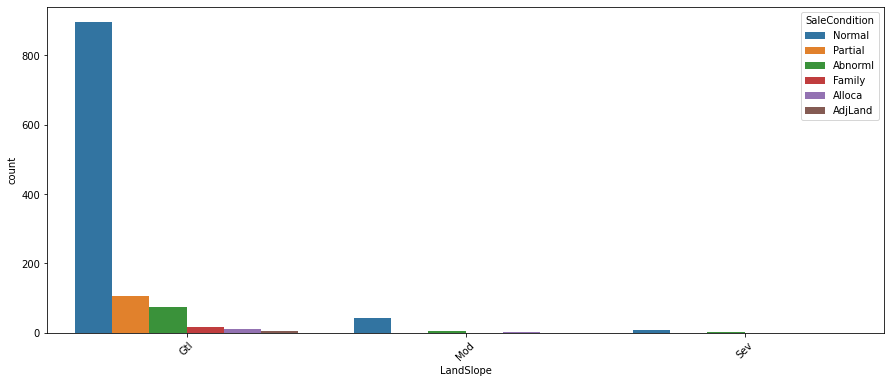

<Figure size 432x288 with 0 Axes>

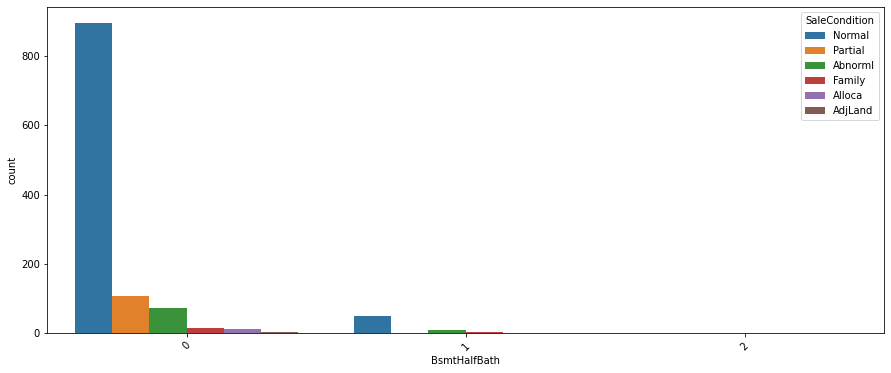

<Figure size 432x288 with 0 Axes>

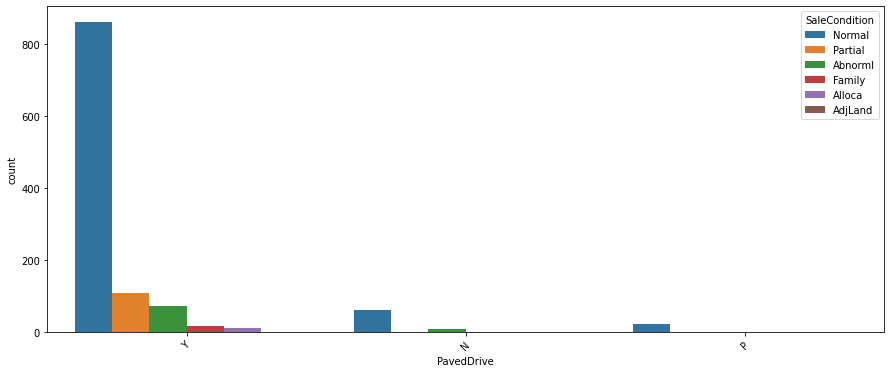

<Figure size 432x288 with 0 Axes>

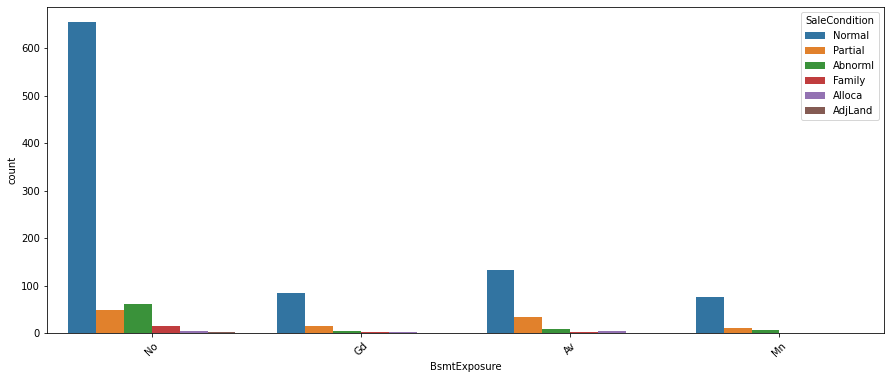

<Figure size 432x288 with 0 Axes>

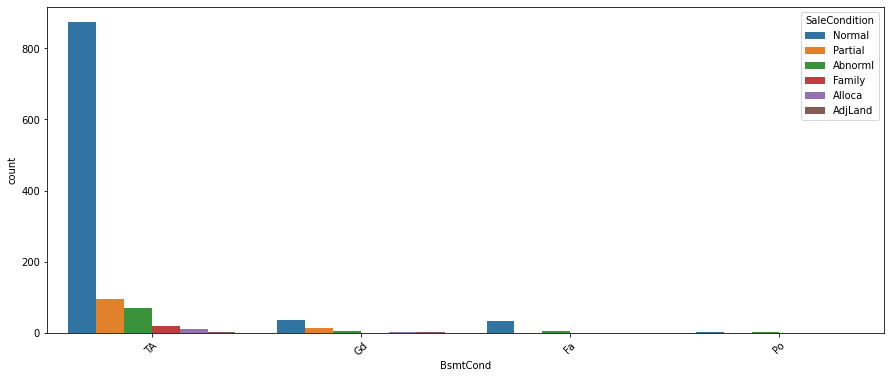

<Figure size 432x288 with 0 Axes>

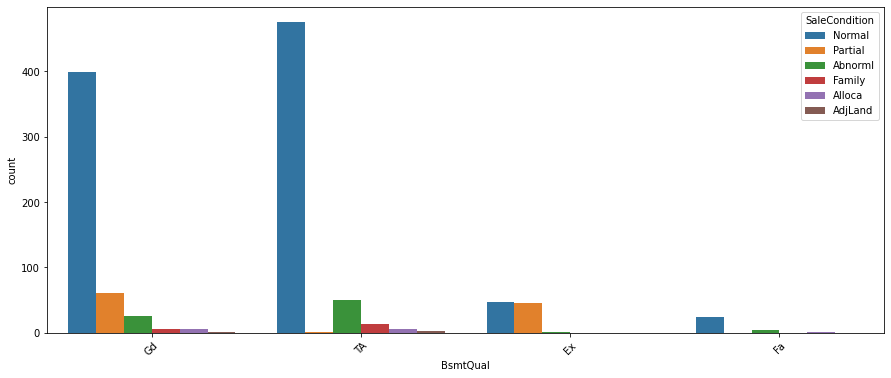

<Figure size 432x288 with 0 Axes>

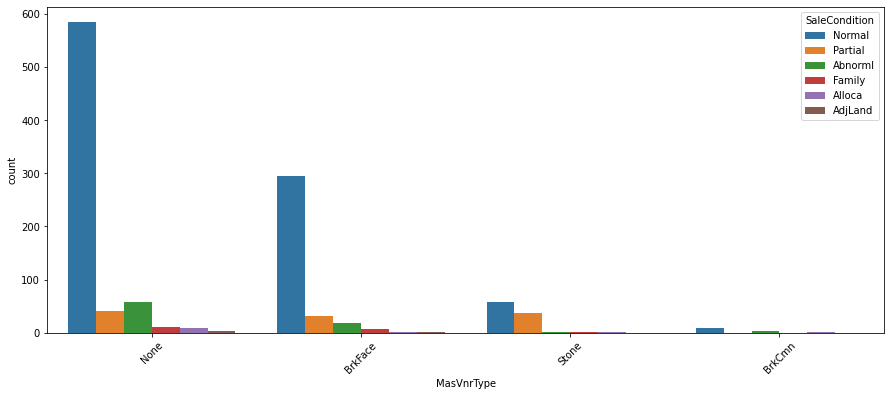

<Figure size 432x288 with 0 Axes>

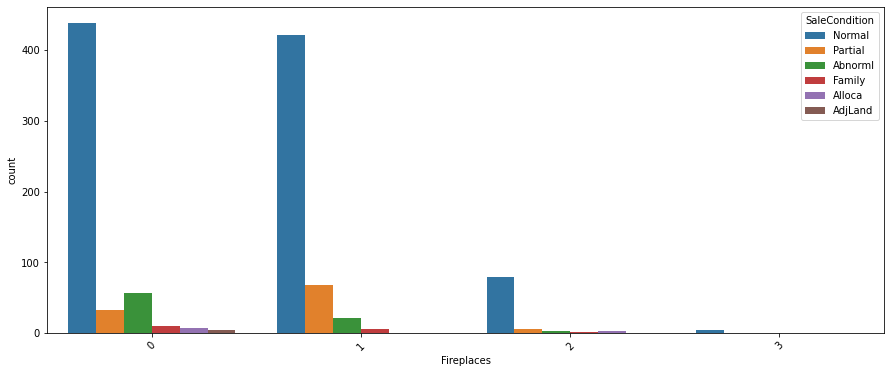

<Figure size 432x288 with 0 Axes>

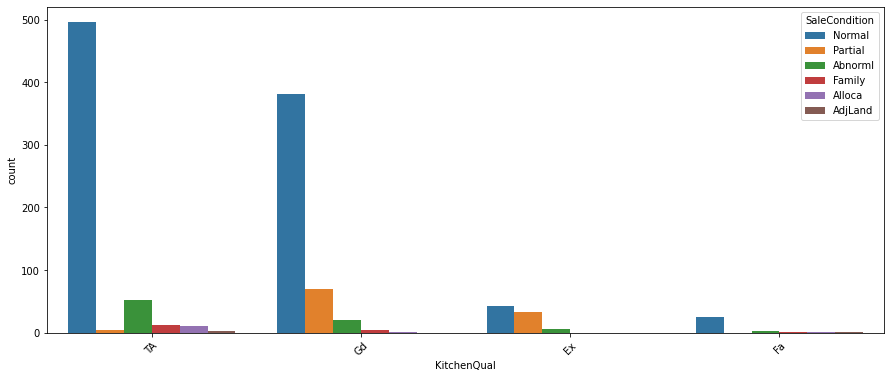

<Figure size 432x288 with 0 Axes>

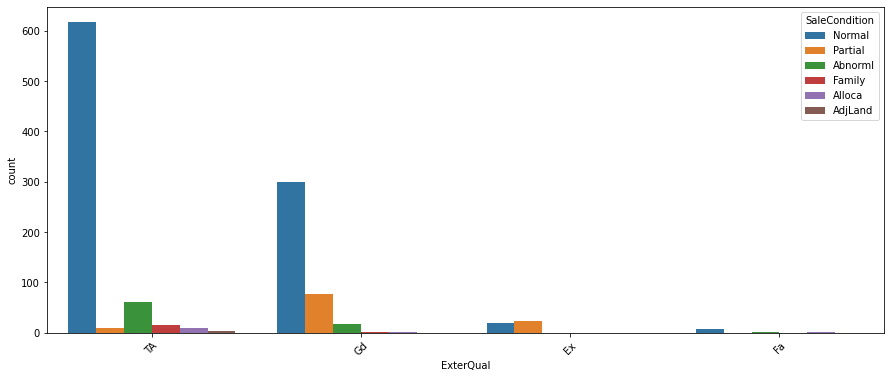

<Figure size 432x288 with 0 Axes>

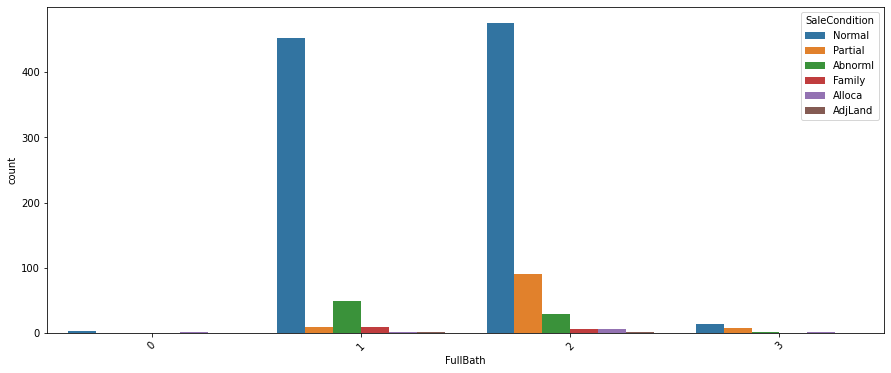

<Figure size 432x288 with 0 Axes>

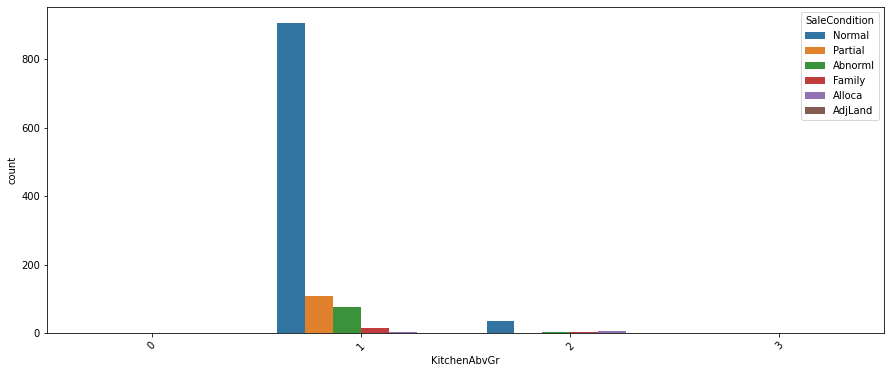

<Figure size 432x288 with 0 Axes>

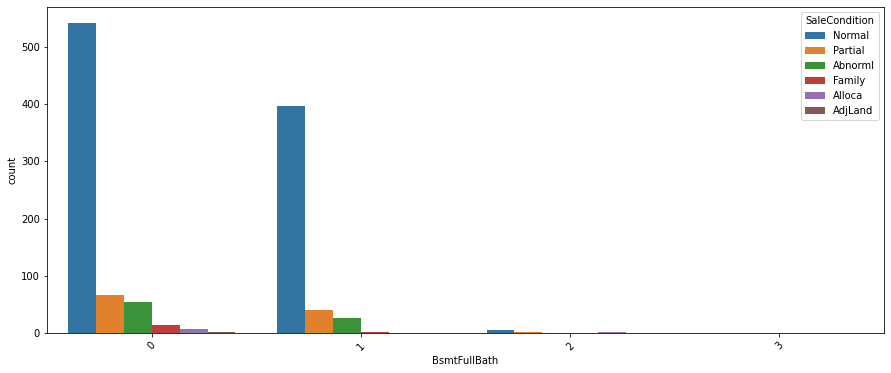

<Figure size 432x288 with 0 Axes>

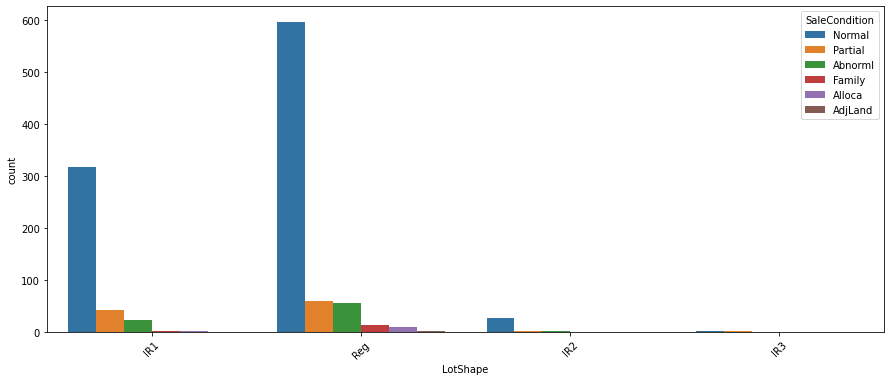

<Figure size 432x288 with 0 Axes>

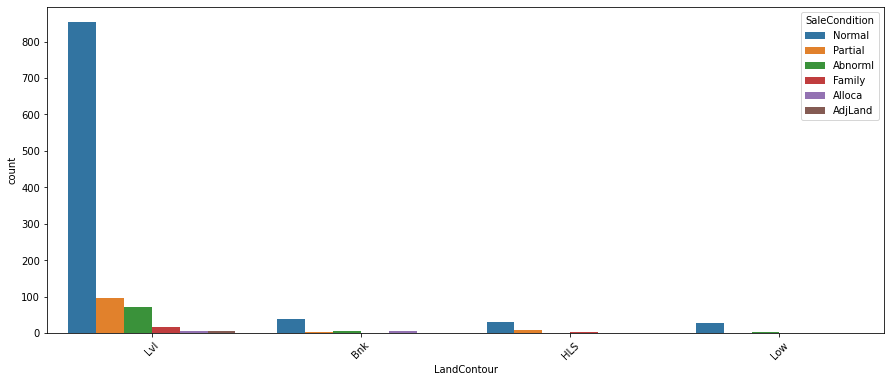

<Figure size 432x288 with 0 Axes>

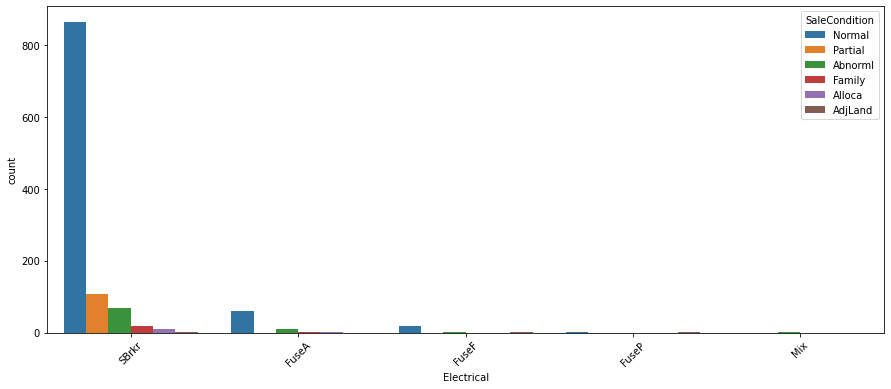

<Figure size 432x288 with 0 Axes>

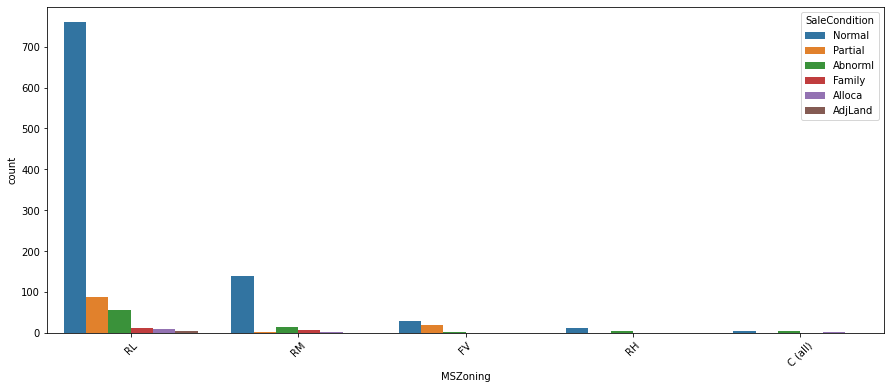

<Figure size 432x288 with 0 Axes>

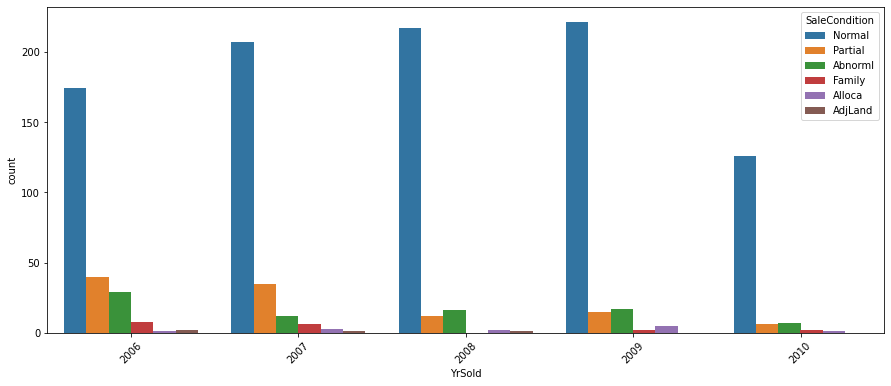

<Figure size 432x288 with 0 Axes>

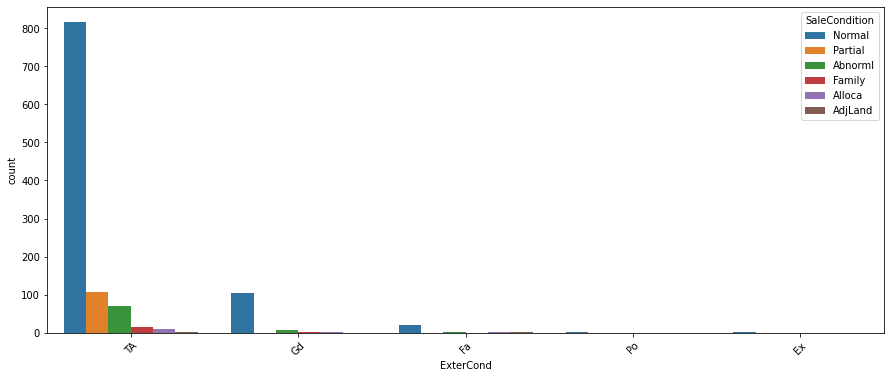

<Figure size 432x288 with 0 Axes>

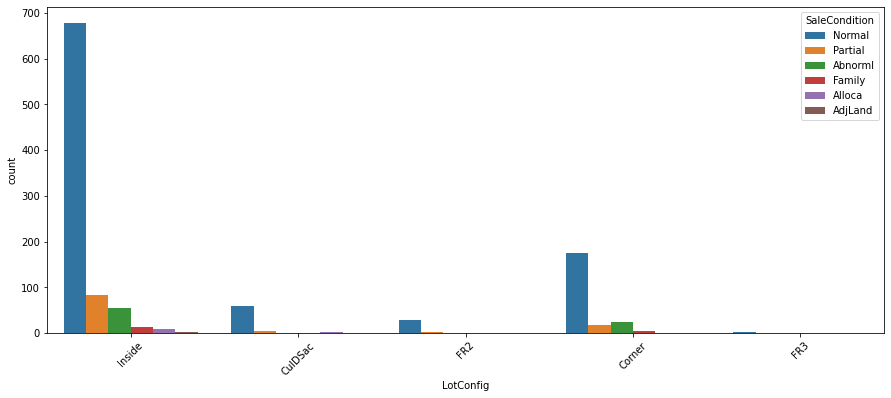

<Figure size 432x288 with 0 Axes>

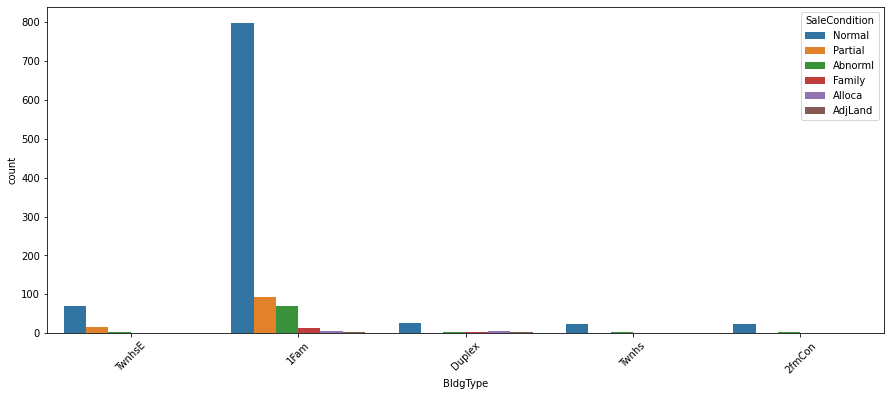

<Figure size 432x288 with 0 Axes>

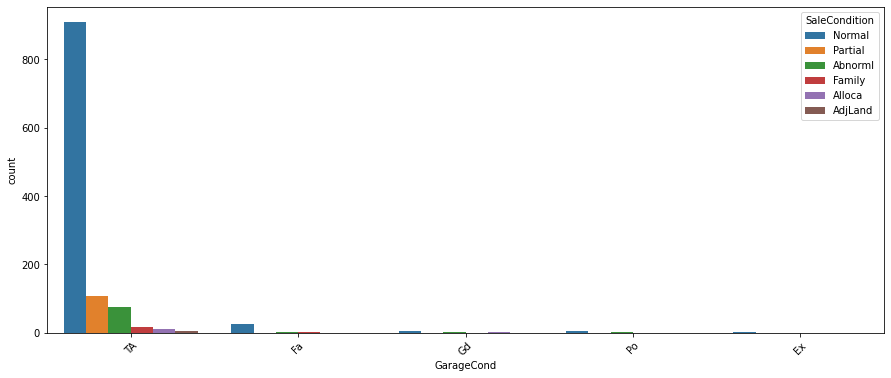

<Figure size 432x288 with 0 Axes>

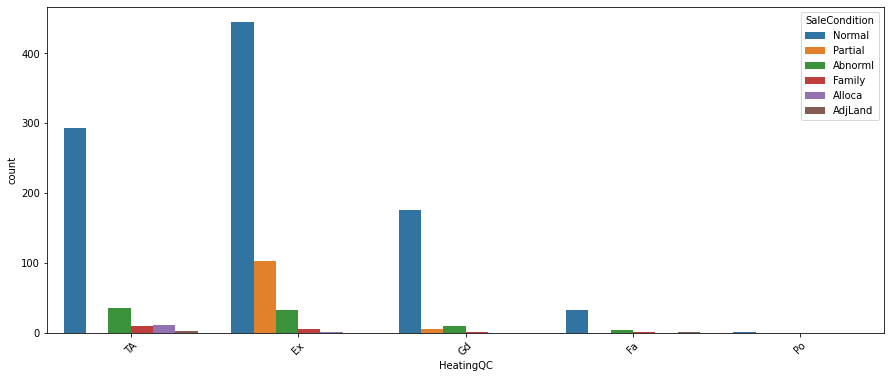

<Figure size 432x288 with 0 Axes>

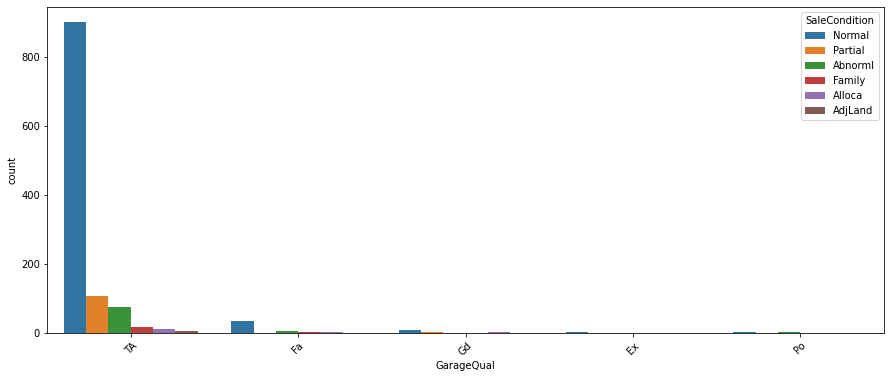

<Figure size 432x288 with 0 Axes>

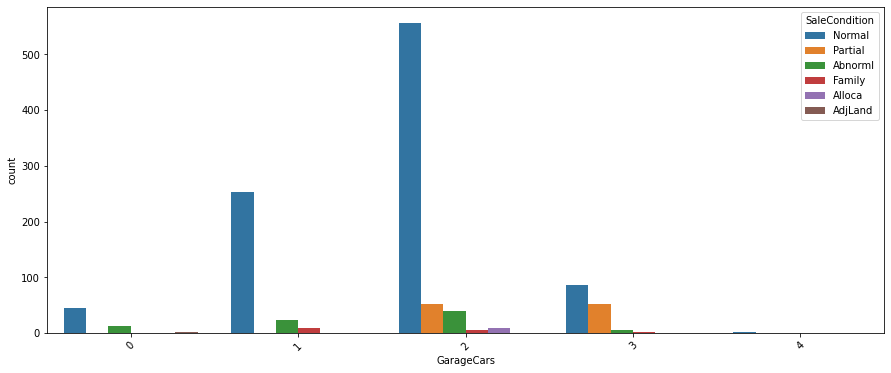

<Figure size 432x288 with 0 Axes>

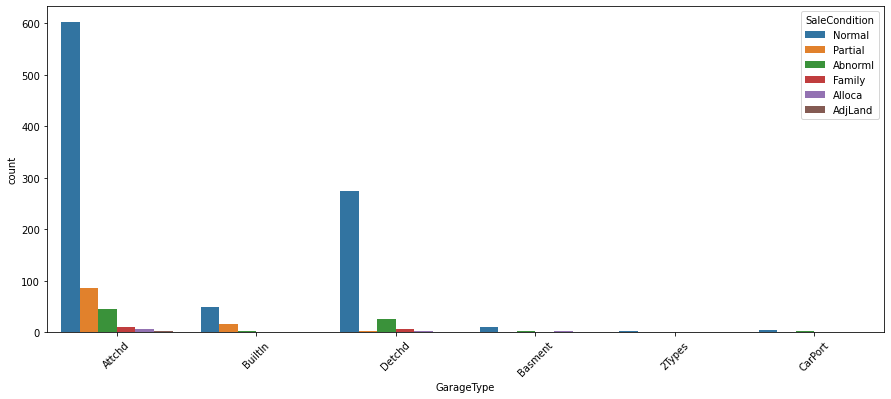

<Figure size 432x288 with 0 Axes>

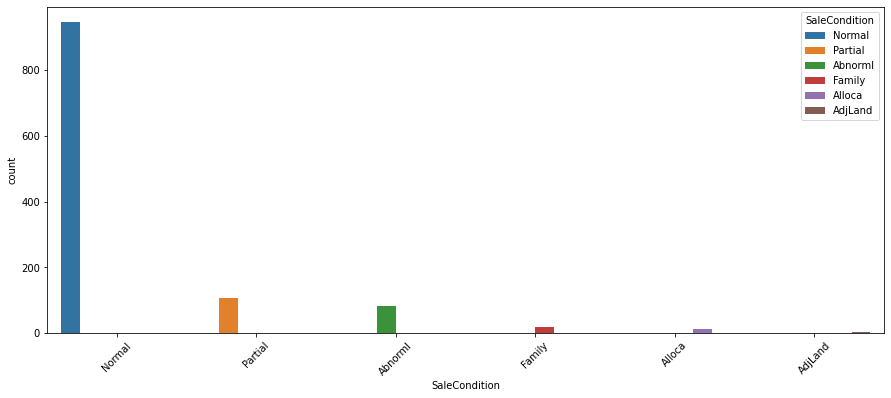

<Figure size 432x288 with 0 Axes>

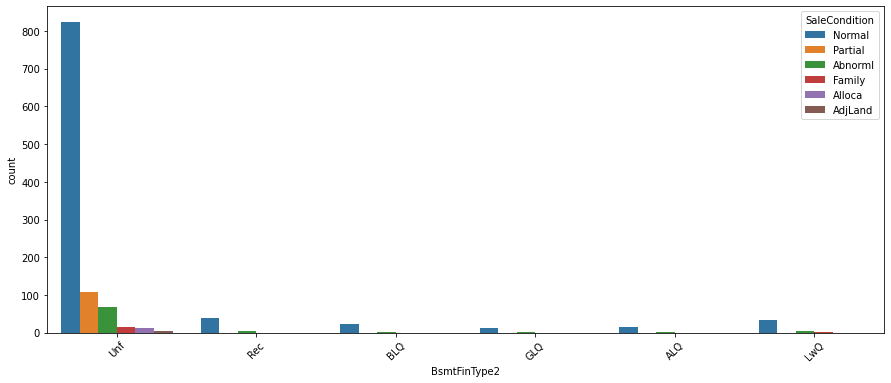

<Figure size 432x288 with 0 Axes>

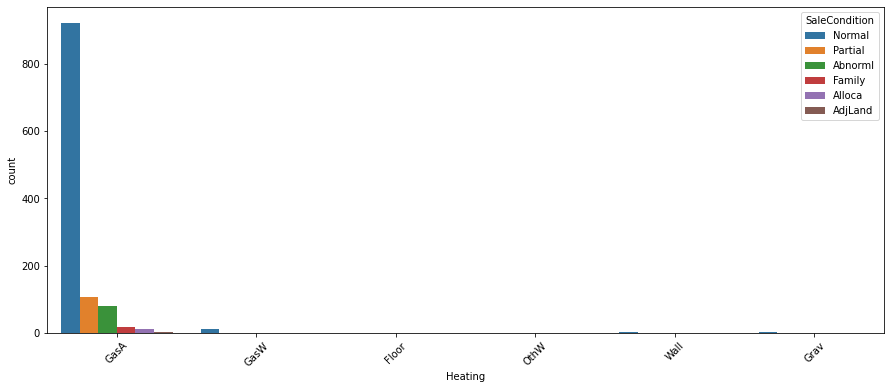

<Figure size 432x288 with 0 Axes>

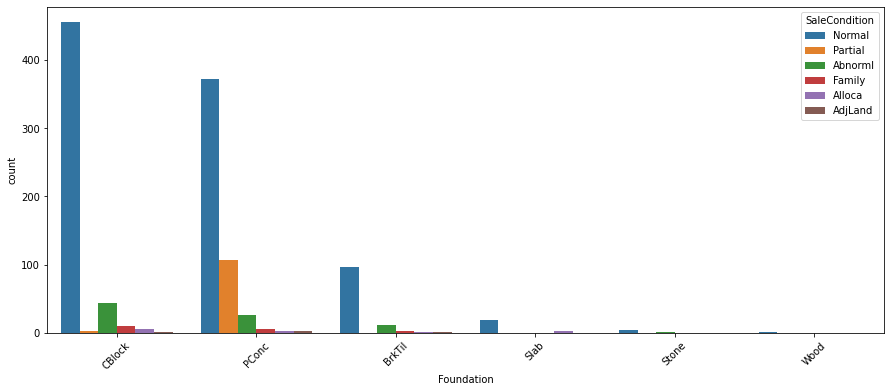

<Figure size 432x288 with 0 Axes>

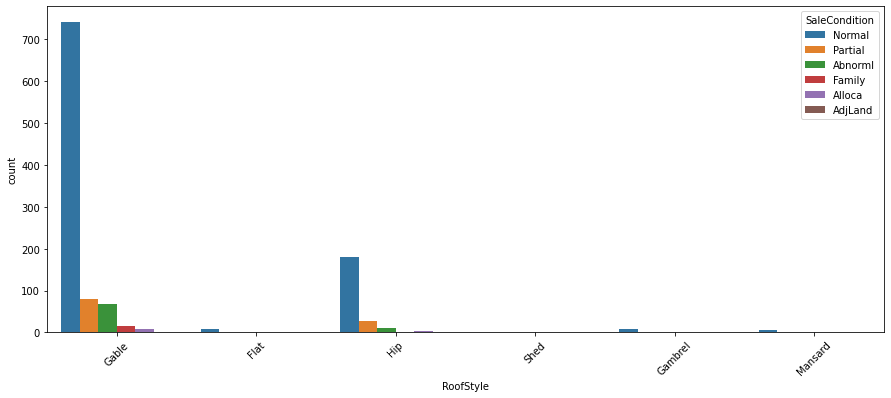

<Figure size 432x288 with 0 Axes>

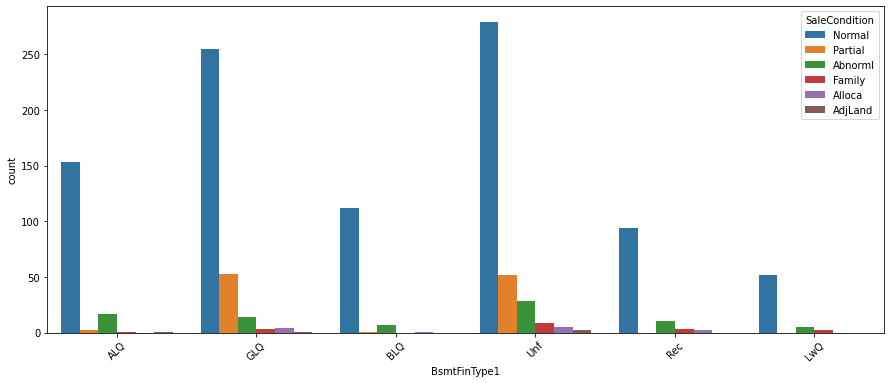

<Figure size 432x288 with 0 Axes>

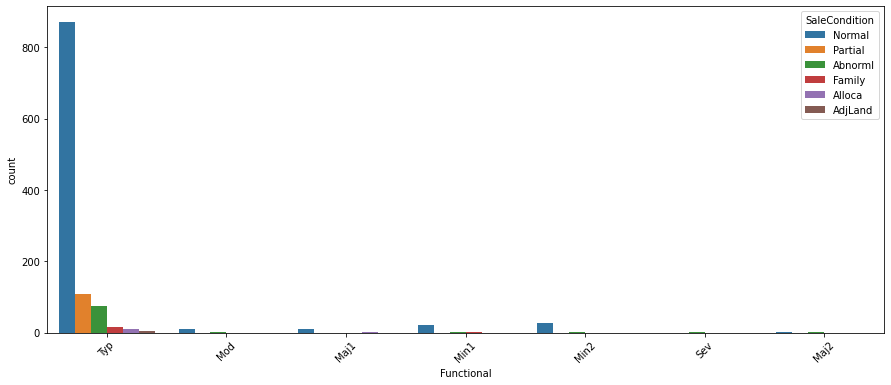

<Figure size 432x288 with 0 Axes>

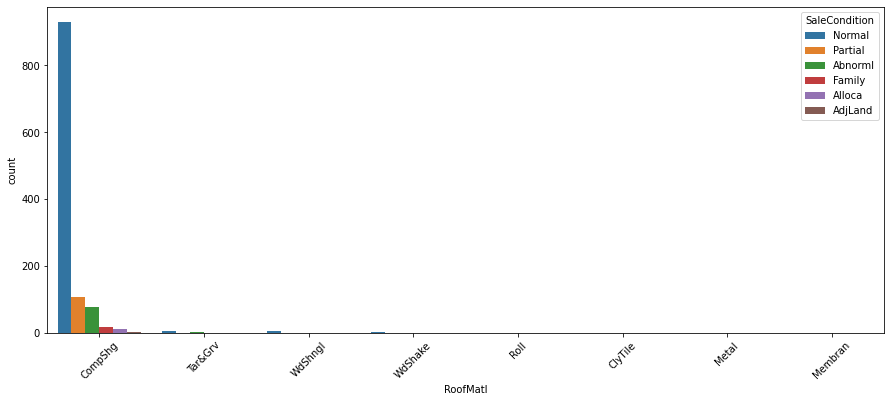

<Figure size 432x288 with 0 Axes>

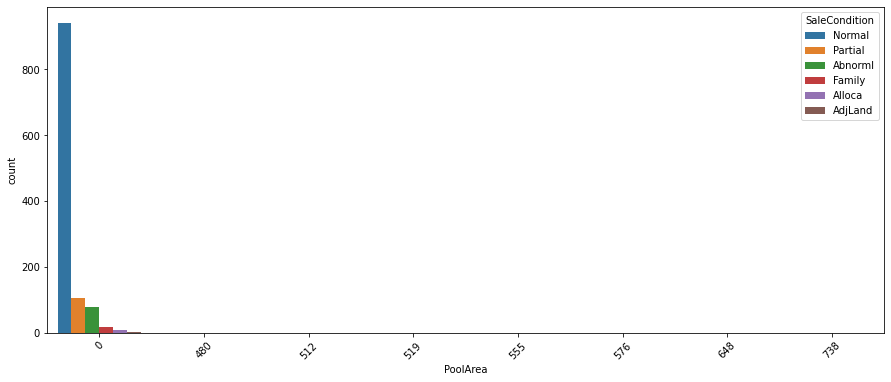

<Figure size 432x288 with 0 Axes>

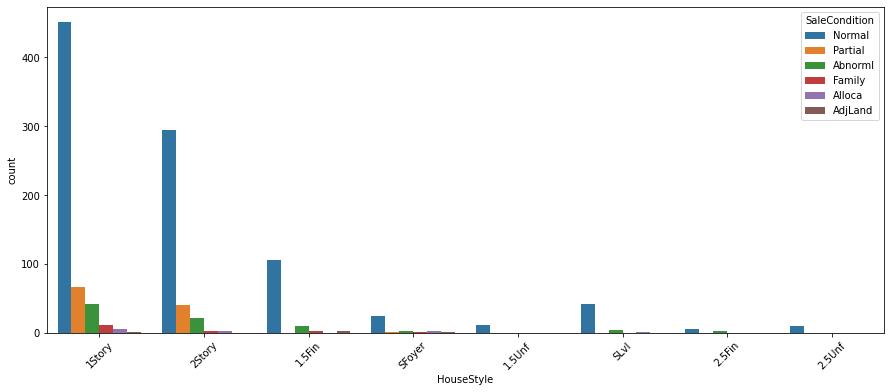

<Figure size 432x288 with 0 Axes>

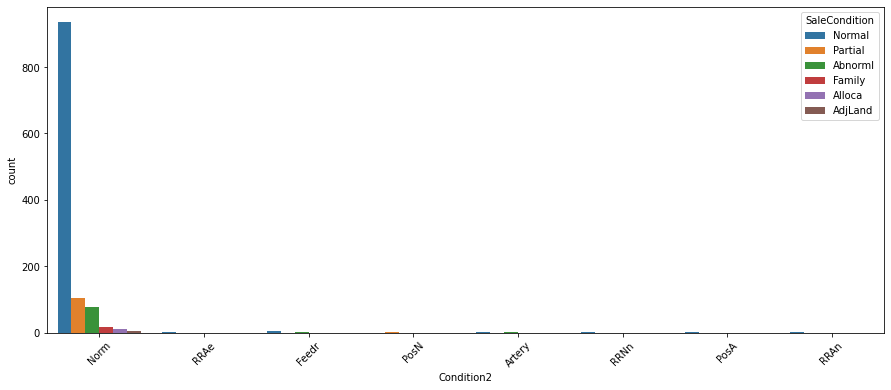

<Figure size 432x288 with 0 Axes>

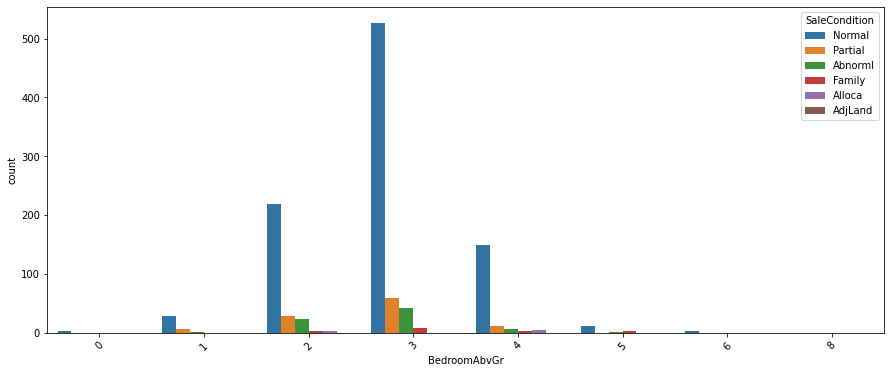

<Figure size 432x288 with 0 Axes>

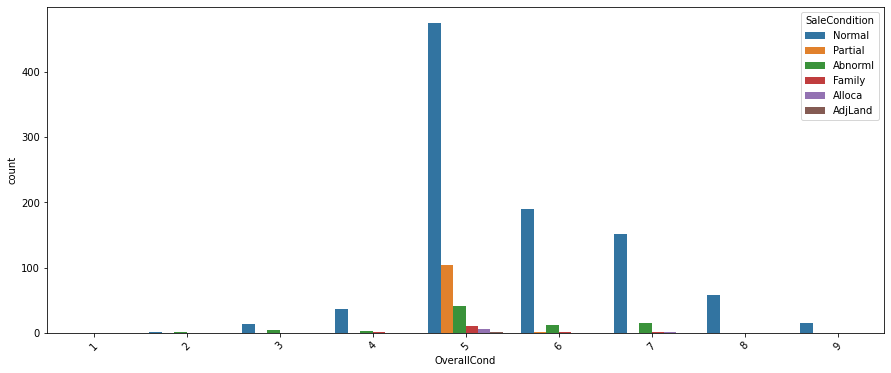

<Figure size 432x288 with 0 Axes>

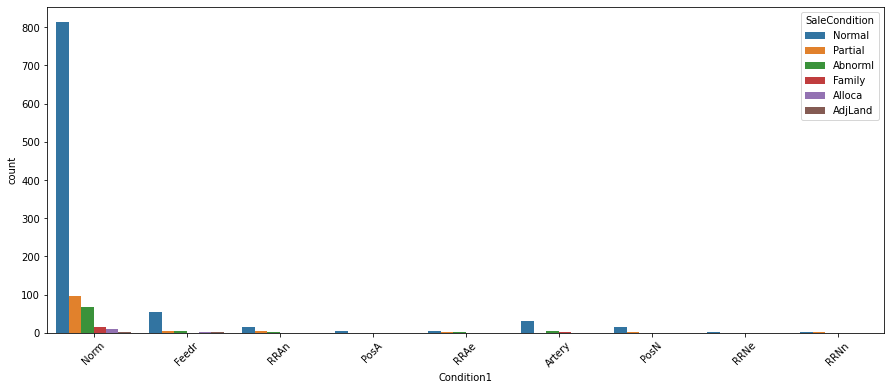

<Figure size 432x288 with 0 Axes>

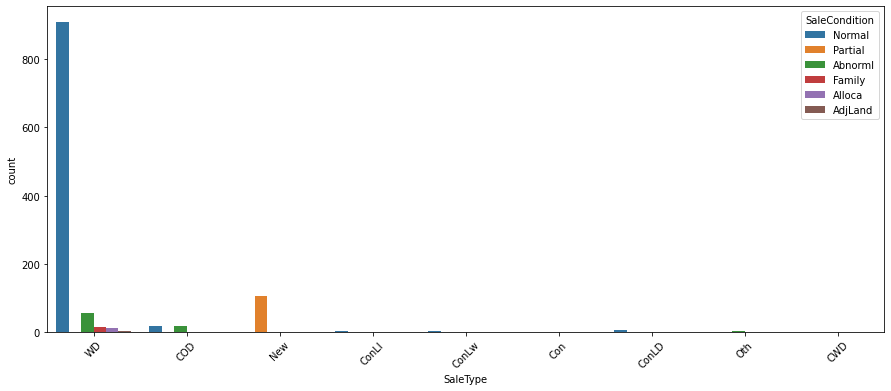

<Figure size 432x288 with 0 Axes>

In [26]:
for i in single:
    plt.figure(figsize=(15,6))
    sns.countplot(x=df_train[i],hue=df_train['SaleCondition'])
    plt.xticks(rotation=45)
    plt.figure()

Observations:

• For most of the Features Data is not distributed normally, either right or Left skewed

LotFrontage: • Data ranges from 21 to 313 with mean value 70.99 

YearBuilt: • Data ranges from 1875 to 2010 with mean value 1971

YearRemodAdd:  • Data ranges from 1950 to 2010 with mean value 1985
 
MassVnrArea:  Data ranges from 0 to 1600 with mean value 102.31 

BsmtFinSF1: • Data ranges from 0 to 5644 with mean value 444.73. 
 
BsmtFinSF2: Data ranges from 0 to 1474 with mean value 46.65 • 
 
BsmtUnfSF: Data ranges from 0 to 2336 with mean value 569.72 . 
 
TotalBsmtSF:  Data ranges from 0 to 6110 with mean value 1061.1

1stFlrSF: • Data ranges from 334 to 4692 with mean value 1169.86 
 
2ndFlrSF:  • Data ranges from 0 to 2065 with mean value 348.83 
 
LowQualFinSF: • Data ranges from 0 to 572 with mean value 6.38 

GrLivArea: • Data ranges from 334 to 5642 with mean value 1525.07  
  
BsmtFullBath: • Data ranges from 0 to 3 with mean value 0.43 

BsmtHalfBath: • Data ranges from 0 to 2 with mean value 0.06 
 
FullBath:  • Data ranges from 0 to 3 with mean value 1.56 
 
HalfBath:  • Data ranges from 0 to 2 with mean value 0.39 
 
BedroomAbvGr:  • Data ranges from 0 to 8 with mean value 2.88

KitchenAbvGr: • Data ranges from 0 to 3 with mean value 1.05 

TotRmsAbvGrd: • Data ranges from 2 to 14 with mean value 6.54 

Fireplaces:  • Data ranges from 0 to 3 with mean value 0.62 for 

GarageYrBlt:  • Data ranges from 1900 to 2010 with mean value 1978 

GarageCars:  • Data ranges from 0 to 4 with mean value 1.78 for 

GarageArea:  • Data ranges from 0 to 1418 with mean value 776.86 for 

feature WoodDeckSF:  • Data ranges from 0 to 857 with mean value 96.21 

OpenPorchSF:  • Data ranges from 0 to 547 with mean value 46.56 

EnclosedPorch:  • Data ranges from 0 to 552 with mean value 23.02 

3SsnPorch:• Data ranges from 0 to 508 with mean value 3.64 

ScreenPorch: • Data ranges from 0 to 480 with mean value 15.05 

PoolArea: • Data ranges from 0 to 738 with mean value 345 

MiscVal:  • Data ranges from 0 to 15500 with mean value 47.32 

MoSold:  • Data ranges from 1 to 12 with mean value 6.34

YrSold:• Data ranges from 2006 to 2010 with mean value 2007 

SalePrice:  • Data ranges from 34900 to 755000 with mean value 181477.01

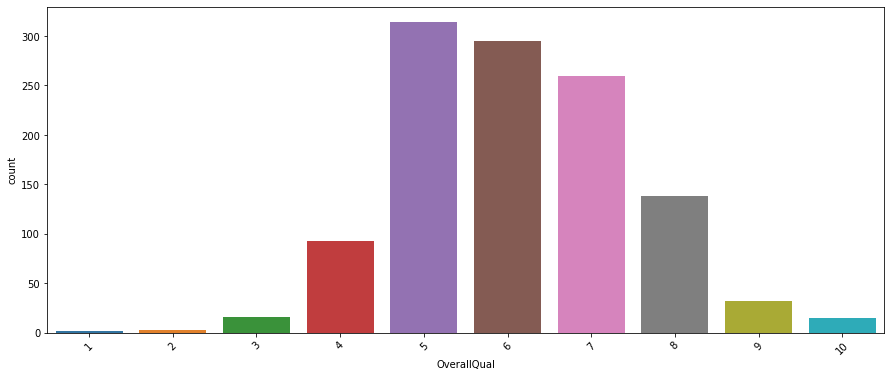

<Figure size 432x288 with 0 Axes>

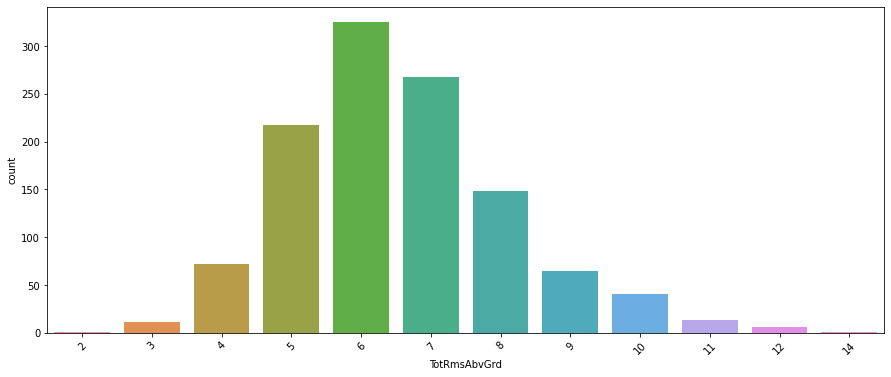

<Figure size 432x288 with 0 Axes>

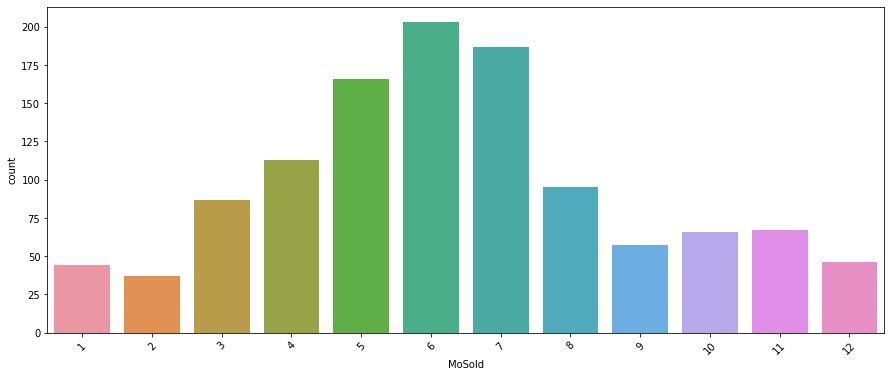

<Figure size 432x288 with 0 Axes>

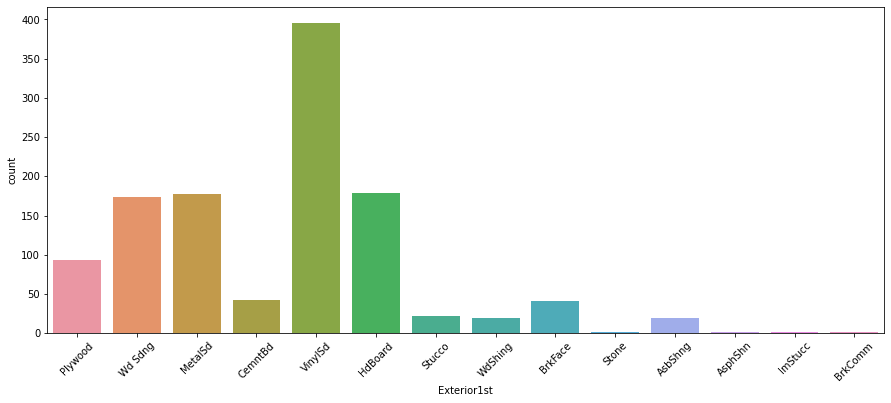

<Figure size 432x288 with 0 Axes>

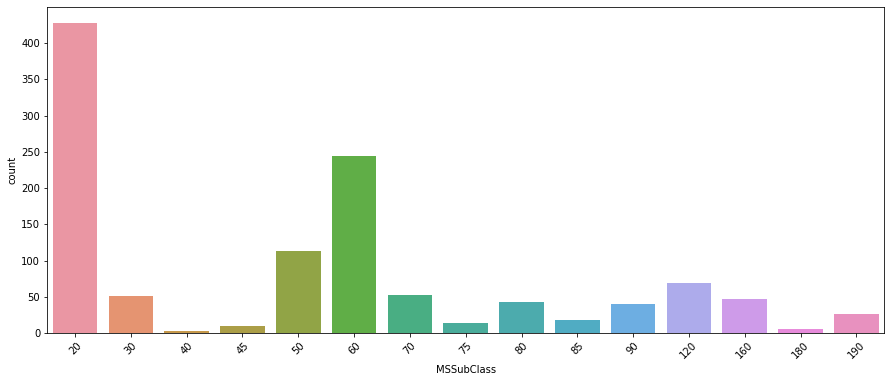

<Figure size 432x288 with 0 Axes>

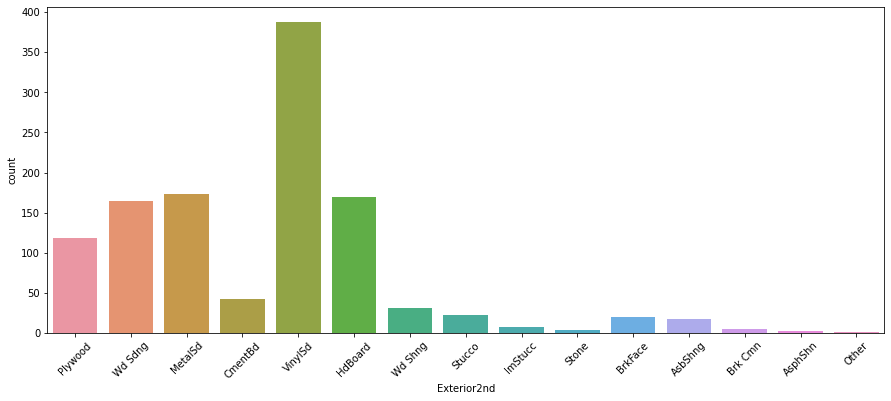

<Figure size 432x288 with 0 Axes>

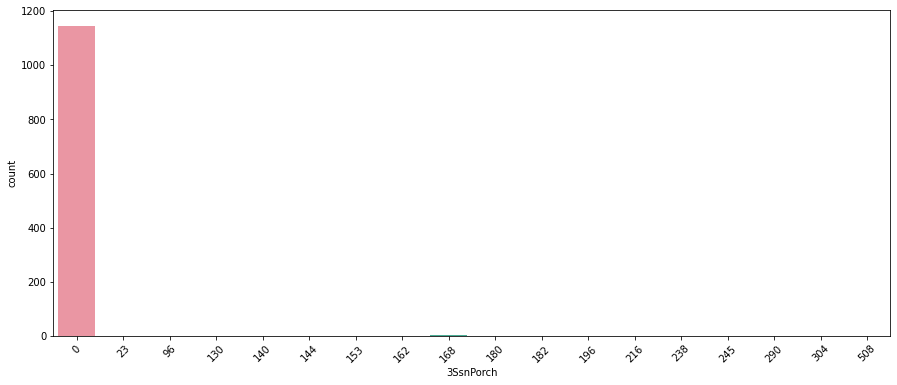

<Figure size 432x288 with 0 Axes>

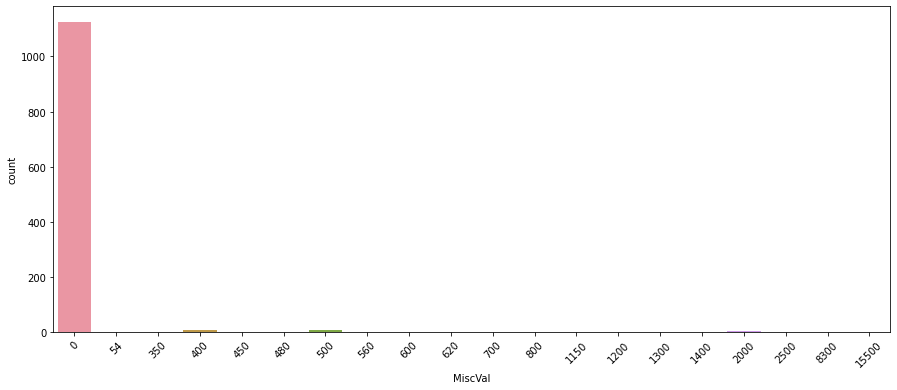

<Figure size 432x288 with 0 Axes>

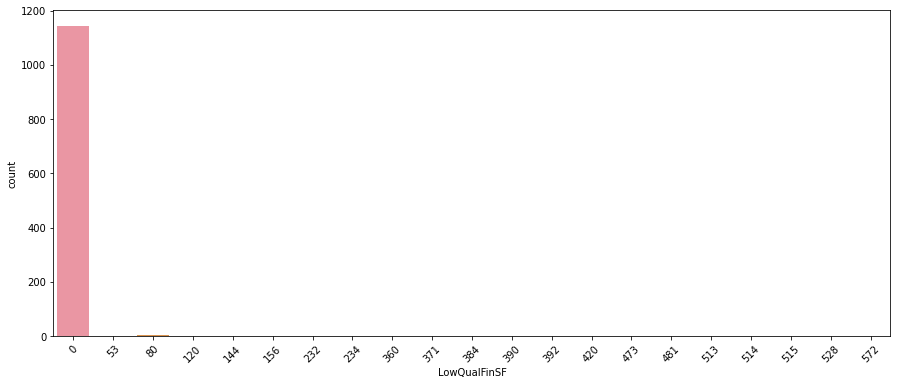

<Figure size 432x288 with 0 Axes>

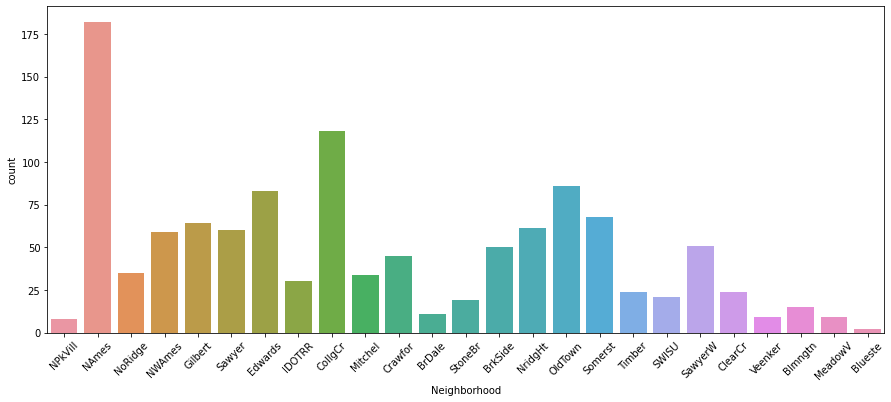

<Figure size 432x288 with 0 Axes>

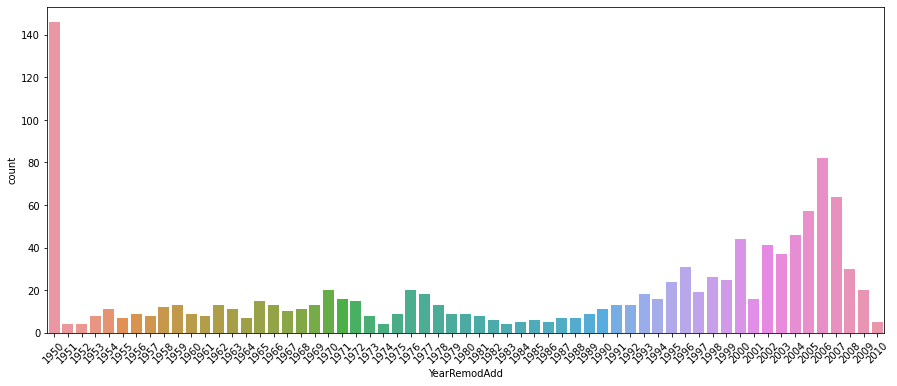

<Figure size 432x288 with 0 Axes>

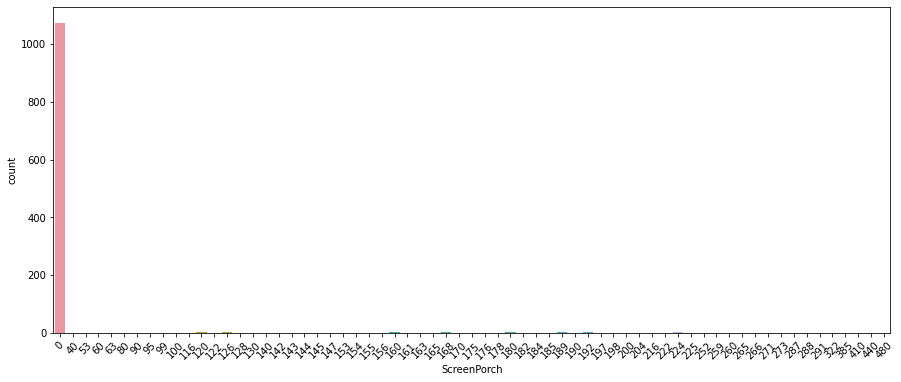

<Figure size 432x288 with 0 Axes>

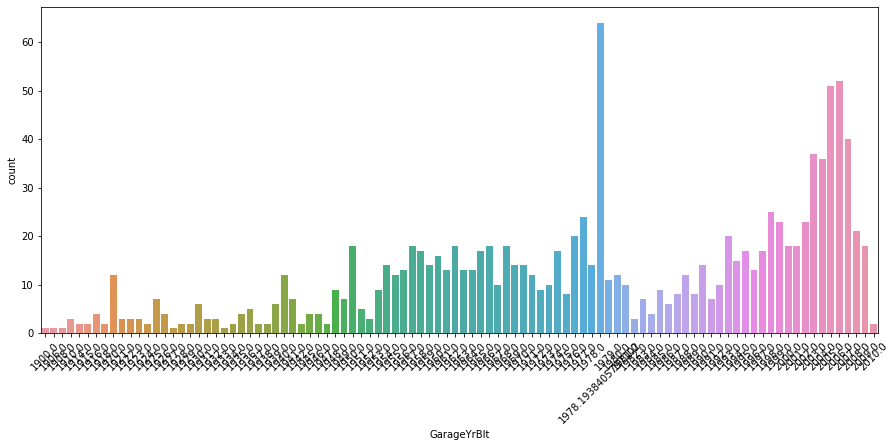

<Figure size 432x288 with 0 Axes>

In [27]:
for i in double:
    plt.figure(figsize=(15,6))
    sns.countplot(x=df_train[i])
    plt.xticks(rotation=45)
    plt.figure()

Observations:

Most of the records are for Normally Distributed.

 MSSubClass: • Maximum number of records are available for 20. • Minimum number of records are available for 40. • Majority of records are for 20, 60, 50 & 120. 

 MSZoning: • Maximum number of records are available for RL. • Minimum number of records are available for C(all).  
 
 Street: • Maximum number of records are available for Pave. • Minimum number of records are available for Grvl.  
 
 LotShape: • Maximum number of records are available for Reg. • Minimum number of records are available for IR3. • Majority of records are for Reg & IR1.  
 
 LandContour: • Maximum number of records are available for Lvl. • Minimum number of records are available for Low.  
 
 Utilities: • All of the records are for AllPub and hence, this feature can be dropped from the dataset as it is of no use.  
 
 LotConfig: • Maximum number of records are available for Inside. • Minimum number of records are available for FR3. 

 LandSlope: • Maximum number of records are available for Gtl. • Minimum number of records are available for Sev.  
 
 Neighborhood: • Maximum number of records are available for NAmes. • Minimum number of records are available for Blueste. • Majority of records are for NAmes, CollgCr, OldTown, Edwards, Somerst, Gilbert, Sawyer, NWAmes and NridgHt. 
 
 BldgType: • Most of the records are for 1Fam.  
 
 HouseStyle: • Most of the records are for 1Story and 2Story.  
 
 OverallQual: • Most of the records are for 5, 6, 7, 8, & 4. 
 
 BsmtQual: • Most of the records are for TA & Gd. 
 
  GarageQual: • Most of the records are for TA.    
 
 SaleType: • Most of the records are for WD.  
 
 SaleCondition: • Most of the records are for Normal.

Scatter plot for EnclosedPorch column with respect to the rows covered ->


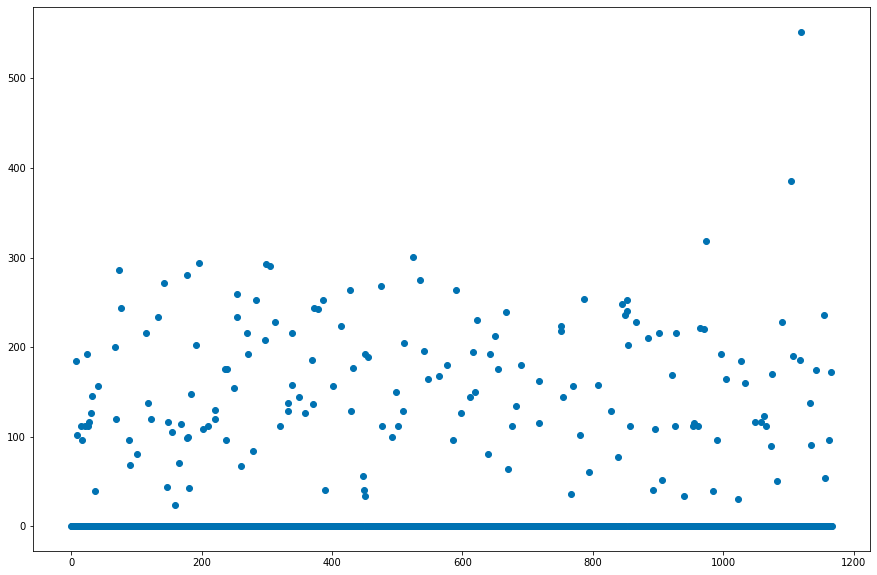

Scatter plot for LotFrontage column with respect to the rows covered ->


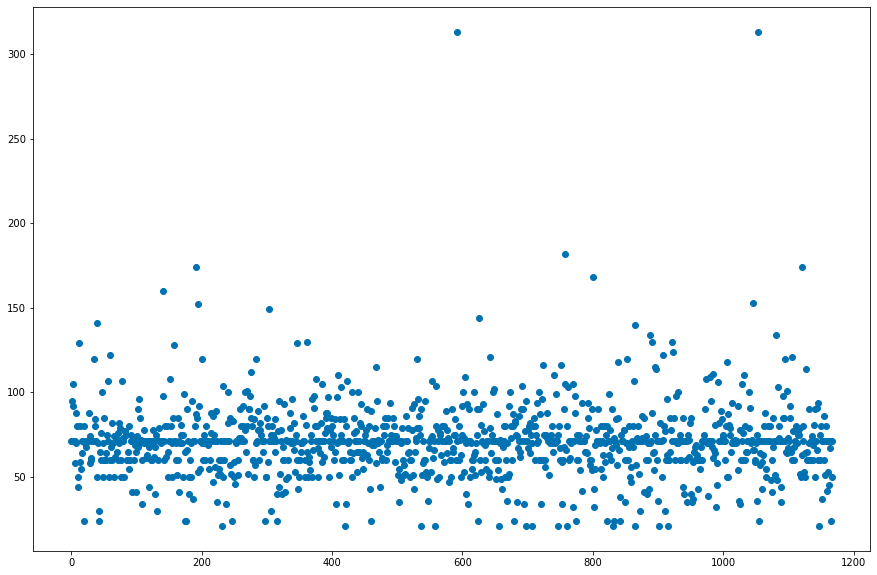

Scatter plot for YearBuilt column with respect to the rows covered ->


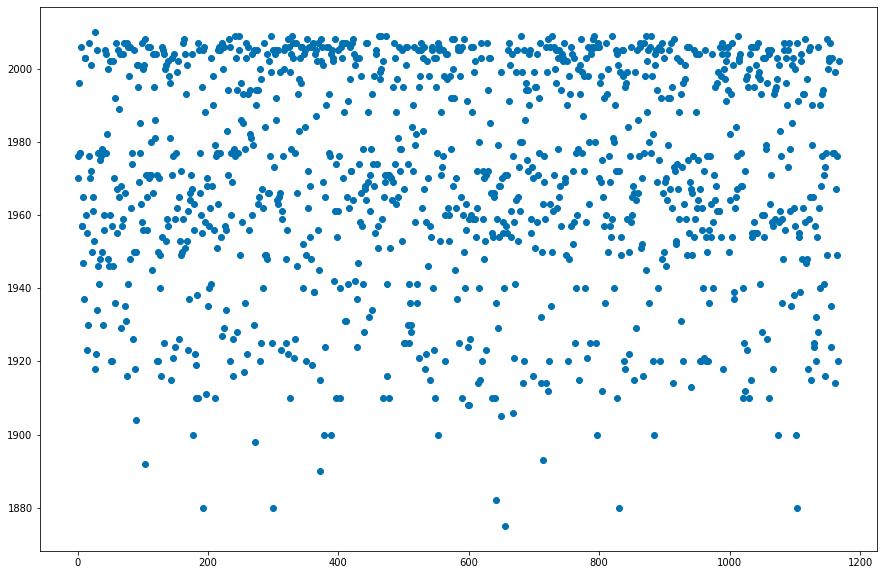

Scatter plot for BsmtFinSF2 column with respect to the rows covered ->


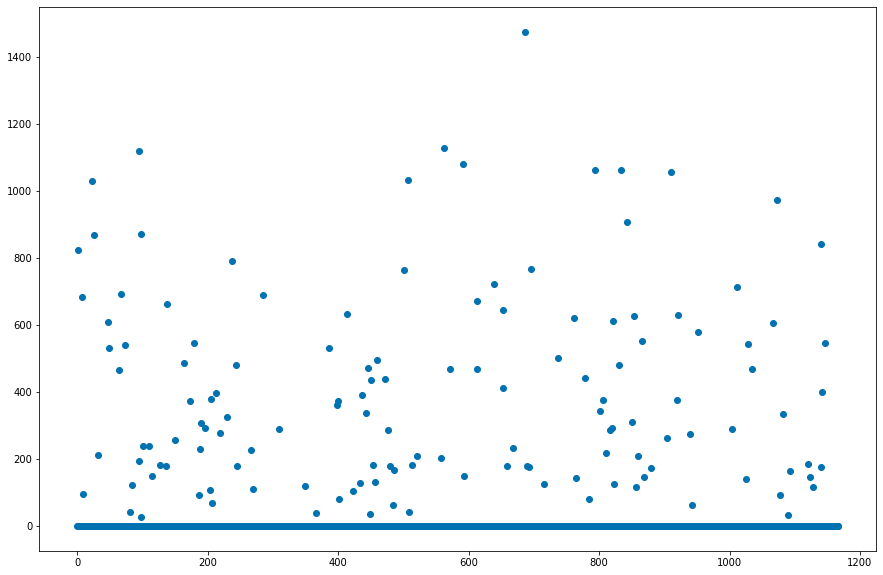

Scatter plot for OpenPorchSF column with respect to the rows covered ->


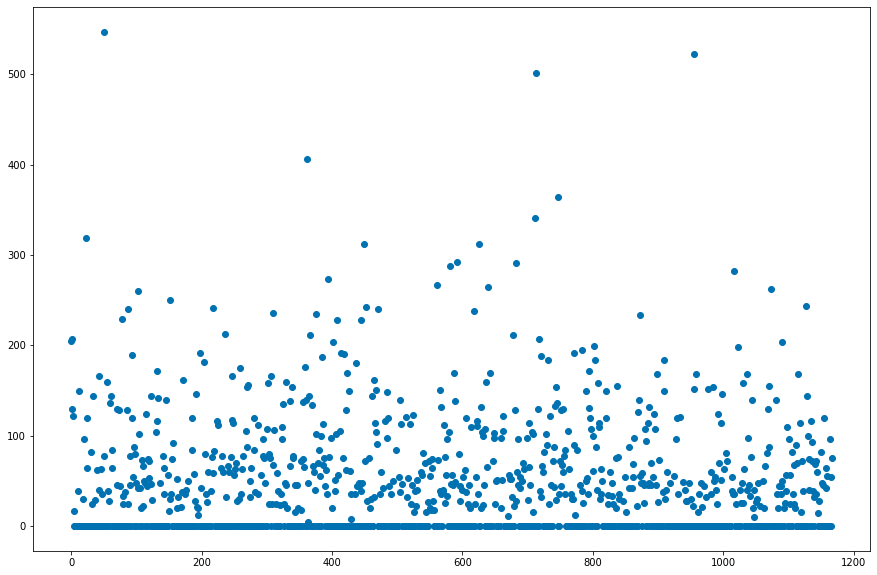

Scatter plot for WoodDeckSF column with respect to the rows covered ->


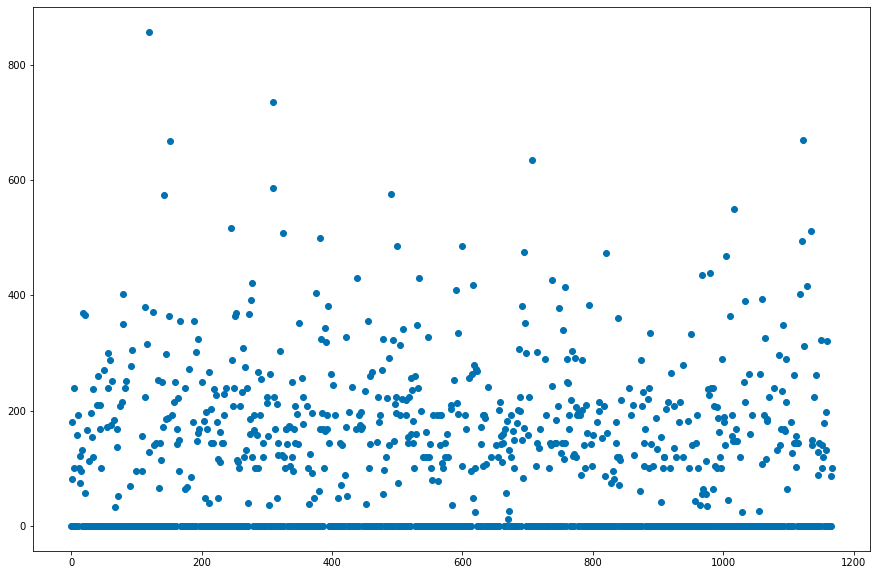

Scatter plot for MasVnrArea column with respect to the rows covered ->


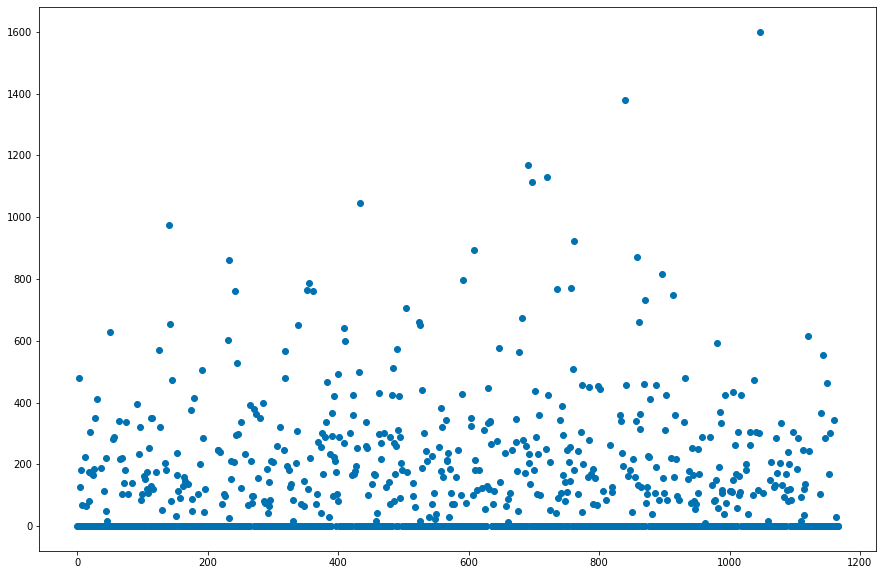

Scatter plot for 2ndFlrSF column with respect to the rows covered ->


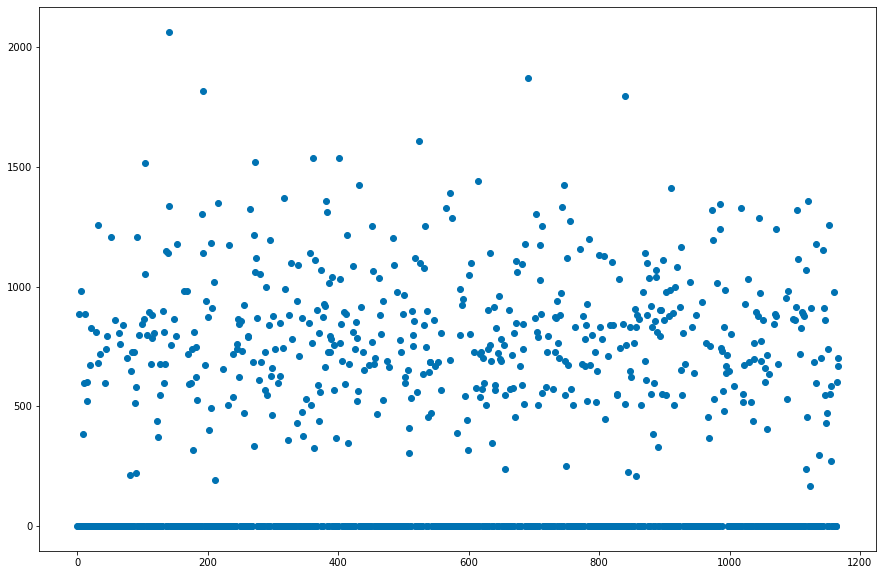

Scatter plot for GarageArea column with respect to the rows covered ->


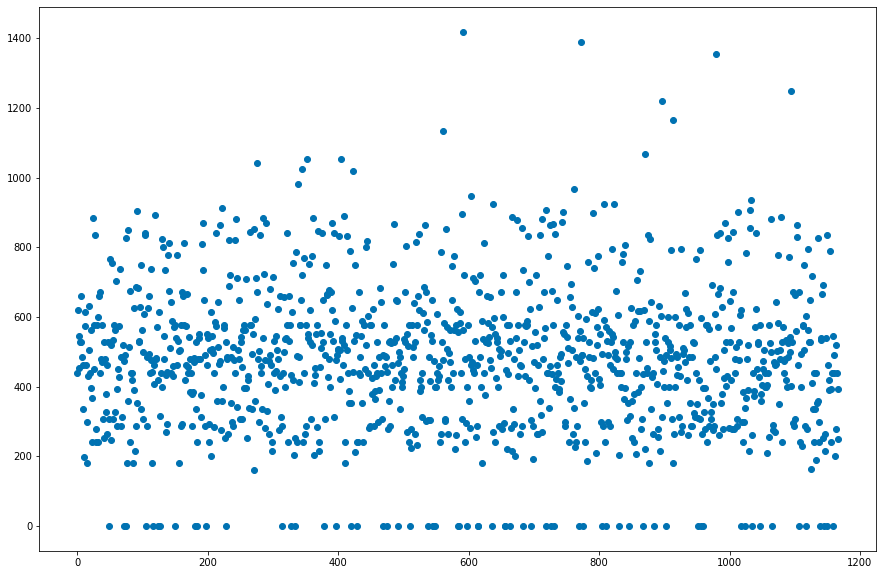

Scatter plot for BsmtFinSF1 column with respect to the rows covered ->


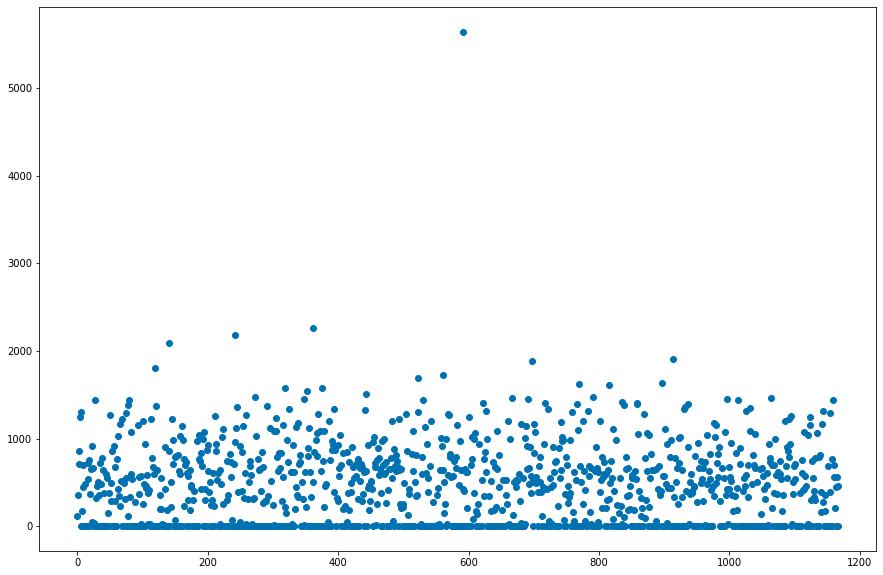

Scatter plot for SalePrice column with respect to the rows covered ->


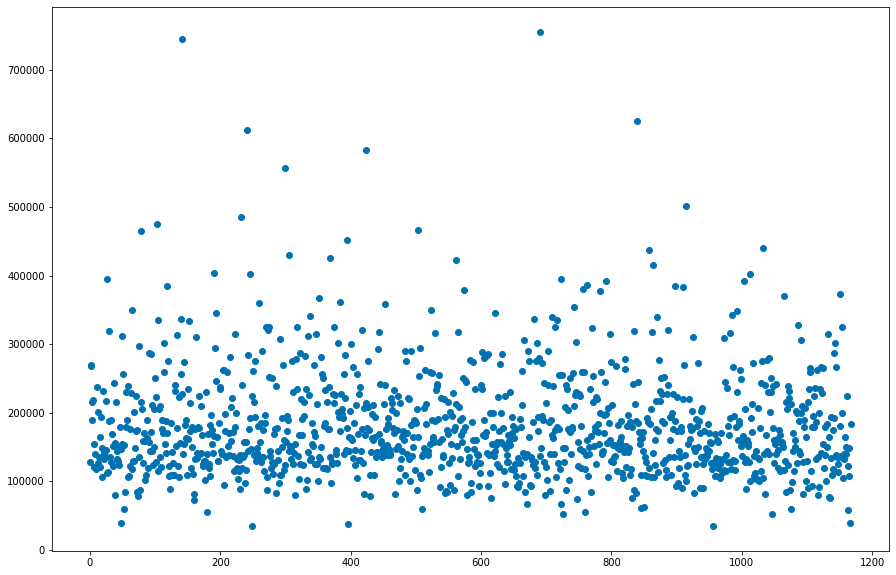

Scatter plot for TotalBsmtSF column with respect to the rows covered ->


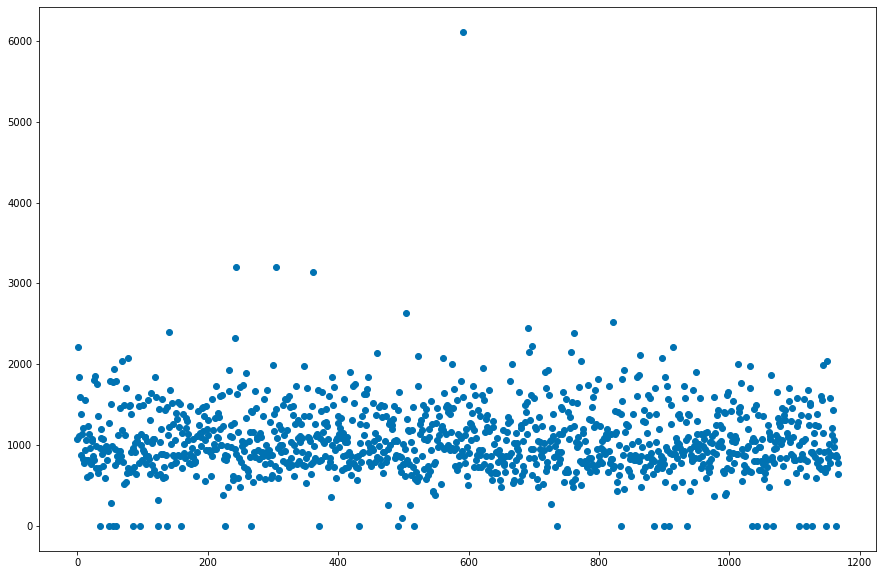

Scatter plot for 1stFlrSF column with respect to the rows covered ->


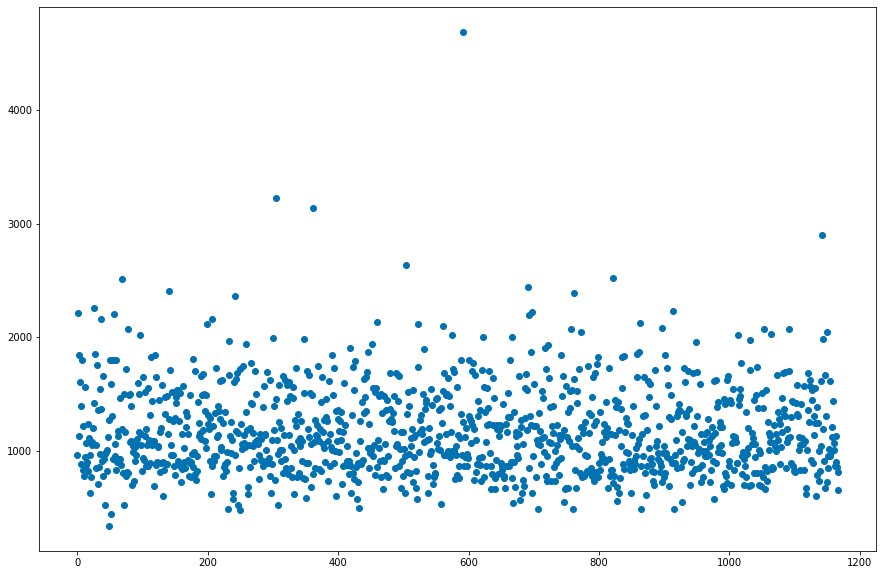

Scatter plot for BsmtUnfSF column with respect to the rows covered ->


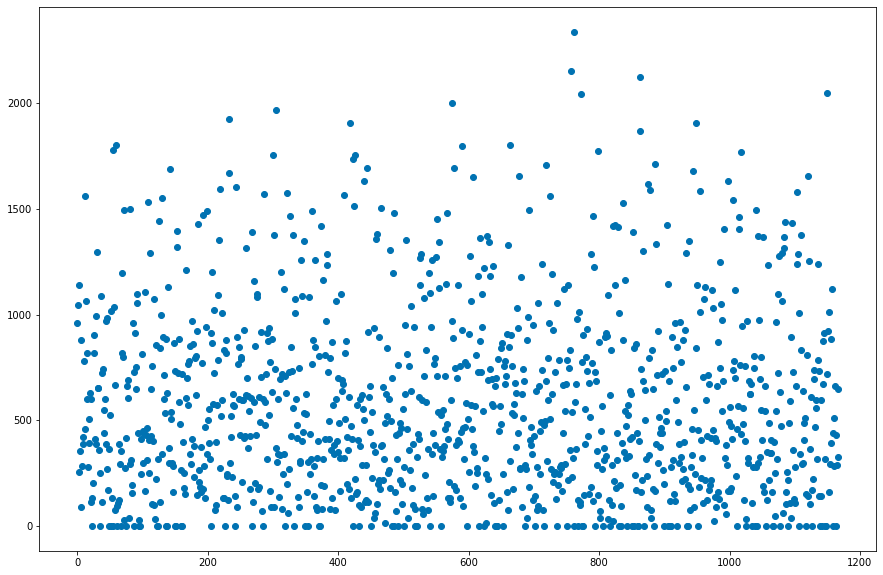

Scatter plot for GrLivArea column with respect to the rows covered ->


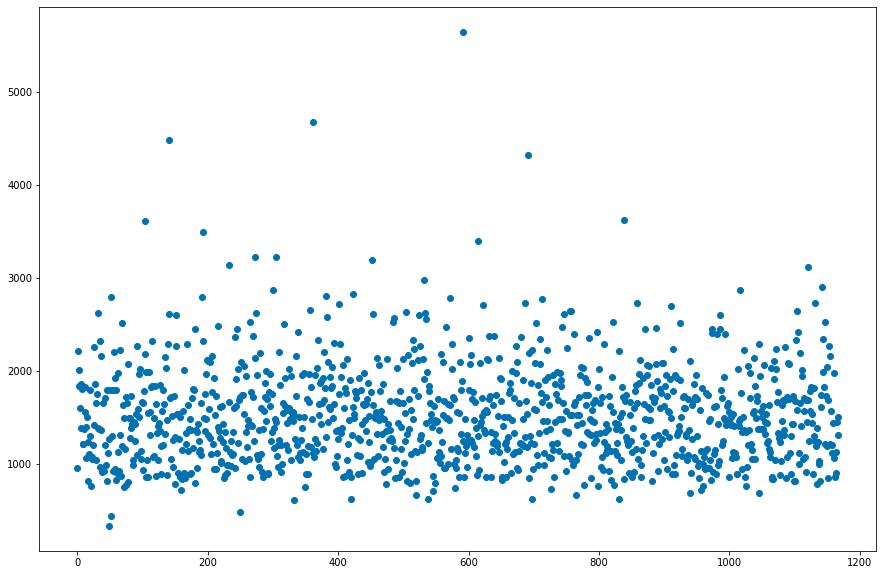

Scatter plot for LotArea column with respect to the rows covered ->


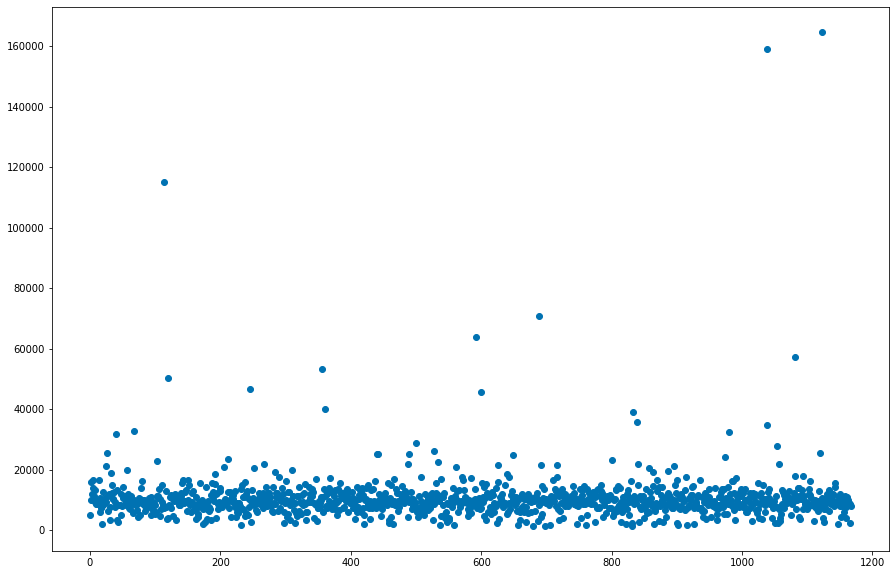

In [28]:
plt.style.use('seaborn-colorblind')
for j in df_train[triple]:
    plt.figure(figsize=(15,10))
    print(f"Scatter plot for {j} column with respect to the rows covered ->")
    plt.scatter(df_train.index, df_train[j])
    plt.show()

Observations:

Maximum standard deviation of 8957.44 is observed in LotArea column.  

Maximum SalePrice of a house observed is 755000 and minimum is 34900.

In the columns MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed. 

In the columns MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

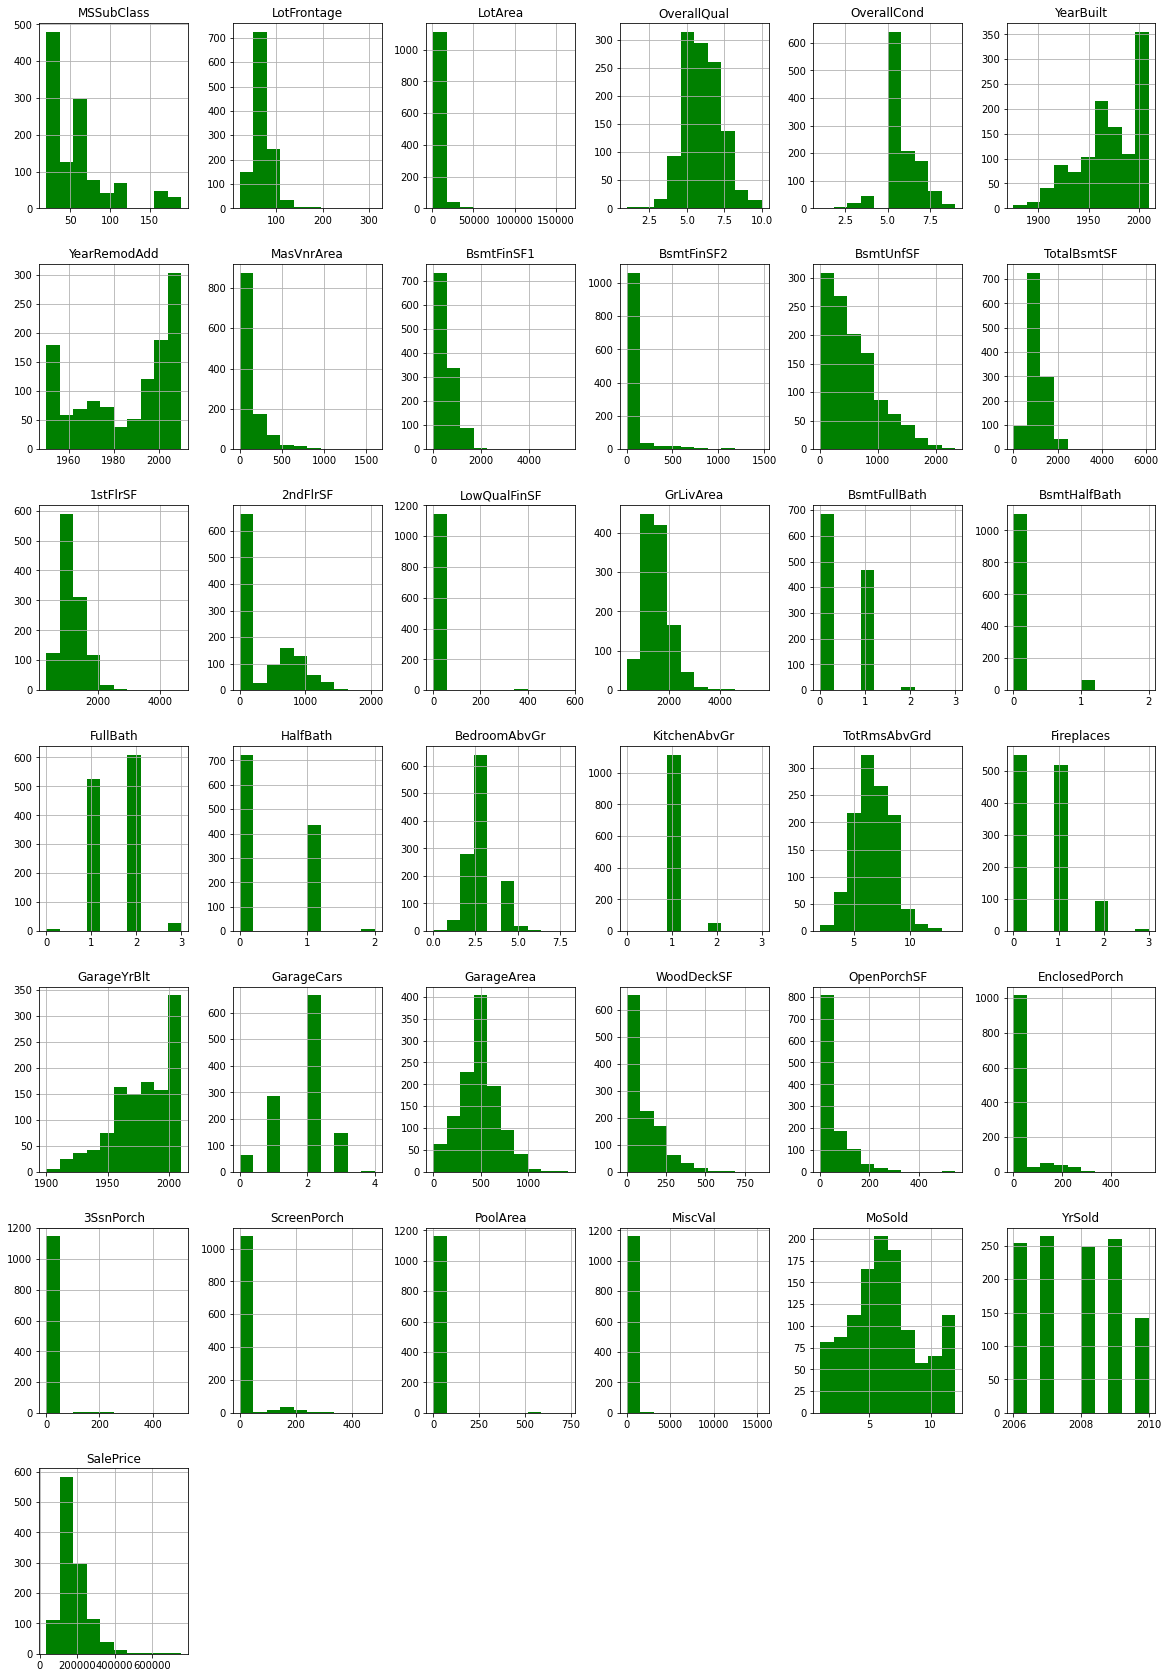

In [29]:
plt.style.use('seaborn-bright')

df_train.hist(figsize=(20,30) ,color='green')
plt.show()

Observations:

-> lotFrontage:Almost all houses have LotFrontage between 20 to 150 

 -->lotArea:Around 580 house have lot Area between (0-10000)sqft.Very few houses have lot area aound 120000sqft & around 160000sqft

 -> OverallQual: Rates the overall material and finish of the house-: Around 300 houses sold were in average condition. Only 10-15 houses were in excellent condition. 
 
 -> YearBuilt: Original construction date-: More number of people have brought the houses build after 1990

 -> MasVnrArea: Masonry veneer area in square feet-:50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200 
 
 -> BsmtFinSF1: Type 1 finished square feet-: Most houses have Type 1 finished square feet area of basement between 0 and 1500 -> BsmtFinSF2: Type 2 finished square feet-: Around 1000 houses have Type 2 finished square feet area of 0 
 
 -> BsmtUnfSF: Unfinished square feet of basement area-: Around 130 houses have unfinished basement of area around 100-500 sqft

 -> 1stFlrSF: First Floor square feet-: Around 280 houses have 1st floor square feet area between 800-1200sqft 
 
 -> GrLivArea: Above grade (ground) living area square feet-: Most houses have above ground living sq ft area in between 800 to 3000

 -> BsmtFullBath: Basement full bathrooms-:50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathroom in basement and very few has 2 full bathrooms 
 
 -> FullBath: Full bathrooms above grade-:25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3

 -> HalfBath: Half baths above grade-: around 700 houses have no half bathrooms very few has 1 half bathroom 
 
 -> Bedroom: Bedrooms above grade (does NOT include basement bedrooms)-: Most houses have 3 bedrooms above ground followed by 2 and 4 
 
 
  -> GarageCars: Size of garage in car capacity-: Most houses have garage with 2 car capcity 
  
   -> Sale Price-: Around 500 houses have sale price in between 100000 to 200000.
   Very few houses have sale price of 600000 & 700000


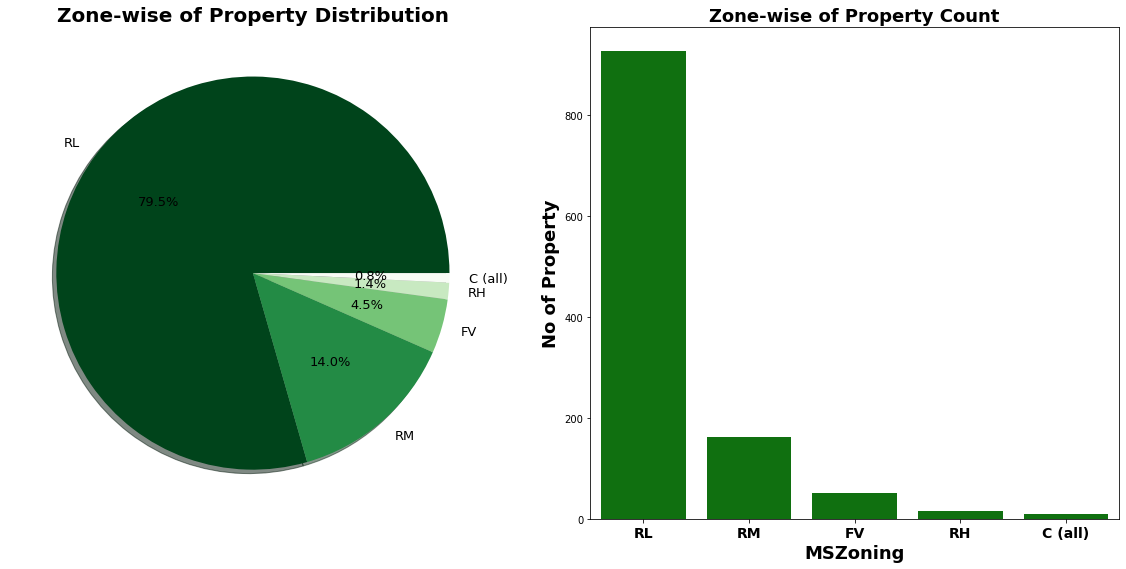

In [30]:
# Exploring MSZoning Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df_train['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True,cmap='Greens_r')
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='MSZoning',data=df_train,ax=ax[1],color='g')
ax[1].set_title('Zone-wise of Property Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("MSZoning",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

Observation:
    
79.5% of House properties belongs to Low Density Residential Area followed by 14 % of properties belong to Medium Density Residential Area.

Very Few property (0.8%) belongs to Commerical zone.

*Lets explore Zone relation with respect to Sale Price*

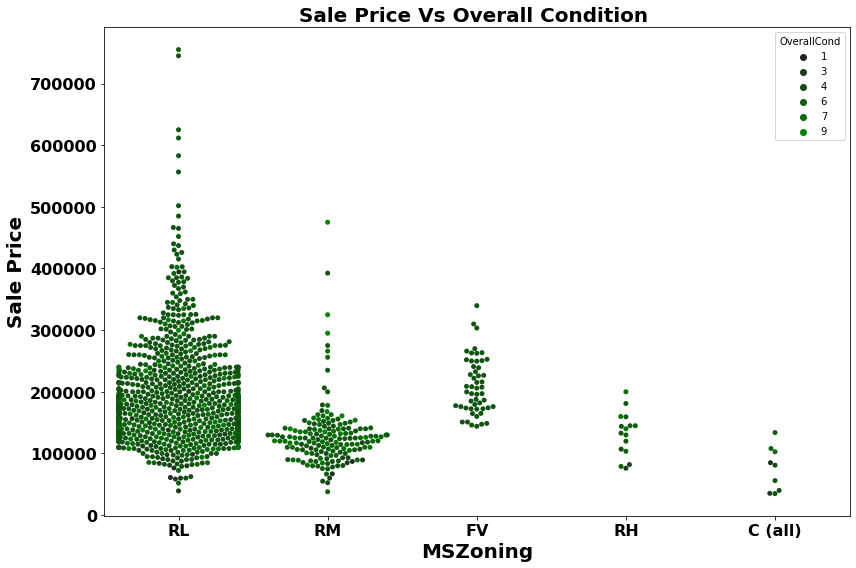

In [31]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(12,8))
sns.swarmplot(y=df_train['SalePrice'], x=df_train['MSZoning'], hue =df_train['OverallCond'],color='g')
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

Observation :
    
Most of property for sale have overall condition rating of either 5 or 6.

We already know of 80% of housing data belongs to Low density Residential Area and Now we can see in Swramplot that Sale Price inside RL Zone is much higher than other remaining zone.
Cheapest properties are available in Commerical zone.

Another interesting observation we get here is for some house properties having Overall condition Rating of 8 & 9 have low price compare to others. This indicate that Overall Condition Rating is Not significant factor in determination of Sale price. Overall Condition Rating may helpful to buyer in taking decision of Buying property but not in determination of House Price.

*There may be other factors like Street Size or House Size may have major correlation with Sale Price.*

LotFrontage: Linear feet of street connected to property

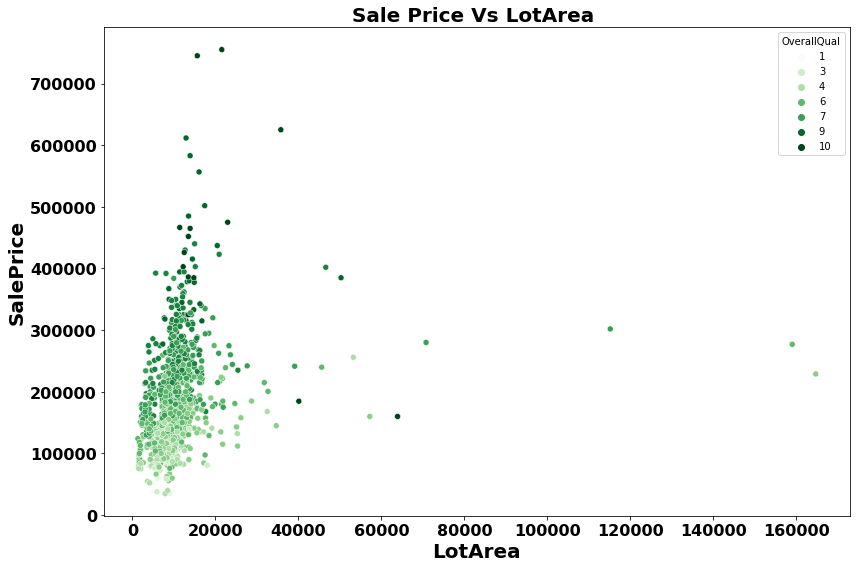

In [32]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df_train['SalePrice'], x=df_train['LotArea'], hue =df_train['OverallQual'], palette="Greens")
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

Observation:
    
There is No Significant relationship found between Sale price & Lot area.
Here we get Important Observation that -

*As Overall Quality of House Increase the Sale Price of House also Increases.*

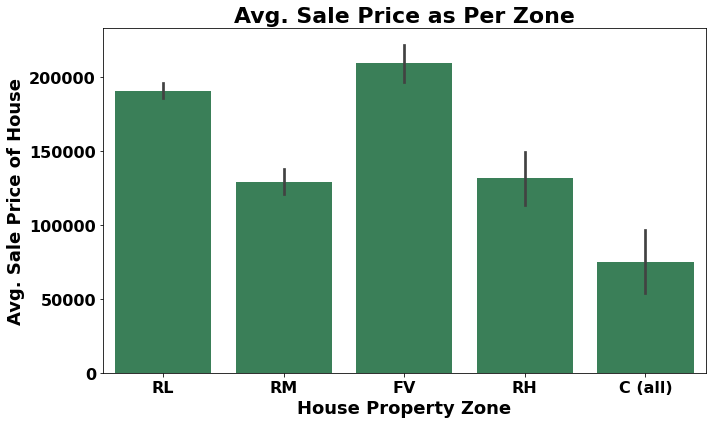

In [33]:
plt.rcParams['figure.autolayout'] = True
sns.color_palette("dark:#5A9_r", as_cmap=True)
plt.figure(figsize = (10,6))
sns.barplot(y = df_train['SalePrice'], x= df_train['MSZoning'],color='seagreen')
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

Observation :
    
In terms of Average Sale price house properties belonging to Floating Village Residential Zone are costiler than rest
Effect of Land characteristics on Sale Price
Lot Shape Description :-
LotShape: General shape of property

   Reg	Regular	
   IR1	Slightly irregular
   IR2	Moderately Irregular
   IR3	Irregular

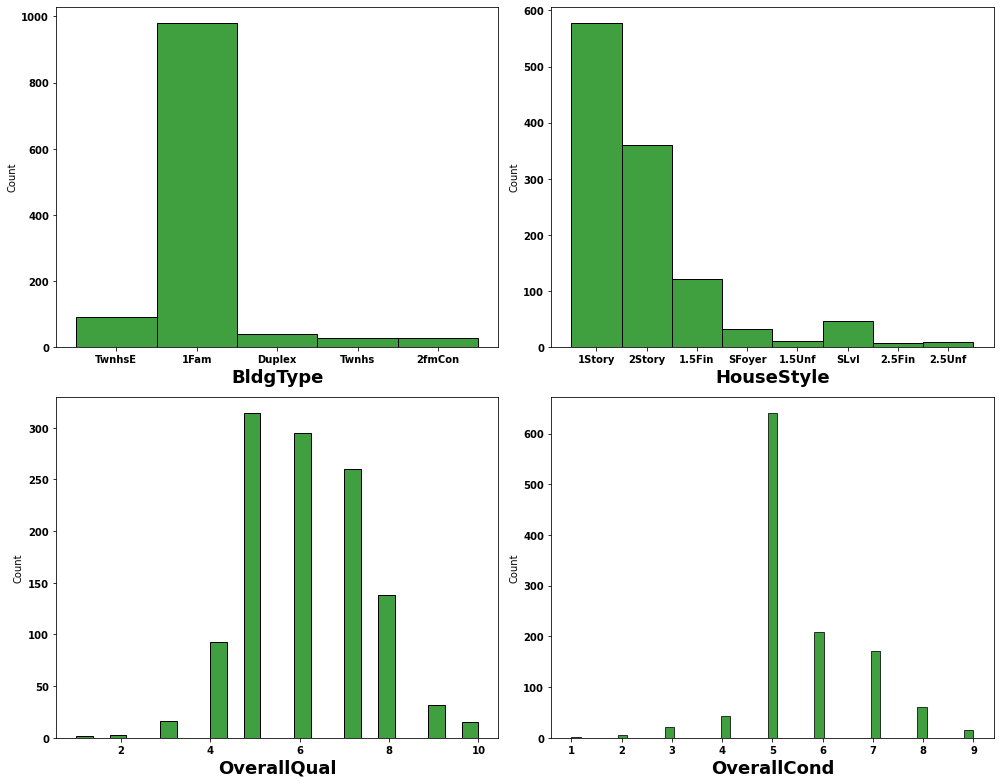

In [34]:
Feature_grp1 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]
plt.figure(figsize=(14,11),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( df_train[i],color='g')
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

Observation :
    
More than 950 house properties are with building type Single-family Detached

More than 50% of house properties comes with Overall Condition Rating of 5.

More than 75% of house properties come with overall Quality Rating varies between 5 to 6.

More than 500 House Properties comes with one story dwelling.

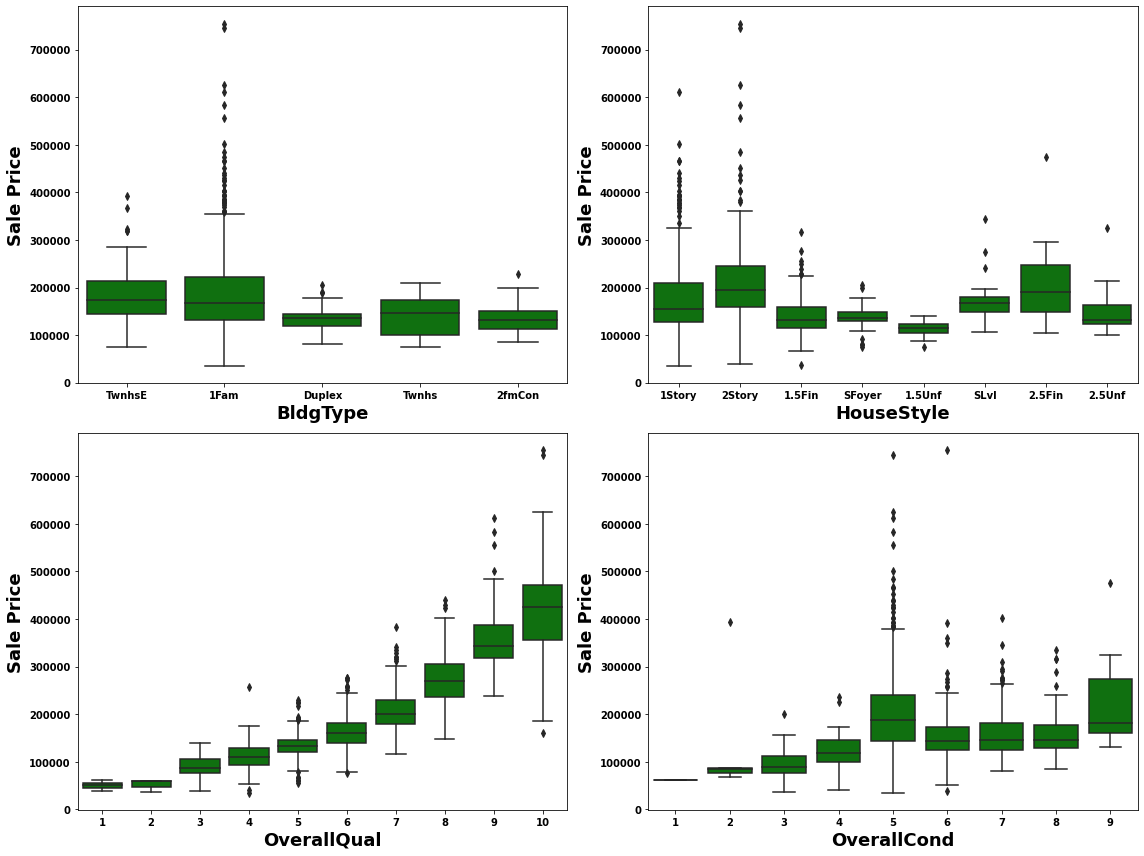

In [35]:
plt.figure(figsize=(16,12),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y = df_train['SalePrice'], x= df_train[i],color='g')
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

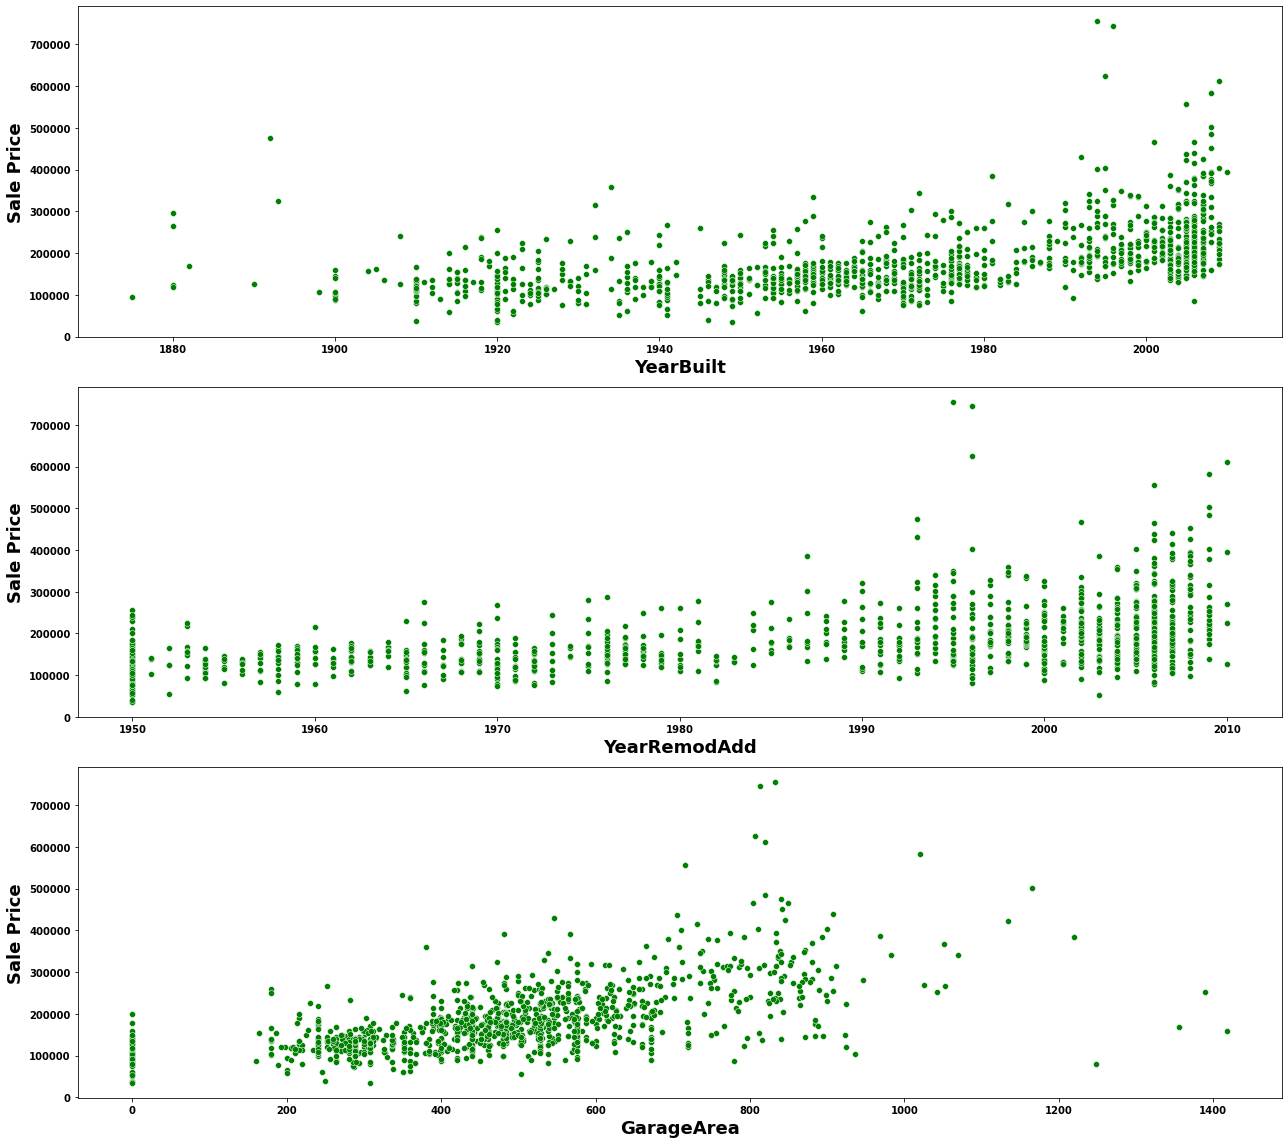

In [36]:
Feature_grp2 = ["YearBuilt", "YearRemodAdd", "GarageArea"]
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Feature_grp2:
    if plotnumber<=4:
        ax=plt.subplot(3,1,plotnumber)
        sns.scatterplot(y = df_train['SalePrice'], x= df_train[i],color ='g')
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

Observation :-
    
We can see that as Property get older with time its sale Price get depricates.

20 years after Remodelling Price of properties start decreases.

Older the garage age less the price of Property.

Sale related features

SaleType Description :-
SaleType : Type of sale WD Warranty Deed - Conventional CWD Warranty Deed - Cash VWD Warranty Deed - VA 
Loan New Home just constructed and sold COD Court Officer Deed/Estate Con Contract 15% Down payment regular terms ConLw Contract Low Down payment 
and low interest ConLI Contract Low Interest ConLD Contract Low Down Oth Other

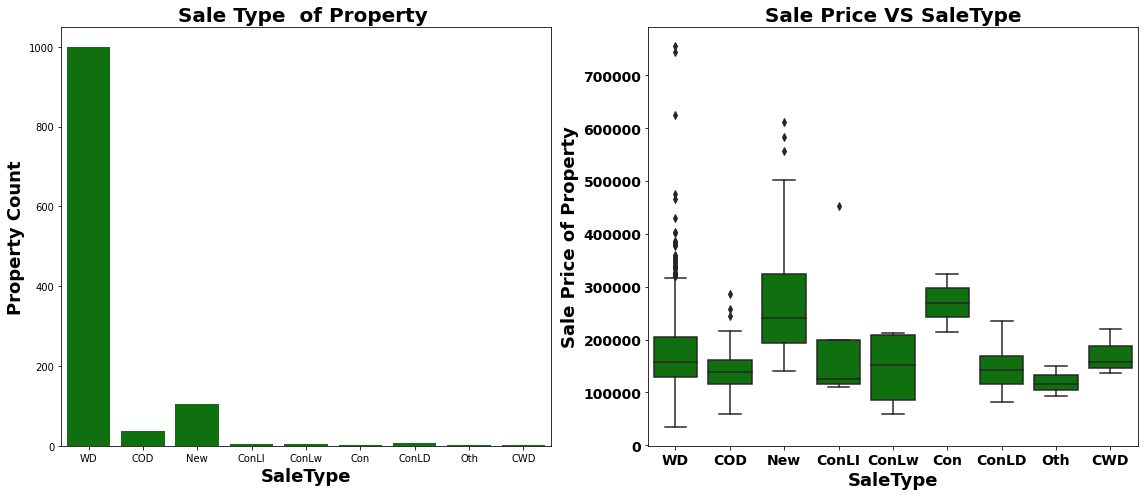

In [37]:
# Exploring SaleType Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot(x='SaleType',data=df_train,ax=ax[0],color='g')
ax[0].set_title('Sale Type  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('SaleType', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df_train['SalePrice'], x=df_train['SaleType'], ax=ax[1],color='g')
ax[1].set_title('Sale Price VS SaleType',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleType",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

Observation :-
    
Around 1000 sales happen by Conventional Warranty Deed.

Home just constructed and sold category are exceptionally much costiler than any one else.

All loan based sale are below 300000.

SaleCondition Description :-
SaleCondition: Condition of sale

   Normal	Normal Sale   
   Abnorml	Abnormal Sale -  trade, foreclosure, short sale
   AdjLand	Adjoining Land Purchase
   Alloca	Allocation - two linked properties with separate deeds,typically condo with a garage unit	
   Family	Sale between family members
   Partial	Home was not completed when last assessed (associated with New Homes)

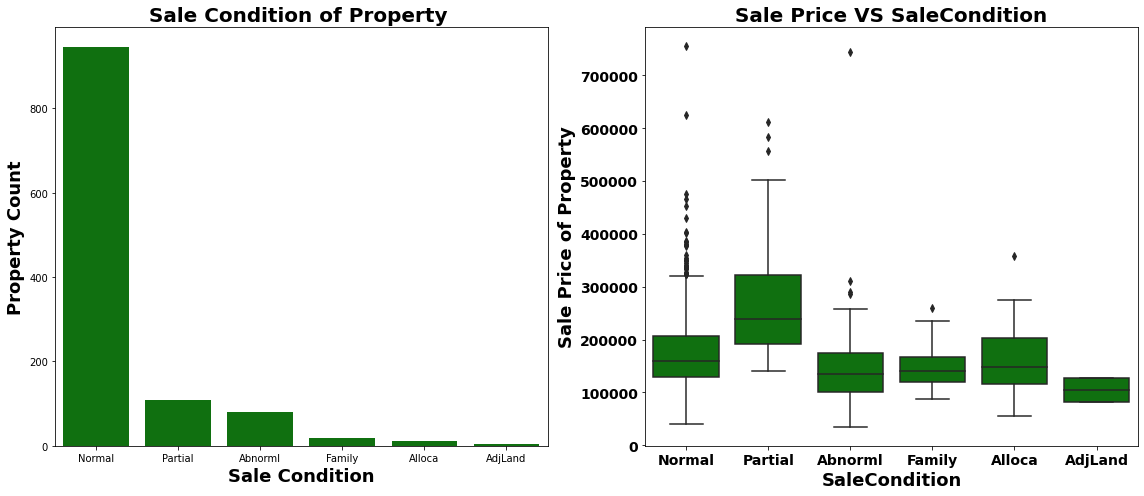

In [38]:
# Exploring SaleCondition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot(x='SaleCondition',data=df_train,ax=ax[0],color='g')
ax[0].set_title('Sale Condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Sale Condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df_train['SalePrice'], x=df_train['SaleCondition'], ax=ax[1],color='g')
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleCondition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

Observation :-
    
We can see that Sale with condition like Abnorml, Family, Alloca, AdjLand are below the price of 300000.

Maximum Base Price for House comes from Partial category- Home was not completed when last assessed (associated with New Homes) is higher than rest.

Minimum base price comes from Normal condition sale and also highest sale price comes from this category.

Investigation of Relation between Floor Area and Sale Price
It is common known fact that as Floor area increases the cost of Properties get increases.

*Some of Property are single story while others are 2 story. In this Section we will explore relation between Grand Total Floor space (in square feet ) with Sale Price*

Note - We also know as Quality Rating increase Price of House increase so we incorparate Overall Quality Rating in exploration.

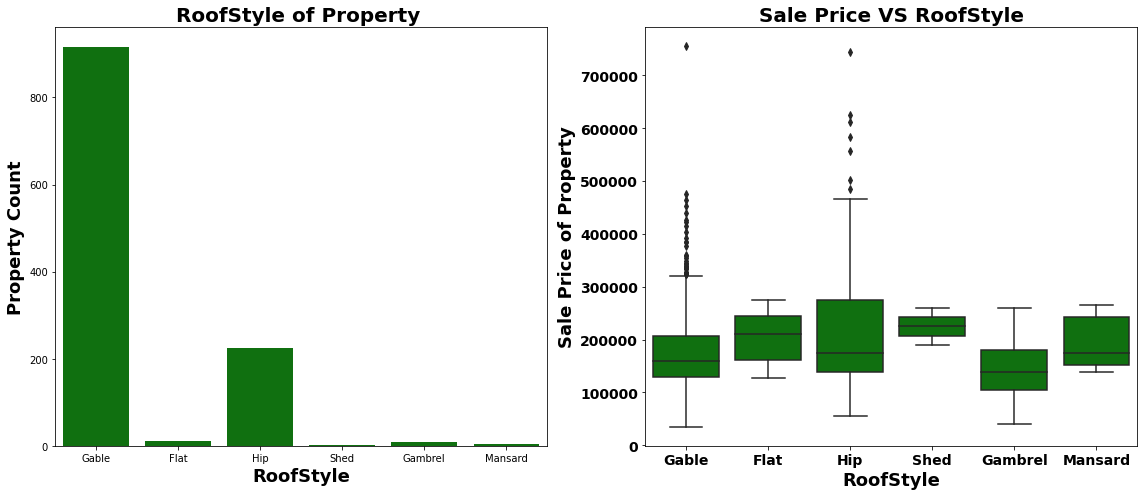

In [39]:
# Exploring RoofStyle Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot(x='RoofStyle',data=df_train,ax=ax[0],color='g')
ax[0].set_title('RoofStyle of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofStyle', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df_train['SalePrice'], x=df_train['RoofStyle'], ax=ax[1],color='g')
ax[1].set_title('Sale Price VS RoofStyle',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("RoofStyle",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

Observation :-
    
More than 75% House properties come with Gable Roof Style followed by around 15 % house properties with Hip Style.

From Boxplot we can see that Hip style Roof are much costlier than remaining roof style.

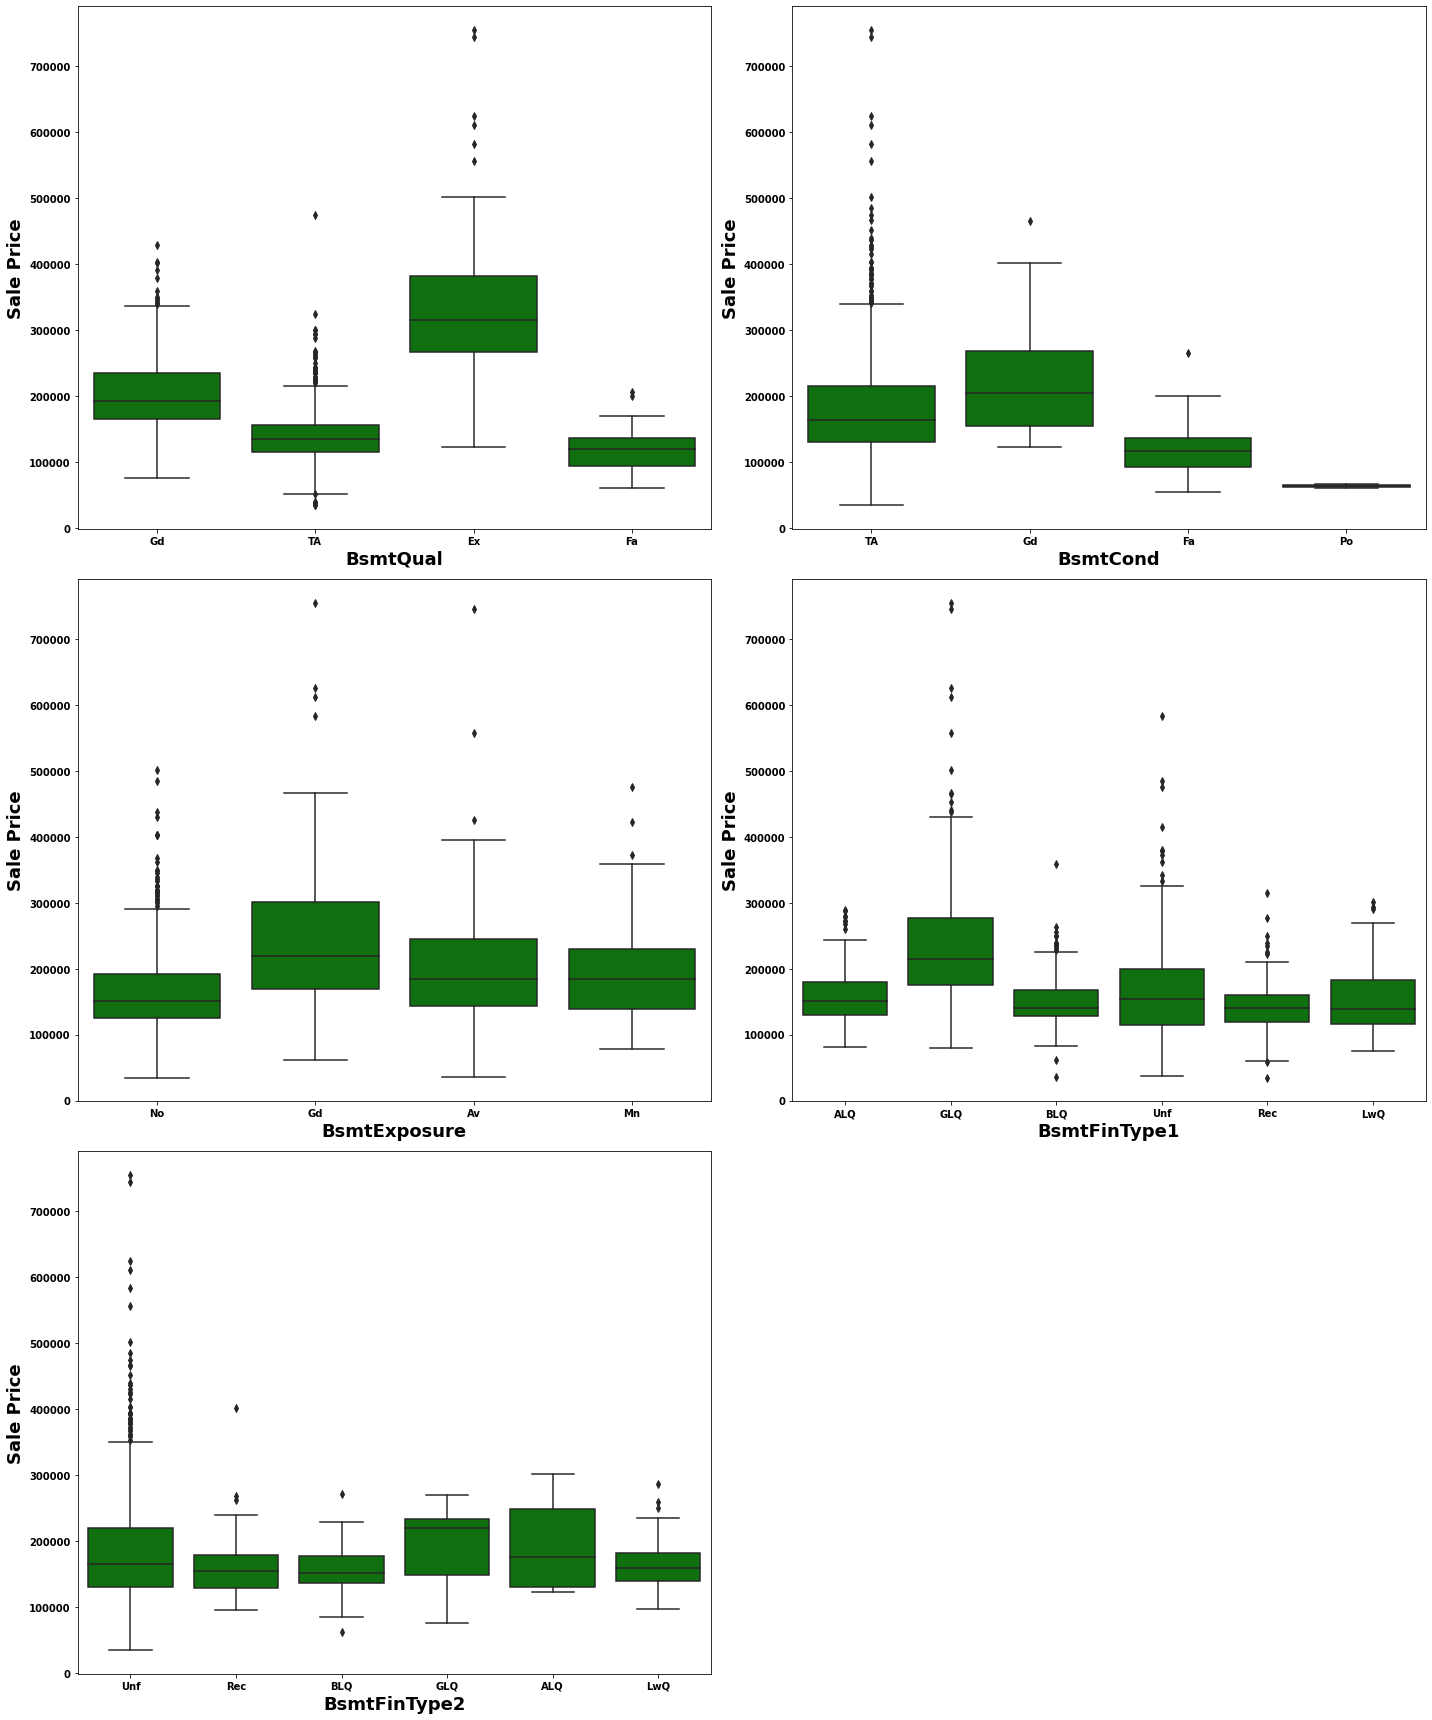

In [40]:
Feature_basement= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

plt.figure(figsize=(20,24),facecolor='white')
plotnumber=1

for i in Feature_basement:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        
        sns.boxplot(y = df_train['SalePrice'], x= df_train[i],color='g')
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

# Correlation using a Heatmap

Positive correlation - 

    A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation -

    A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

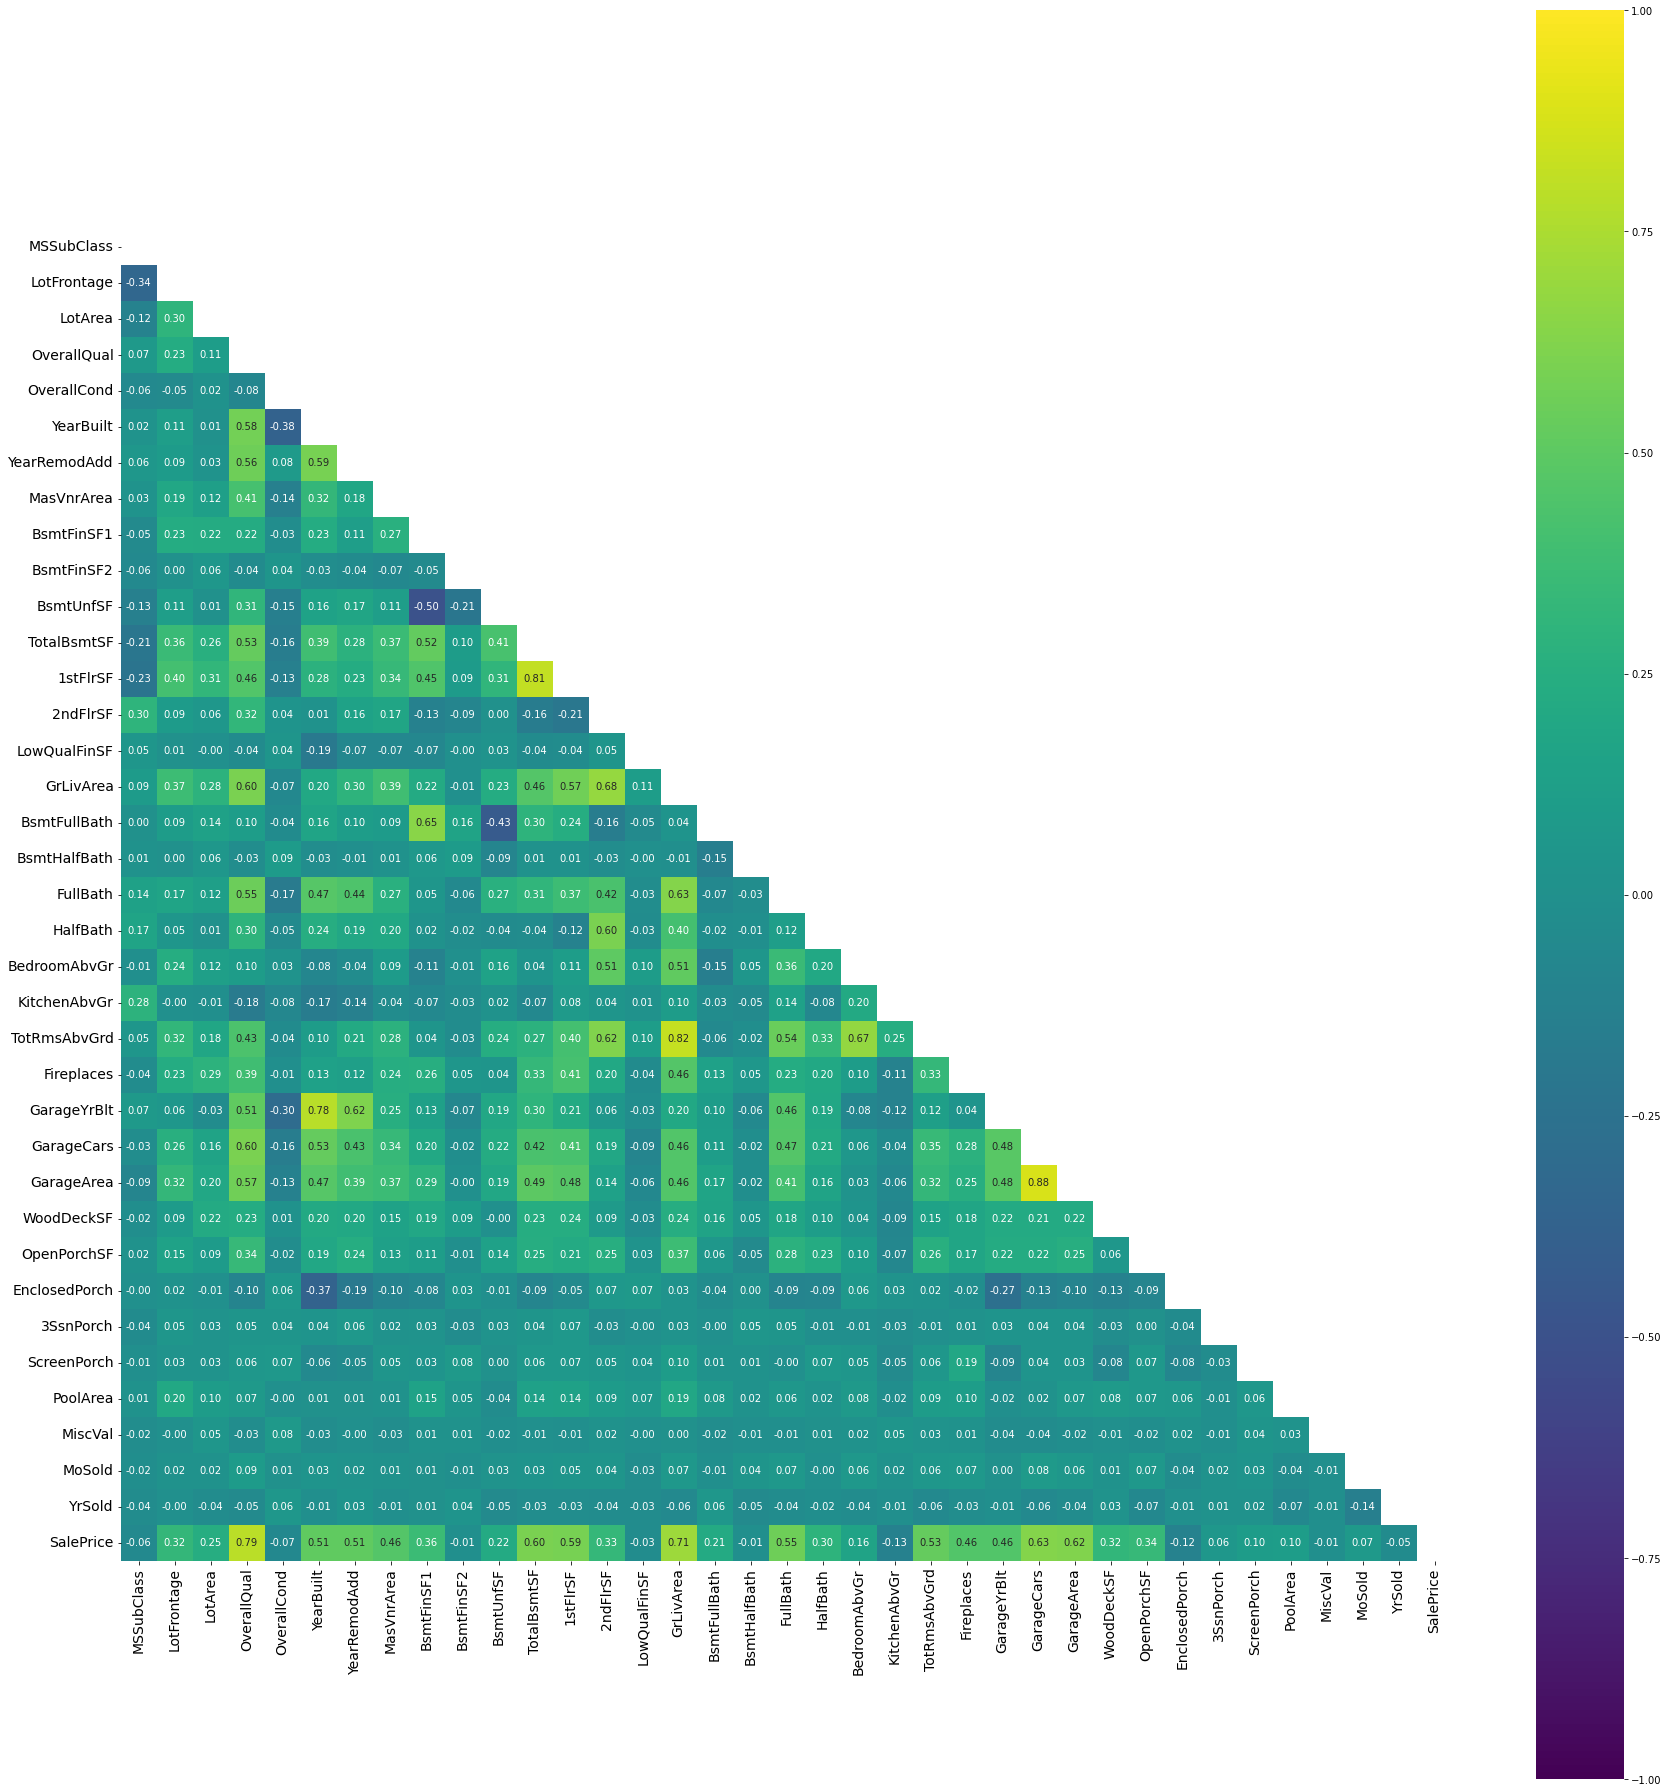

In [41]:
upper_triangle = np.triu(df_train.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10}, cmap="viridis", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Observations

'MSSubClass’,'OverallCond’,'OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'KitchenAbvGr’,'YrSold','EnclosedPorch','MiscVal' are negatively correlated with the target column, rest all are positively correlated

'OverallQual' & 'GrLivArea' are highly positively correlated with target column

'MSSubClass','OverallCond','OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column

# Correlation Bar Plot comparing features with our label

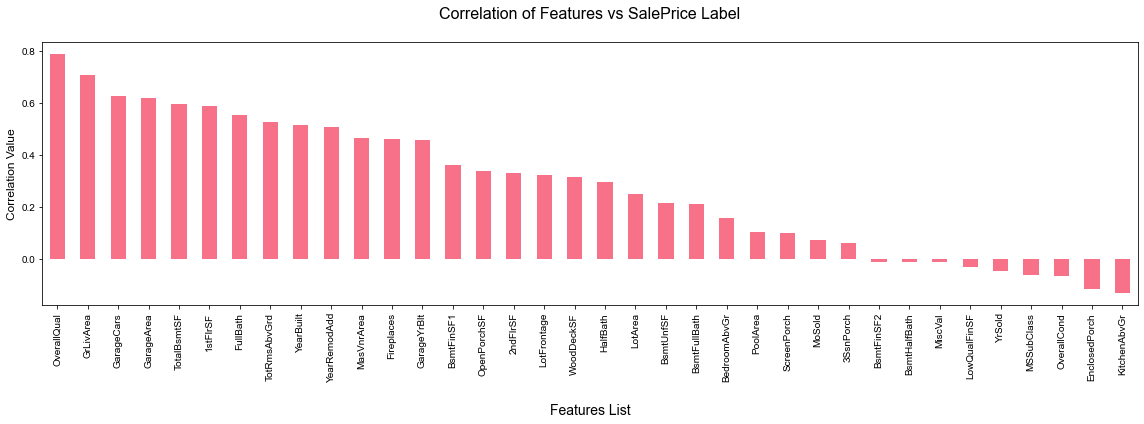

In [42]:
df_corr = df_train.corr()
plt.figure(figsize=(16,6))
df_corr['SalePrice'].sort_values(ascending=False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs SalePrice Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.xticks(rotation = 90)
plt.style.use(['seaborn-v0_8-whitegrid'])
#print(plt.style.available)
plt.show()

Observations

SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

# Checking top  features(Numerical) using SelectKBest algorithm

In [43]:
df_train[numeric_datatype]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120     70.98847     4928            6            5       1976   
1             20     95.00000    15865            8            6       1970   
2             60     92.00000     9920            7            5       1996   
3             20    105.00000    11751            6            6       1977   
4             20     70.98847    16635            6            7       1977   
5             60     58.00000    14054            7            5       2006   
6             20     70.98847    11341            5            6       1957   
7             20     88.00000    13125            5            4       1957   
8             20     70.00000     9170            5            7       1965   
9             50     80.00000     8480            5            5       1947   
10            50     50.00000     8600            6            6       1937   
11            60     44.00000     9548            7            6       2003   
12            20    129.00000     9196            7            5       2003   
13            20     80.00000     8892            5            5       1960   
14            50     59.00000    16466            5            7       1955   
15            70     55.00000    10592            6            7       1923   
16            30     70.98847     5890            6            8       1930   
17            20     64.00000     7314            7            5       2007   
18            20     70.98847     7917            6            7       1976   
19           160     24.00000     2016            5            5       1970   
20            60     80.00000    12435            7            5       2001   
21            85     70.00000     8445            5            7       1972   
22            20     68.00000     9717            5            6       1950   
23            20     70.98847    10659            5            6       1961   
24            20     71.00000     9230            5            8       1965   
25            20     70.98847    21000            6            5       1953   
26            30     70.98847    25339            5            7       1918   
27            20     88.00000    11394            9            2       2010   
28            45     58.00000     6380            5            6       1922   
29            70     74.00000    11988            6            7       1934   
30           120     61.00000     7658            9            5       2005   
31            60     60.00000     3378            7            8       1946   
32            90     70.98847    18890            5            5       1977   
33            50     70.98847    12358            5            6       1941   
34            60     70.98847    14762            5            6       1948   
35            20    120.00000    10356            5            6       1975   
36            20     80.00000    10400            7            5       1976   
37            20     84.00000    12615            6            7       1950   
38            85     70.98847     7540            6            6       1978   
39            40     50.00000     9100            5            6       1930   
40            20    141.00000    31770            6            5       1960   
41            20     70.00000    13300            5            7       1956   
42           160     30.00000     3180            7            5       2005   
43           160     24.00000     2522            6            5       2004   
44            80     65.00000     8385            5            8       1977   
45            20     76.00000     8314            5            7       1982   
46            60     60.00000     8123            6            5       2000   
47            20    100.00000    12000            5            7       1948   
48            20     50.00000     5000            1            3       1946   
49            20     70.00000     7931            5     

In [44]:
import pandas as pd
import numpy as np

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


x=df_train[numeric_datatype].drop("SalePrice",axis=1)  #independent columns
y=df_train[numeric_datatype]["SalePrice"]  # Output variable

#apply SelectKBest class to extract top 30 best features
bestfeatures = SelectKBest(score_func=f_regression, k=30)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 30 best features

            Specs        Score
3     OverallQual  1925.310146
15      GrLivArea  1167.278131
25     GarageCars   760.625799
26     GarageArea   724.282299
11    TotalBsmtSF   639.162482
12       1stFlrSF   615.032166
18       FullBath   518.998338
22   TotRmsAbvGrd   451.573798
5       YearBuilt   419.564317
6    YearRemodAdd   405.199690
7      MasVnrArea   319.254378
23     Fireplaces   312.273172
24    GarageYrBlt   309.521298
8      BsmtFinSF1   176.819524
28    OpenPorchSF   151.901231
13       2ndFlrSF   142.869824
1     LotFrontage   136.550260
27     WoodDeckSF   128.843420
19       HalfBath   111.632993
2         LotArea    77.401137
10      BsmtUnfSF    56.910469
16   BsmtFullBath    55.372874
20   BedroomAbvGr    29.962224
21   KitchenAbvGr    20.710982
29  EnclosedPorch    15.628061
32       PoolArea    12.571612
31    ScreenPorch    11.845527
34         MoSold     6.206432
4     OverallCond     5.045938
0      MSSubClass     4.322678


Top 10 Features

    OverallQual: Rates the overall material and finish of the house 

    GrLivArea: Above grade (ground) living area square feet

    GarageCars: Size of garage in car capacity

    GarageArea: Size of garage in square feet

    TotalBsmtSF: Total square feet of basement area

    1stFlrSF: First Floor square feet

    FullBath: Full bathrooms above grade

    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

    YearBuilt: Original construction date

    YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

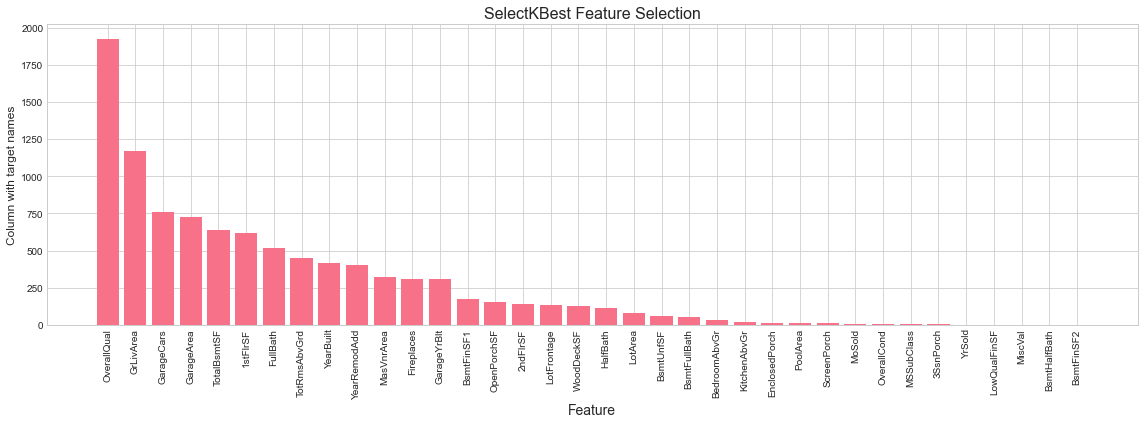

In [45]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(16,6))
plt.bar('Specs','Score',data=df_sorted_desc)
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target names",fontsize=12)
plt.title("SelectKBest Feature Selection",fontsize=16)
plt.style.use(['seaborn-v0_8-ticks'])
plt.xticks(rotation = 90)
plt.show()


# Check multi-Collinearity using VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
# We don't check VIF on categorical data(Country & Region) hence checking on continuous data 

X=df_train[numeric_datatype].drop("SalePrice",axis=1)  #independent columns
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          feature           VIF
0      MSSubClass  4.651513e+00
1     LotFrontage  1.717294e+01
2         LotArea  3.041767e+00
3     OverallQual  6.848961e+01
4     OverallCond  4.176210e+01
5       YearBuilt  2.200338e+04
6    YearRemodAdd  2.212939e+04
7      MasVnrArea  1.837902e+00
8      BsmtFinSF1           inf
9      BsmtFinSF2           inf
10      BsmtUnfSF           inf
11    TotalBsmtSF           inf
12       1stFlrSF           inf
13       2ndFlrSF           inf
14   LowQualFinSF           inf
15      GrLivArea           inf
16   BsmtFullBath  3.644515e+00
17   BsmtHalfBath  1.221667e+00
18       FullBath  2.710649e+01
19       HalfBath  3.441000e+00
20   BedroomAbvGr  3.206099e+01
21   KitchenAbvGr  3.880640e+01
22   TotRmsAbvGrd  8.602342e+01
23     Fireplaces  3.025696e+00
24    GarageYrBlt  2.279285e+04
25     GarageCars  3.547166e+01
26     GarageArea  3.209772e+01
27     WoodDeckSF  1.946291e+00
28    OpenPorchSF  1.900145e+00
29  EnclosedPorch  1.451837e+00
30      

Observations:

Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features

As there are multiple features (5) with VIF values ==Infinity, 
To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity

BUT

dropping columns might not be right in this case as the data loss will be more due to smaller dataset

# Check for Outliers & Remove

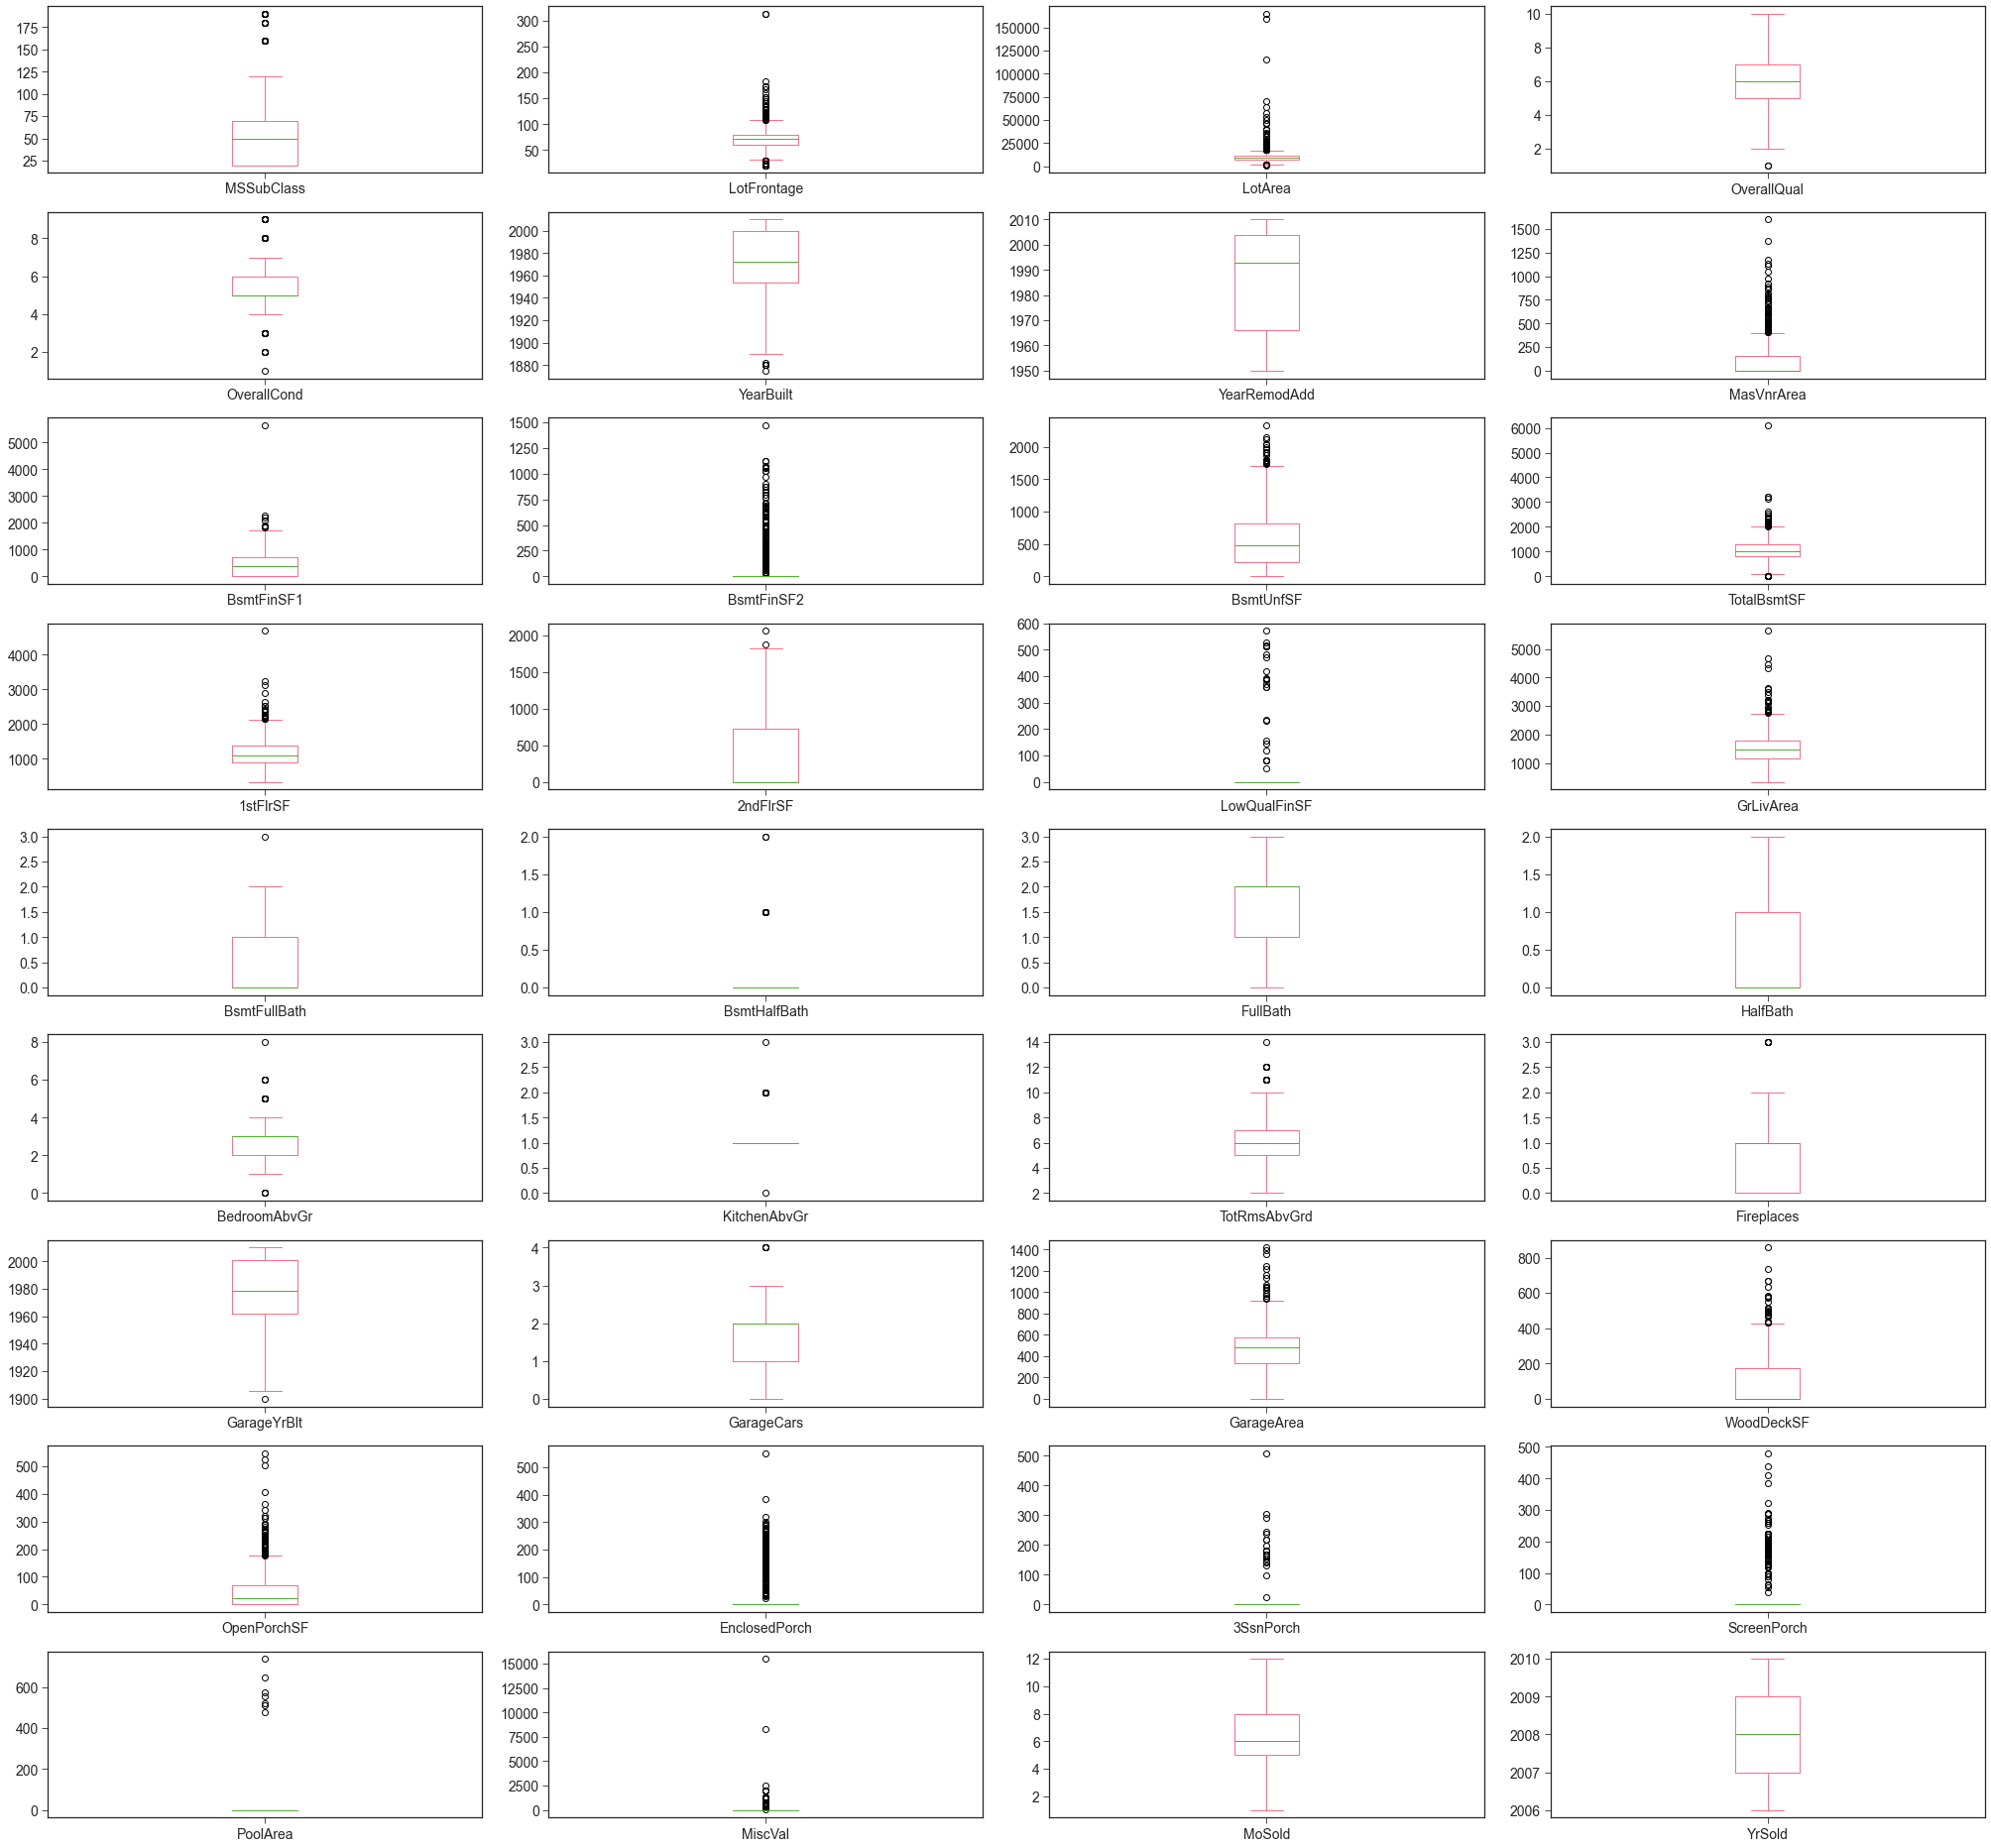

In [47]:
# We don't remove outliers of categorical  columns and in target variable
#checking outliers for continuous X features
x=df_train[numeric_datatype].drop("SalePrice",axis=1)  #independent columns
y=df_train[numeric_datatype]["SalePrice"]  # Output variable
x.plot(kind="box",subplots=True,layout=(9,4),fontsize=14,figsize=(28,26))
plt.show()

Observations:

Outliers exist in 'Standard Error', 'Trust (Government Corruption)'

Very few outliers exist in 'Generosity', 'Dystopia Residual'

In [48]:
#Remove outliers only for continuous X features
# We don't remove outliers of categorical columns &&& for target variables
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([   1,    1,    4,    7,   14,   20,   22,   23,   25,   27,   32,
          32,   32,   32,   33,   38,   40,   47,   48,   51,   51,   63,
          64,   66,   66,   68,   68,   72,   72,   73,   74,   76,   77,
          91,   93,   93,   94,   95,   96,   97,   98,   98,  103,  103,
         103,  103,  103,  103,  106,  106,  107,  112,  113,  115,  119,
         119,  119,  119,  120,  127,  127,  133,  133,  138,  138,  140,
         141,  141,  141,  141,  141,  141,  141,  142,  142,  143,  146,
         150,  151,  152,  153,  156,  156,  157,  162,  164,  166,  170,
         178,  178,  184,  187,  191,  192,  192,  192,  192,  195,  196,
         196,  205,  206,  210,  210,  211,  211,  212,  214,  216,  219,
         226,  228,  232,  232,  232,  237,  241,  241,  241,  243,  245,
         245,  253,  254,  255,  257,  259,  269,  272,  273,  284,  284,
         289,  290,  299,  299,  301,  303,  304,  305,  305,  305,  305,
         305,  308,  309,  310,  310, 

In [49]:
# Removing the rows where the outliers are present in x features with continuous data
features_new=x[(z<3).all(axis=1)]
target_new=y[(z<3).all(axis=1)]
#print(len(features_new))
features=features_new
target=target_new

(np.abs(zscore(features))<3).all().all()
features.shape,target.shape

((807, 36), (807,))

In [50]:
loss_percent=(len(x)-len(features_new))/len(x)*100
print("DataLooss with ZScore: ",loss_percent)

DataLooss with ZScore:  30.90753424657534


Observations:

Data loss is more than 10% hence it is not acceptable to remove the outliers

Will proceed with inclusion of Data Outliers only

# Encoding the categorical object datatype columns

In [51]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df_train, object_datatype)
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120       3.0     70.98847     4928     1.0       0.0          3.0   
1          20       3.0     95.00000    15865     1.0       0.0          3.0   
2          60       3.0     92.00000     9920     1.0       0.0          3.0   
3          20       3.0    105.00000    11751     1.0       0.0          3.0   
4          20       3.0     70.98847    16635     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        4.0        0.0          13.0         2.0         2.0       4.0   
1        4.0        1.0          12.0         2.0         2.0       0.0   
2        1.0        0.0          15.0         2.0         2.0       0.0   
3        4.0        0.0          14.0         2.0         2.0       0.0   
4        2.0        0.0          14.0         2.0         2.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0            6            5       1976          1976        1.0   
1         2.0            8            6       1970          1970        0.0   
2         5.0            7            5       1996          1997        1.0   
3         2.0            6            6       1977          1977        3.0   
4         2.0            6            7       1977          2000        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       1.0          8.0          9.0         2.0         0.0        3.0   
1       5.0         12.0         13.0         2.0         0.0        2.0   
2       1.0          7.0          7.0         2.0         0.0        2.0   
3       1.0          8.0          9.0         1.0       480.0        3.0   
4       1.0          4.0          4.0         3.0       126.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        4.0         1.0       2.0       3.0           3.0           0.0   
1        2.0         2.0       3.0       1.0           1.0           0.0   
2        4.0         2.0       2.0       3.0           0.0           2.0   
3        4.0         1.0       2.0       3.0           3.0           1.0   
4        4.0         1.0       2.0       3.0           3.0           0.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         120           5.0           0        958         1078      1.0   
1         351           4.0         823       1043         2217      1.0   
2         862           5.0           0        255         1117      1.0   
3         705           5.0           0       1139         1844      1.0   
4        1246           5.0           0        356         1602      1.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        4.0         1.0         4.0       958         0             0   
1        0.0         1.0         4.0      2217         0             0   
2        0.0         1.0         4.0      1127       886             0   
3        0.0         1.0         4.0      1844         0             0   
4        2.0         1.0         4.0      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1          3.0             5         6.0           1   
1             1          2.0             8         6.0           1   
2             1          3.0             8         6.0           1   
3             1          3.0   

I defined a function to apply OrdinalEncoder on my feature columns to convert the object datatype columns to numeric format.

In [52]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))

Shape of our data frame post encoding shows 1168 Rows and 74 columns



Checking the number of rows and columns after applying the encoding technique on them.

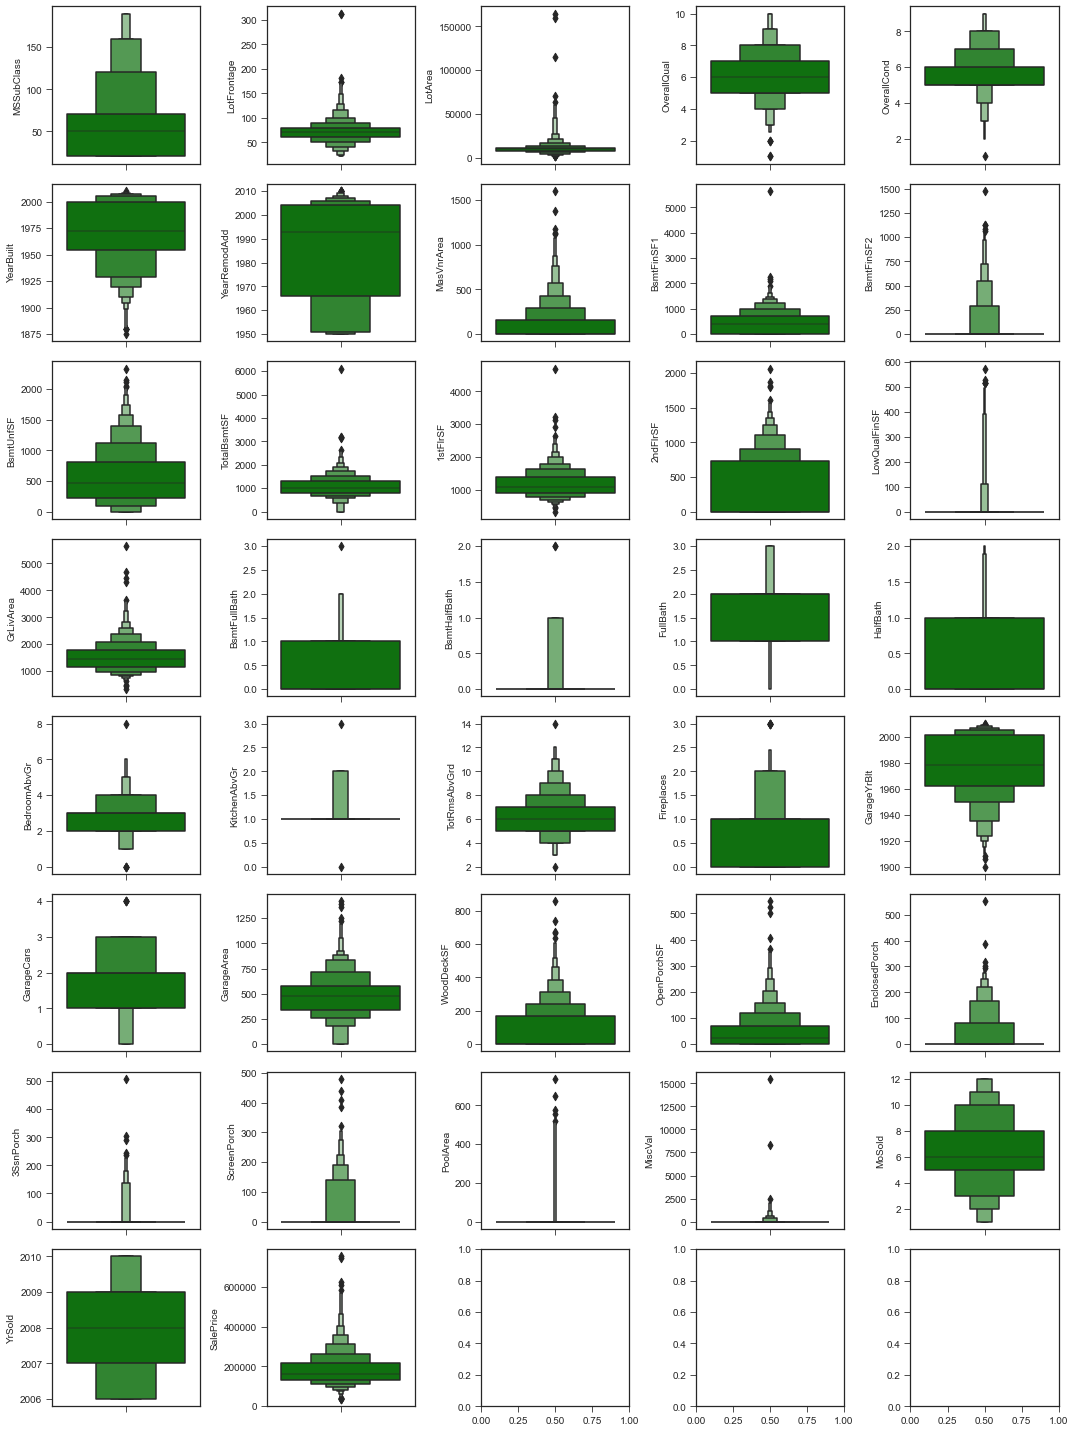

In [53]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df_train[numeric_datatype].items():
    sns.boxenplot(y=col, data=df_train, ax=ax[index], color="green")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Using the boxen plot we are able to see some outliers details however when I tried to remove outliers I was losing around 58% of data 
and therefore I decided on retaining the information that I have left with me.

# Transforming data to remove skewness

In [54]:
df.skew().sort_values(ascending=False)

MiscVal          23.065943
PoolArea         13.243711
Condition2       11.514458
LotArea          10.659285
Heating          10.103609
3SsnPorch         9.770611
LowQualFinSF      8.666142
RoofMatl          7.577352
LandSlope         4.812568
BsmtFinSF2        4.365829
KitchenAbvGr      4.365259
BsmtHalfBath      4.264403
ScreenPorch       4.105741
EnclosedPorch     3.043610
Condition1        3.008289
MasVnrArea        2.834658
LotFrontage       2.710383
OpenPorchSF       2.410840
BldgType          2.318657
SalePrice         1.953878
BsmtFinSF1        1.871606
TotalBsmtSF       1.744591
1stFlrSF          1.513707
WoodDeckSF        1.504929
RoofStyle         1.498560
GrLivArea         1.449952
MSSubClass        1.422019
BsmtUnfSF         0.909057
GarageType        0.831142
2ndFlrSF          0.823479
Fireplaces        0.671966
HalfBath          0.656492
TotRmsAbvGrd      0.644657
BsmtFullBath      0.627106
OverallCond       0.580714
HeatingQC         0.449933
HouseStyle        0.285680
B

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

In [55]:
df.agg(['skew', 'kurtosis']).transpose()
#skewness can be interpreted

# Fairly Symmetrical -0.5 to 0.5

# Moderate Skewed -0.5 to -1.0 and 0.5 to 1.0

# Highly Skewed < -1.0 and > 1.0

skew    kurtosis
MSSubClass      1.422019    1.697882
MSZoning       -1.796785    6.473051
LotFrontage     2.710383   24.663440
LotArea        10.659285  158.999786
Street        -17.021969  288.240999
LotShape       -0.603775   -1.606750
LandContour    -3.125982    8.480886
LotConfig      -1.118821   -0.634791
LandSlope       4.812568   24.448741
Neighborhood    0.043735   -1.090452
Condition1      3.008289   16.277652
Condition2     11.514458  223.525799
BldgType        2.318657    3.782633
HouseStyle      0.285680   -0.983758
OverallQual     0.175082    0.137871
OverallCond     0.580714    1.010681
YearBuilt      -0.579204   -0.503733
YearRemodAdd   -0.495864   -1.292204
RoofStyle       1.498560    0.757198
RoofMatl        7.577352   58.029114
Exterior1st    -0.612816   -0.687409
Exterior2nd    -0.592349   -0.818136
MasVnrType     -0.104609   -0.065033
MasVnrArea      2.834658   11.398799
ExterQual      -1.810843    3.797291
ExterCond      -2.516219    5.016464
Foundation     -0.002761    0.543042
BsmtQual       -1.343781    1.411052
BsmtCond       -3.293554    9.449970
BsmtExposure   -1.166987   -0.339669
BsmtFinType1   -0.068901   -1.414075
BsmtFinSF1      1.871606   13.180303
BsmtFinType2   -3.615783   12.828100
BsmtFinSF2      4.365829   21.148570
BsmtUnfSF       0.909057    0.420167
TotalBsmtSF     1.744591   15.696660
Heating        10.103609  116.207156
HeatingQC       0.449933   -1.549253
CentralAir     -3.475188   10.094211
Electrical     -3.104209    7.793793
1stFlrSF        1.513707    6.801196
2ndFlrSF        0.823479   -0.519876
LowQualFinSF    8.666142   76.909450
GrLivArea       1.449952    5.633460
BsmtFullBath    0.627106   -0.712319
BsmtHalfBath    4.264403   18.150446
FullBath        0.057809   -0.855288
HalfBath        0.656492   -1.092473
BedroomAbvGr    0.243855    2.275556
KitchenAbvGr    4.365259   20.203890
KitchenQual    -1.408106    1.693832
TotRmsAbvGrd    0.644657    0.801885
Functional     -3.999663   15.759431
Fireplaces      0.671966   -0.142735
GarageType      0.831142   -1.192709
GarageYrBlt    -0.662934   -0.272637
GarageFinish   -0.450190   -1.334821
GarageCars     -0.358556    0.256702
GarageArea      0.189665    1.049160
GarageQual     -4.582386   19.611892
GarageCond     -5.422472   28.379801
PavedDrive     -3.274035    9.022517
WoodDeckSF      1.504929    2.891117
OpenPorchSF     2.410840    9.171053
EnclosedPorch   3.043610   10.152896
3SsnPorch       9.770611  116.245220
ScreenPorch     4.105741   18.636022
PoolArea       13.243711  177.777483
MiscVal        23.065943  607.727095
MoSold          0.220979   -0.397352
YrSold          0.115765   -1.180126
SaleType       -3.660513   13.234031
SaleCondition  -2.671829    6.534285
SalePrice       1.953878    7.390657

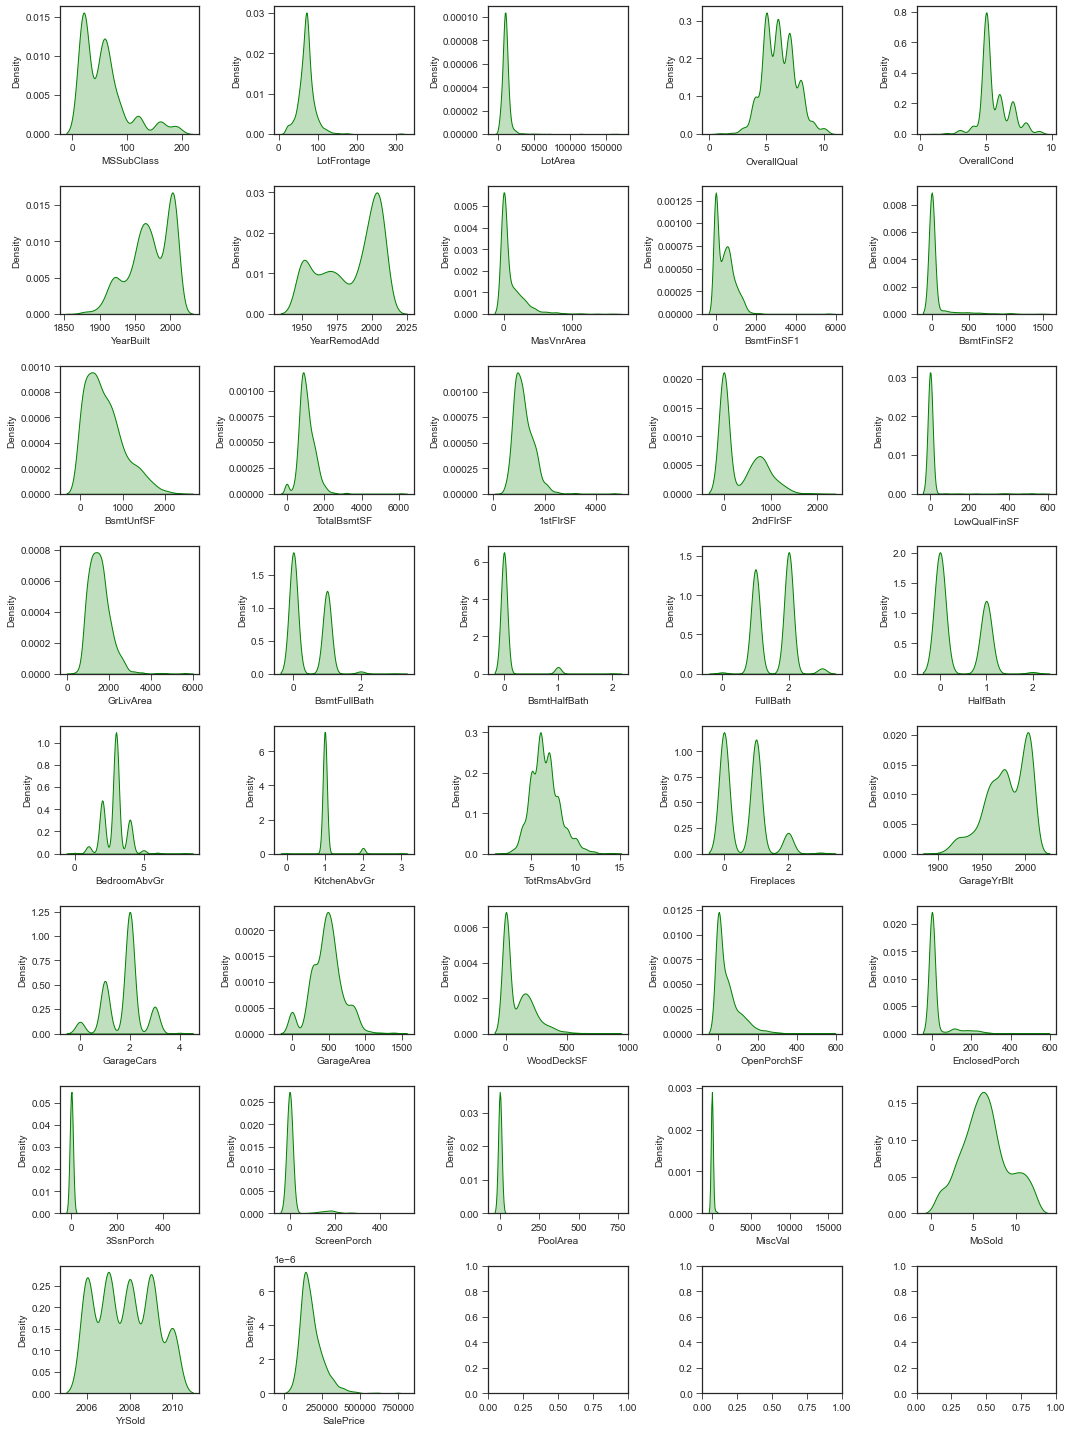

In [56]:
fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in df[numeric_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Using the above distribution plot we are able to see some skewness present in few of the columns that will need to be handled. 

However ,am not removing the skewness as we are proceeding with Outliers


# Split DataSet namely 'X' and 'Y' for feature and Target

In [57]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

print(df.shape)

(1168, 74)


I have bifurcated the dataset into features and Target

    where X represents all the feature columns 

    and Y represents the target label column.

# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.000000 -0.620616  0.058621 -1.373107   
1   -0.877042 -0.021646     1.070631  0.600903  0.058621 -1.373107   
2    0.077095 -0.021646     0.936867 -0.063075  0.058621 -1.373107   
3   -0.877042 -0.021646     1.516514  0.141424  0.058621 -1.373107   
4   -0.877042 -0.021646     0.000000  0.686902  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0  2.985495   -0.549930    -0.075169    -0.530217   0.168236     -0.421565   
1 -0.403288   -0.549930     1.364138     0.359572  -0.030885     -0.710356   
2 -0.403288    1.030838     0.644484    -0.530217   0.831975      0.589202   
3 -0.403288   -0.549930    -0.075169     0.359572   0.201423     -0.373434   
4 -0.403288   -0.549930    -0.075169     1.249361   0.201423      0.733598   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0  -0.483544 -0.134573    -0.212927    -0.104890    0.395209   -0.562238   
1  -1.685203  6.090408     1.079014     1.050880    0.395209   -0.562238   
2  -0.483544 -0.134573    -0.535912    -0.682775    0.395209   -0.562238   
3   1.919773 -0.134573    -0.212927    -0.104890   -1.241686    2.075571   
4  -0.483544 -0.134573    -1.504868    -1.549602    2.032104    0.130186   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
1  -0.759266  -2.318331    0.852451  0.836731 -2.672114     -1.113129   
2  -0.759266   0.369322    0.852451 -0.329500  0.293234     -1.987463   
3   0.671093   0.369322   -0.557836 -0.329500  0.293234      0.635539   
4  -0.759266   0.369322   -0.557836 -0.329500  0.293234      0.635539   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.523529   -0.702161      0.310141   -0.285392   0.864410     0.038239   
1     -1.523529   -0.202665     -0.771186    4.749787   1.053642     2.614679   
2     -0.434828    0.902279      0.310141   -0.285392  -0.700654     0.126458   
3     -0.979178    0.562795      0.310141   -0.285392   1.267363     1.770946   
4     -1.523529    1.732609      0.310141   -0.285392  -0.475801     1.223537   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.11909   1.390230    0.267506    0.299036 -0.541850 -0.793674   
1 -0.11909  -0.897602    0.267506    0.299036  2.678144 -0.793674   
2 -0.11909  -0.897602    0.267506    0.299036 -0.109619  1.222216   
3 -0.11909  -0.897602    0.267506    0.299036  1.724166 -0.793674   
4 -0.11909   0.246314    0.267506    0.299036  1.105232 -0.793674   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.125418  -1.074363     -0.816112     -0.235213  0.793082 -0.770138   
1     -0.125418   1.310934      1.101833     -0.235213  0.793082 -0.770138   
2     -0.125418   0.924437      1.101833     -0.235213  0.793082  1.211186   
3     -0.125418   0.604250     -0.816112     -0.235213  0.793082 -0.770138   
4     -0.125418   0.145757     -0.816112      3.991376  0.793082 -0.770138   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0     -1.082679     -0.209883     0.806154     -0.965583    0.261146   
1      1.365664     -0.209883    -0.394851      0.911999    0.261146   
2      0.141492     -0.209883     0.806154      0.911999    0.261146   
3      0.141492     -0.209883     0.806154      0.286138    0.261146   
4      0.141492  

I am scaling my feature data to ensure that there is no issue with the data biasness 
over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding the best random state for building Regression Models

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.8850947009081415 on Random State 340


Here we see that out of the random state value ranging from 1 to 1000 
the best random state number found is 340 and we will use this in our ML models.

# Feature importance dataframe

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                 
OverallQual         0.572
GrLivArea           0.101
1stFlrSF            0.041
GarageArea          0.032
TotalBsmtSF         0.027
BsmtFinSF1          0.026
2ndFlrSF            0.020
MasVnrArea          0.019
BsmtQual            0.018
LotArea             0.011
Neighborhood        0.009
GarageFinish        0.008
YearBuilt           0.008
FullBath            0.008
LotFrontage         0.008
YearRemodAdd        0.007
GarageCars          0.007
OpenPorchSF         0.006
OverallCond         0.005
GarageYrBlt         0.005
BsmtUnfSF           0.005
CentralAir          0.004
MoSold              0.004
ExterQual           0.004
KitchenQual         0.003
WoodDeckSF          0.003
GarageType          0.002
HalfBath            0.002
Fireplaces          0.002
TotRmsAbvGrd        0.002
BsmtFinType1        0.002
BsmtHalfBath        0.002
LandContour         0.002
BedroomAbvGr        0.002
YrSold              0.002
Exterior2nd         0.002
MSSubClass          0.001
EnclosedPorch       0.001
3SsnPorch           0.001
ScreenPorch         0.001
PoolArea            0.001
SaleType            0.001
BsmtFullBath        0.001
SaleCondition       0.001
HouseStyle          0.001
HeatingQC           0.001
MSZoning            0.001
LotShape            0.001
LotConfig           0.001
BsmtExposure        0.001
RoofStyle           0.001
Foundation          0.001
ExterCond           0.001
MasVnrType          0.001
Exterior1st         0.001
Condition1          0.000
BldgType            0.000
Condition2          0.000
LowQualFinSF        0.000
MiscVal             0.000
Street              0.000
LandSlope           0.000
RoofMatl            0.000
PavedDrive          0.000
GarageCond          0.000
GarageQual          0.000
Electrical          0.000
BsmtCond            0.000
Functional          0.000
BsmtFinType2        0.000
KitchenAbvGr        0.000
BsmtFinSF2          0.000
Heating             0.000

In the above cell we can the columns arranged in 
descending order as per their importance weightage while predicting our label variable

    OverallQual: Rates the overall material and finish of the house 
    GrLivArea: Above grade (ground) living area square feet
    1stFlrSF: First Floor square feet
    TotalBsmtSF: Total square feet of basement area
    BsmtFinSF1: Type 1 finished square feet
    MasVnrArea: Masonry veneer area in square feet
    GarageArea: Size of garage in square feet
    FullBath: Full bathrooms above grade
    BsmtQual: Evaluates the height of the basement
    2ndFlrSF: Second floor square feet

Top Features which can affect Housing prices 

    OverallQual: Rates the overall material and finish of the house 
    GrLivArea: Above grade (ground) living area square feet
    TotalBsmtSF: Total square feet of basement area
    FullBath: Full bathrooms above grade
    GarageArea: Size of garage in square feet    


In [61]:
top_features=['OverallQual','GrLivArea','TotalBsmtSF','FullBath','GarageArea']

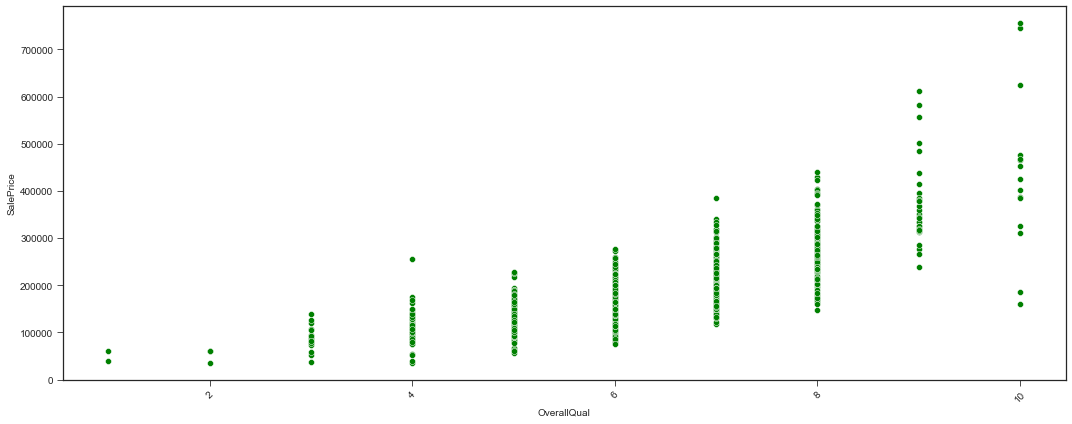

<Figure size 432x288 with 0 Axes>

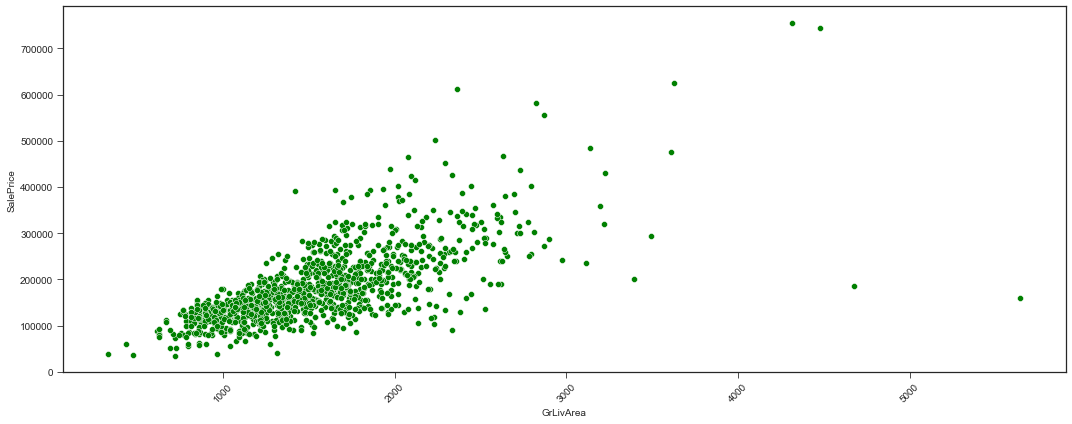

<Figure size 432x288 with 0 Axes>

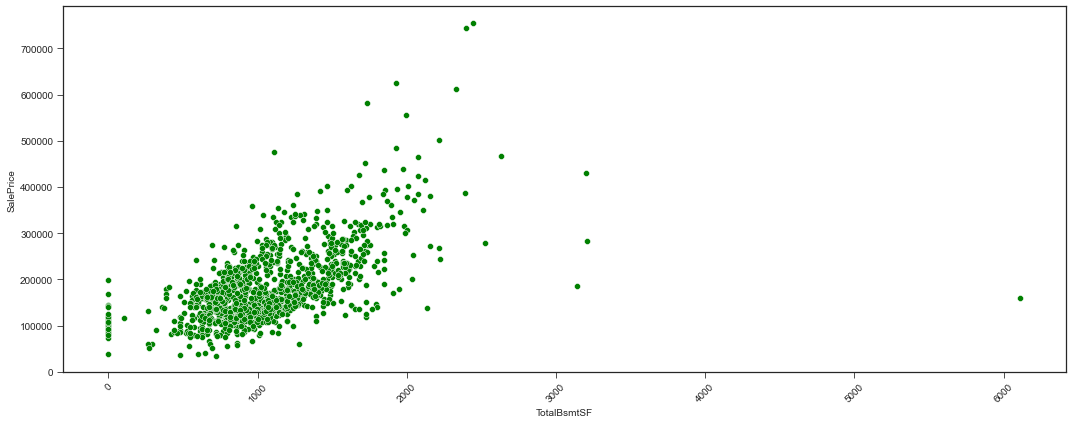

<Figure size 432x288 with 0 Axes>

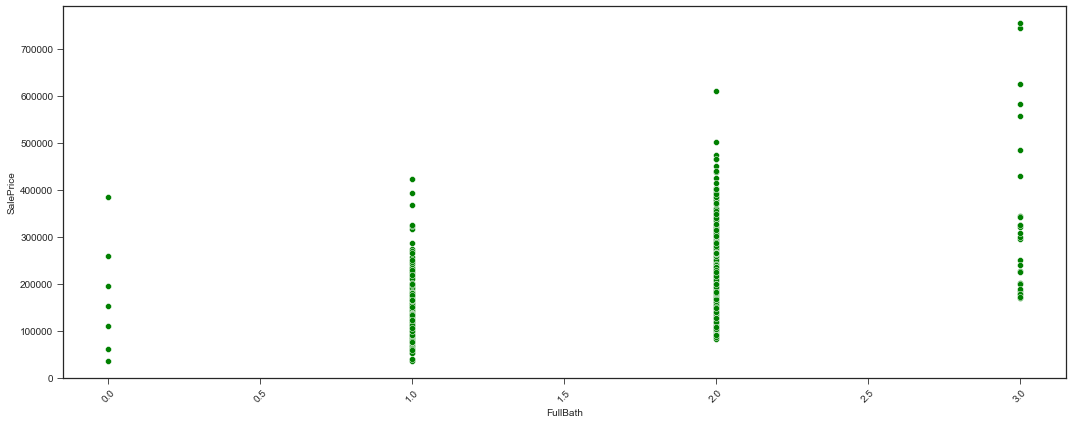

<Figure size 432x288 with 0 Axes>

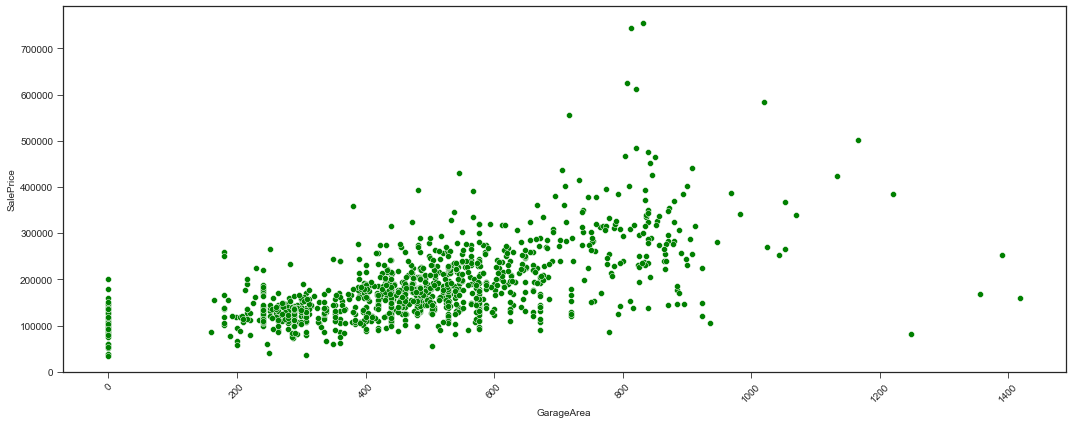

<Figure size 432x288 with 0 Axes>

In [62]:
for i in top_features:
    plt.figure(figsize=(15,6))
    sns.scatterplot(x=df_train[i],y=df_train['SalePrice'],c ="green")
    plt.xticks(rotation=45)
    plt.figure()

In [63]:
top2_features=['1stFlrSF','2ndFlrSF','BsmtQual','BsmtFinSF1','GarageCars','MasVnrArea','TotRmsAbvGrd','YearBuilt','YearRemodAdd']


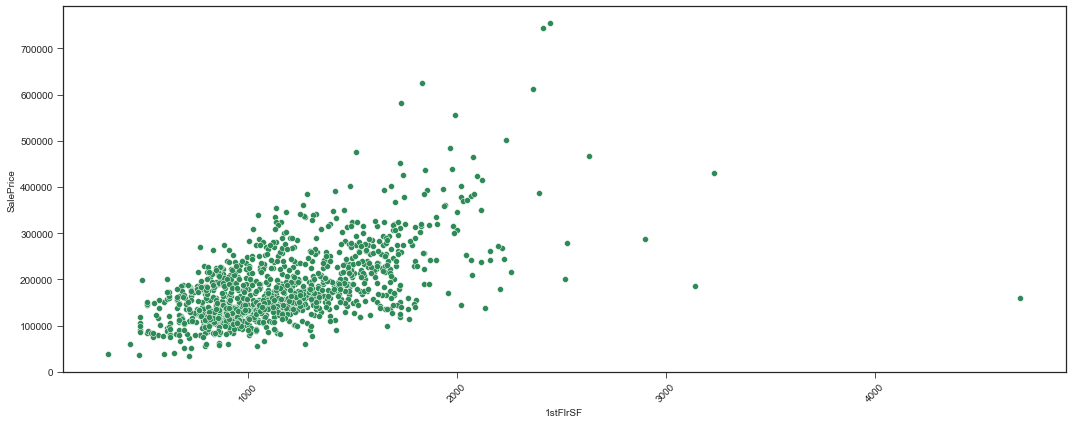

<Figure size 432x288 with 0 Axes>

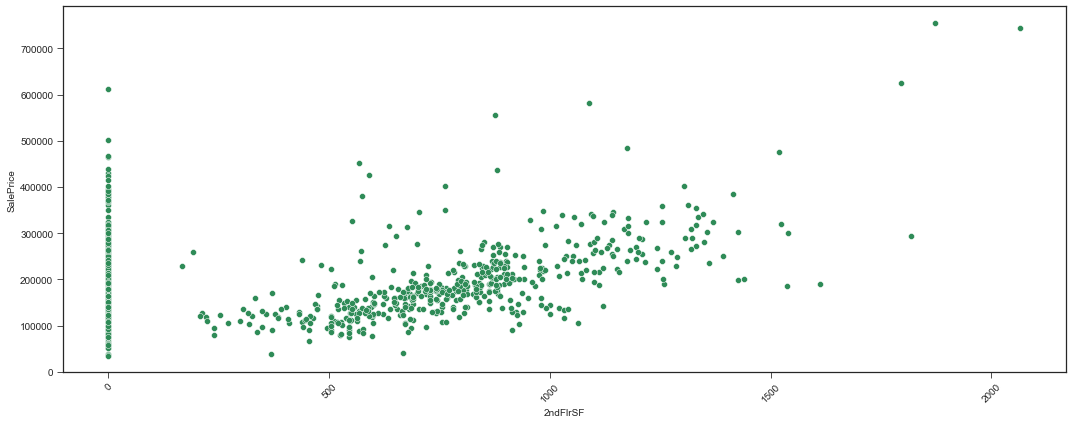

<Figure size 432x288 with 0 Axes>

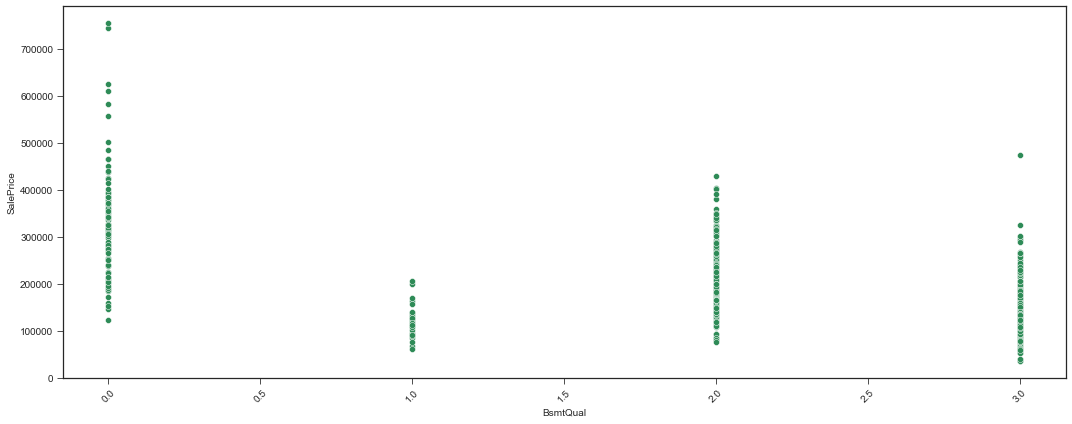

<Figure size 432x288 with 0 Axes>

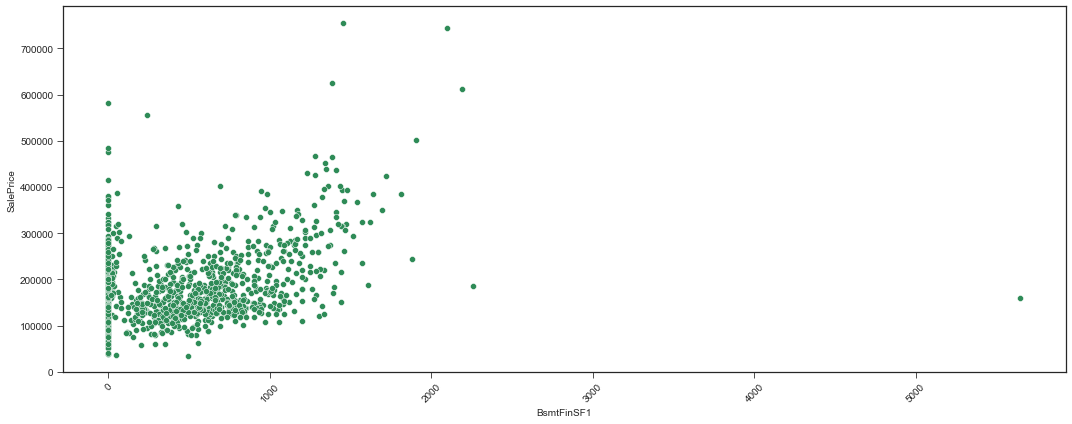

<Figure size 432x288 with 0 Axes>

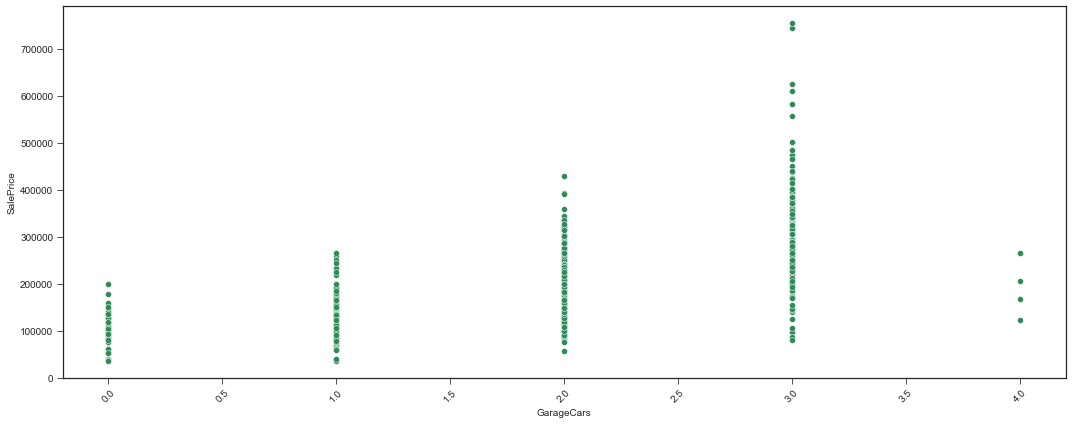

<Figure size 432x288 with 0 Axes>

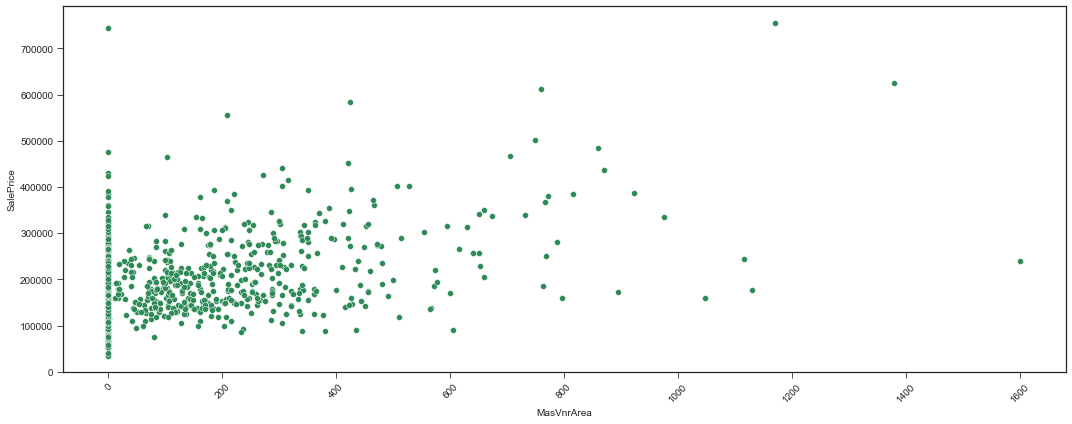

<Figure size 432x288 with 0 Axes>

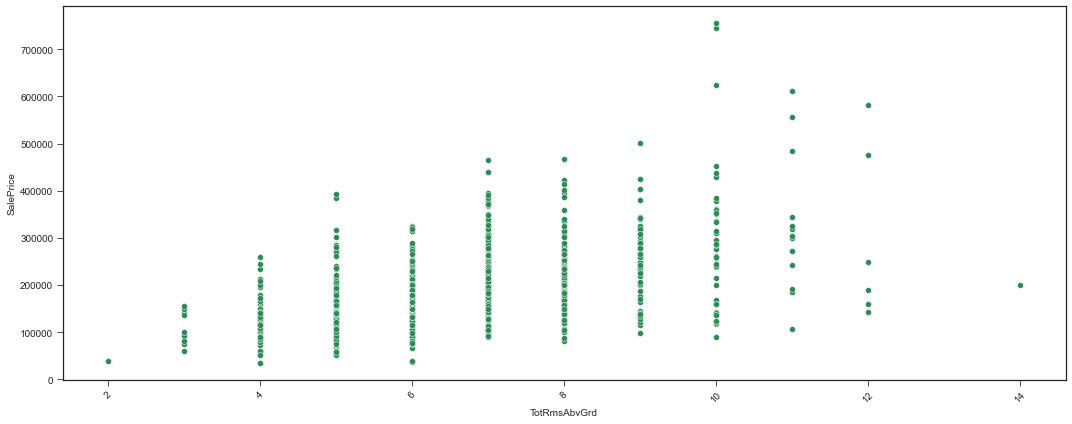

<Figure size 432x288 with 0 Axes>

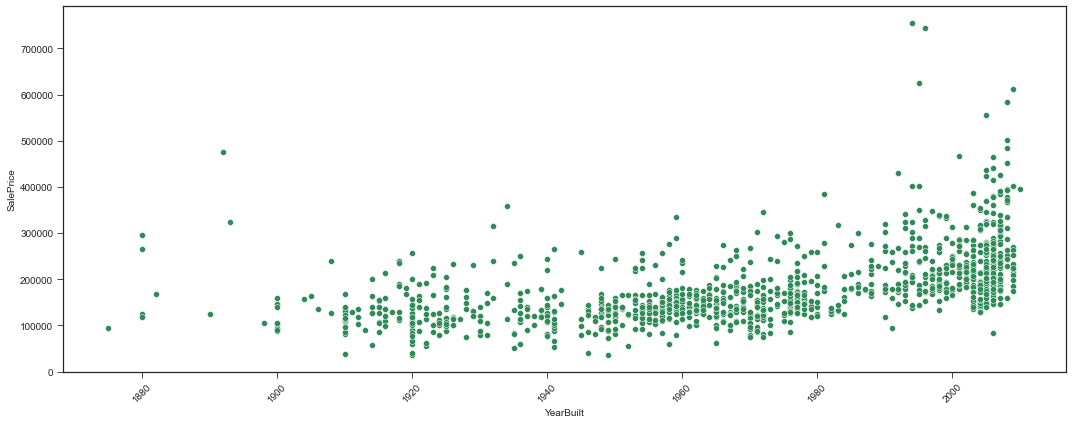

<Figure size 432x288 with 0 Axes>

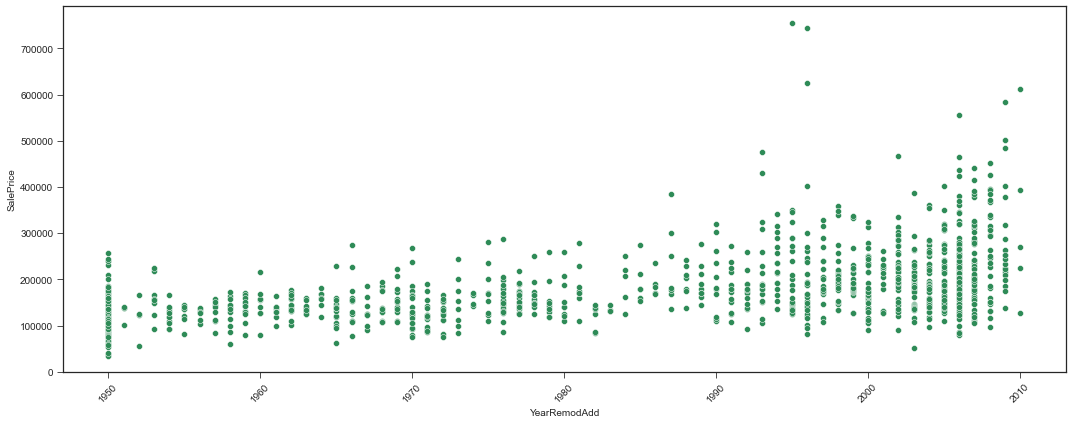

<Figure size 432x288 with 0 Axes>

In [64]:
for i in top2_features:
    plt.figure(figsize=(15,6))
    sns.scatterplot(x=df_train[i],y=df_train['SalePrice'],c ="seagreen")
    plt.xticks(rotation=45)
    plt.figure()

In [65]:
features = X
target =Y

In [66]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

# Build Model

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # instance for linearregression

# Find the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Get the random state value where training r2-score = testing r2-score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


Random State  Training R2 Score  Testing R2 Score  Difference in R2 Score
2           493          83.103697         83.092810                0.010887
0           137          82.824404         82.841372                0.016968
4           680          83.239467         83.167954                0.071514
1           355          83.167471         83.243294                0.075823
3           561          82.948120         82.872282                0.075838

In [68]:
# best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BestRandomState=np.array(RSN)[0]
print("BestRandom State from Linear Regression",BestRandomState)

BestRandom State from Linear Regression 493


In [69]:
# Use the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=BestRandomState)

In [70]:
# Train the model and checkg  metrics with fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.8309281033755271
Mean Absolute Error(MAE) :  22934.64256754482
Mean Squared Error(MSE) :  1239243394.6111305
Root Mean Squared Error(RMSE) :  35202.889009442544


# Cross Validation for Linear Regression

In [71]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Find the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation Details with Folds")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation Details with Folds


No of Folds  Cross Validation R2 Score  Model R2 Score  \
2            4               7.597843e+01        83.09281   
6            8               7.589802e+01        83.09281   
4            6               7.564563e+01        83.09281   
8           10               7.562532e+01        83.09281   
3            5               7.417816e+01        83.09281   
1            3               7.371458e+01        83.09281   
7            9               7.240729e+01        83.09281   
5            7               7.230519e+01        83.09281   
0            2              -2.396327e+25        83.09281   

   Difference in R2 Score  
2            7.114385e-02  
6            7.194792e-02  
4            7.447181e-02  
8            7.467491e-02  
3            8.914648e-02  
1            9.378228e-02  
7            1.068552e-01  
5            1.078762e-01  
0            2.396327e+23

In [72]:
# Get best no. of folds where the least difference between cross validation score & model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
print("Best Cross Validation score is :",BCV)

Best Cross Validation score is : 4


In [73]:
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 75.97842515502737 
The model r2 score is: 83.09281033755272
Difference is: 0.0711438518252534


# More Machine Learning Models for Regression with Evaluation Metrics 

In [74]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# list of all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]


#  empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop  all algorithms to train the model & check for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         #  "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          #  "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))#  "RMSE" to the list 
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                #  "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    #  "Model" to the list

#e dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("DataFrame with all model metrics")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["MAE"],ascending=True) 

DataFrame with all model metrics


Model  Model R2 Score  Cross Validation R2 Score  \
10  GradientBoostingRegressor()       88.857860                  83.671081   
8       RandomForestRegressor()       88.410675                  83.929636   
9         ExtraTreesRegressor()       88.200551                  82.490560   
12               XGBRegressor()       87.542989                  81.446330   
7                  ElasticNet()       83.121136                  78.904449   
6                       Ridge()       83.107514                  76.008362   
5                       Lasso()       83.095267                  75.977739   
0            LinearRegression()       83.092810                  75.978425   
3                SGDRegressor()       82.876858                  75.751067   
11          AdaBoostRegressor()       81.205542                  78.714643   
2         KNeighborsRegressor()       78.365553                  72.504415   
1       DecisionTreeRegressor()       80.347582                  69.360010   
4                         SVR()       -8.018133                  -5.896549   

    Difference in R2 Score           MAE           MSE          RMSE  
10                0.051868  17496.184121  8.166835e+08  28577.674809  
8                 0.044810  18216.054103  8.494608e+08  29145.510261  
9                 0.057100  18239.910128  8.648622e+08  29408.540142  
12                0.060967  19300.201656  9.130594e+08  30216.872824  
7                 0.042167  21694.196661  1.237167e+09  35173.387363  
6                 0.070992  22916.022186  1.238166e+09  35187.578659  
5                 0.071175  22930.783239  1.239063e+09  35200.331582  
0                 0.071144  22934.642568  1.239243e+09  35202.889009  
3                 0.071258  23231.814865  1.255072e+09  35426.996063  
11                0.024909  25151.824085  1.377574e+09  37115.685951  
2                 0.058611  25857.382051  1.585736e+09  39821.305404  
1                 0.109876  26221.666667  1.440460e+09  37953.391179  
4                 0.021216  61801.419124  7.917387e+09  88979.697819

Observations:

Best model( Gradient Boosting Regressor) for this dataset because of:

1.highest R^2 score

2.lowest MAE & root mean squared error
Out of all algorithms checked,Gradient Boosting Regressor model is selected for hyper parameter tuning

as the difference between model and cross-validation score is also less 

# Hyper Parameter Tuning

In [75]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
# Defining parameters for  Gradient Boosting Regressor
parameters = {
            'learning_rate':[0.05,0.5],
             'n_estimators':[200, 500],
            'max_depth':[2, 4],
            'min_samples_split':[5,9],
            'min_samples_leaf':[4,9],
            'loss':['quantile', 'huber'],
            'max_features':['sqrt', 'log2']                
            }

GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=BCV)  
GCV.fit(x_train,y_train)   #  GridSearchCV to train model with all combination of parameters
GCV.best_params_ 

{'learning_rate': 0.05,
 'loss': 'huber',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 500}

In [76]:
GbR=GradientBoostingRegressor(learning_rate=GCV.best_params_['learning_rate'],n_estimators=GCV.best_params_['n_estimators'],
                              max_depth=GCV.best_params_['max_depth'],
            min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'],
            loss=GCV.best_params_['loss'],max_features=GCV.best_params_['max_features'])
GbR.fit(x_train,y_train)
GbR.score(x_train,y_train)
pred_decision=GbR.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(GbR,features,target,cv=2)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)

R2 Score: 88.2559692174851
Cross Val Score: 85.19394734634989
Difference is: 0.03062021871135212


Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.0306

Model with default parameters: The difference between Cross Validation Score and model score is 0.051

As difference is less in the model with Tuned parameters
We will consider the Gradient Bossting Regression model with Tuned parameters

In [77]:
#models selected ===GradientBoostingRegressor()
print(GbR)
x_predict = list(GbR.predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=4,
                          min_samples_split=5, n_estimators=500)


0
0  146587.047717
1  118089.953447
2  112850.106554
3  132810.445602
4  192392.673860
5  241339.053813
6  123242.417106
7  206557.285363
8  370780.153366
9  338118.478305

# Save Model

In [78]:
#GradientBoostingRegressor()
print("Model Saved--", GbR)
import pickle
file = 'HousingPrice_predict'
save = pickle.dump(GbR,open('HousingPrice_predict.pkl','wb'))

Model Saved-- GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=4,
                          min_samples_split=5, n_estimators=500)


In [79]:
#Importing and Pre processing the Testing Dataset to predict the SalePrice column for Surprise Housing Project

#Housing Price test data
df_test = pd.read_csv('housing_price_test.csv')
display(df_test.head())
print(df_test.shape)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

(292, 80)


In [80]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [81]:
print("Missing column values in percentage:")
for col in df_test:
    percentage = np.round((df_test[col].isnull().sum()/df_test.shape[0])*100, 3)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 15.411 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 95.205 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.342 %
MasVnrArea : 0.342 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.397 %
BsmtCond : 2.397 %
BsmtExposure : 2.397 %
BsmtFinType1 : 2.397 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.397 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.342 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
Be

In [82]:
# data preprocessing 1
df_test.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

# data preprocessing 2
df_test.drop(["Id", "Utilities"], axis=1, inplace=True)

# data preprocessing 3
for i in mode:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])
    
for j in mean:
    df_test[j] = df_test[j].fillna(df_test[j].mean())
    
print("Missing values count after filling the data")
print(df_test.isna().sum())

Missing values count after filling the data
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Kitche

In [83]:
df_test.dropna(inplace=True)

In [84]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

X=ordinal_encode(df_test, object_datatype)
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20       2.0    86.000000    14157     1.0       0.0          1.0   
1         120       2.0    66.425101     5814     1.0       0.0          3.0   
2          20       2.0    66.425101    11838     1.0       3.0          3.0   
3          70       2.0    75.000000    12000     1.0       3.0          0.0   
4          60       2.0    86.000000    14598     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0         2.0            9            5       2005          2006        3.0   
1         2.0            8            5       1984          1984        1.0   
2         2.0            8            5       2001          2001        3.0   
3         5.0            7            7       1941          1950        1.0   
4         5.0            6            5       2007          2007        1.0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       0.0          9.0         11.0         3.0       200.0        2.0   
1       0.0          5.0          5.0         2.0         0.0        2.0   
2       0.0          9.0         11.0         2.0         0.0        2.0   
3       0.0          6.0          7.0         2.0         0.0        3.0   
4       0.0          9.0         11.0         3.0        74.0        2.0   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        3.0         2.0       0.0       2.0           1.0           2.0   
1        3.0         1.0       2.0       2.0           0.0           2.0   
2        3.0         2.0       2.0       2.0           0.0           5.0   
3        3.0         1.0       3.0       2.0           3.0           4.0   
4        3.0         2.0       2.0       2.0           2.0           5.0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0        1249           5.0           0        673         1922      0.0   
1        1036           5.0           0        184         1220      0.0   
2           0           5.0           0       1753         1753      0.0   
3         275           5.0           0        429          704      0.0   
4           0           5.0           0        894          894      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.0         1.0         3.0      1922         0             0   
1        2.0         1.0         3.0      1360         0             0   
2        0.0         1.0         3.0      1788         0             0   
3        0.0         1.0         3.0       860       704             0   
4        0.0         1.0         3.0       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1          2.0             8         5.0           1   
1             1          2.0             4         5.0           1   
2             1          0.0             7         5.0           1   
3             1          1.0   

In [85]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(X.shape[0], X.shape[1]))

Shape of our data frame post encoding shows 291 Rows and 73 columns



In [86]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -0.853206 -0.287539     0.981237  0.263209  0.083189 -1.399044   
1    1.431957 -0.287539     0.001131 -0.362646  0.083189 -1.399044   
2   -0.853206 -0.287539     0.001131  0.089248  0.083189  0.747468   
3    0.289375 -0.287539     0.430472  0.101401  0.083189  0.747468   
4    0.060859 -0.287539     0.981237  0.296291  0.083189 -1.399044   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.561070  -1.996853  -0.226683      1.565691   -0.028813   -0.058722   
1     0.299857  -1.347597  -0.226683      1.565691   -0.028813   -0.058722   
2     0.299857   0.600171  -0.226683     -1.279817   -0.028813   -0.058722   
3    -3.991534   0.600171  -0.226683     -1.112435   -0.028813   -0.058722   
4     0.299857  -1.347597  -0.226683      1.398308   -1.226597   -0.058722   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0 -0.445557   -0.514474     2.153685    -0.465573   1.069591      1.035620   
1  2.716810   -0.514474     1.415496    -0.465573   0.378434     -0.060798   
2 -0.445557   -0.514474     1.415496    -0.465573   0.937942      0.786434   
3 -0.445557    1.023662     0.677307     1.416119  -1.036792     -1.755261   
4 -0.445557    1.023662    -0.060882    -0.465573   1.135415      1.085457   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0   1.842103 -0.078893     0.696166     0.735003    1.950458    0.518025   
1  -0.524572 -0.078893    -1.042755    -1.245422    0.356123   -0.627376   
2   1.842103 -0.078893     0.696166     0.735003    0.356123   -0.627376   
3  -0.524572 -0.078893    -0.608025    -0.585280    0.356123   -0.627376   
4  -0.524572 -0.078893     0.696166     0.735003    1.950458   -0.203578   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0  -0.854804   0.327408    0.778247 -2.546417  0.219394     -1.189309   
1  -0.854804   0.327408   -0.515866 -0.304337  0.219394     -2.085913   
2  -0.854804   0.327408    0.778247 -0.304337  0.219394     -2.085913   
3   0.634705   0.327408   -0.515866  0.816703  0.219394      0.603898   
4  -0.854804   0.327408    0.778247 -0.304337  0.219394     -0.292706   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -0.373566    1.884854      0.296598   -0.303826   0.280079     2.074218   
1     -0.373566    1.388101      0.296598   -0.303826  -0.909940     0.413839   
2      1.290327   -1.028032      0.296598   -0.303826   2.908342     1.674497   
3      0.735696   -0.386684      0.296598   -0.303826  -0.313714    -0.806610   
4      1.290327   -1.028032      0.296598   -0.303826   0.817899    -0.357220   

    Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0 -0.142128  -0.877060    0.249086    0.313198  2.148733 -0.798810   
1 -0.142128   0.646668    0.249086    0.313198  0.614321 -0.798810   
2 -0.142128  -0.877060    0.249086    0.313198  1.782877 -0.798810   
3 -0.142128  -0.877060    0.249086    0.313198 -0.750815  0.861911   
4 -0.142128  -0.877060    0.249086    0.313198 -0.657986  1.652169   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.097197   0.864807      1.129204     -0.264297  0.778597 -0.724391   
1     -0.097197  -0.228203      1.129204     -0.264297 -1.048595 -0.724391   
2     -0.097197   0.604196     -0.838451     -0.264297  0.778597 -0.724391   
3     -0.097197   0.168548     -0.838451     -0.264297 -1.048595  1.302511   
4     -0.097197   0.886200     -0.838451     -0.264297  0.778597  1.302511   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0      0.255419     -0.218287    -0.470298      0.916902    0.225226   
1     -2.222142     -0.218287    -0.470298     -1.398225    0.225226   
2      0.255419     -0.218287    -2.914166      0.338120    0.225226   
3      0.255419     -0.218287    -1.692232      0.338120    0.225226   
4      1.49

# Conclusion

In [87]:
pickled_HousingPrice_predict = pickle.load(open('HousingPrice_predict.pkl','rb'))
houseprice_Predicted=pickled_HousingPrice_predict.predict(X)
df_predicted = pd.DataFrame(houseprice_Predicted, columns =['houseprice_Predicted'])
print("\n Houseprice_Predicted list based on Test data provided: ")
display(df_predicted)


 Houseprice_Predicted list based on Test data provided: 


houseprice_Predicted
0           349719.556480
1           191677.842294
2           267746.752010
3           185958.117139
4           224491.503381
5            80292.253697
6           136519.545844
7           316222.506789
8           249255.746390
9           170002.386022
10           80551.651603
11          138982.660025
12          113075.872328
13          198915.124359
14          324612.817867
15          126810.794333
16          124805.758008
17          125455.433375
18          177190.884296
19          206075.862063
20          145990.720341
21          143456.359568
22          146654.783187
23           84632.035329
24           99072.023155
25          123614.788811
26          173566.988663
27          146466.342230
28          170295.484237
29           93281.396497
30          140544.290282
31          197161.097244
32          235172.508158
33          169810.203224
34          118125.318862
35          168565.691158
36          190630.074956
37          116087.631101
38          157105.574085
39          145052.124934
40          106340.015004
41          325339.483648
42          199304.208468
43          187763.399164
44          142975.379928
45          127134.808920
46          132158.415042
47          101228.947239
48          214731.114413
49          335990.913223
50          138979.250652
51          218336.741655
52          100849.925022
53           98342.661950
54          277721.304056
55          138982.397391
56          164245.817934
57          186328.470065
58           99872.124396
59          250282.776047
60           92522.620326
61          188503.543176
62          124486.220489
63          148058.673784
64          205159.530493
65           91783.342226
66          159649.581171
67          197625.229387
68          142008.285518
69          158377.803672
70          300124.047725
71          159276.112166
72          194418.721414
73          156041.431543
74          146972.075917
75          228706.076127
76          321358.864099
77          196982.138598
78          301578.210612
79          140965.036198
80          202140.135922
81          141624.014953
82          144168.150098
83          163540.021870
84          174353.304937
85          241699.059954
86          111276.244651
87          381872.675075
88          149810.912483
89          173054.929918
90          239550.310266
91          129576.941291
92          148650.470076
93          118379.830421
94          196227.923669
95          157569.457249
96          228681.780700
97          169135.234680
98          375291.319331
99          131583.442716
100         256834.711756
101         106368.627762
102         116545.725072
103         184954.204382
104         145049.161927
105         287622.008113
106         137817.648336
107         189056.181034
108         209602.780246
109         213362.616096
110         169826.417905
111         198968.295930
112         276261.845973
113         130650.185118
114          88467.683273
115         133757.196408
116         181822.076451
117         147013.160830
118         103567.681251
119         100470.553767
120         193295.959093
121         234862.970788
122         142059.300536
123         138847.798964
124         176289.380169
125         121548.122250
126         176387.341781
127         107109.993318
128         108290.789504
129         146447.045925
130         226267.935057
131         140367.947215
132         149924.916953
133         188768.051523
134         309538.488937
135         205873.885171
136         118903.488913
137         300596.703115
138         122451.841317
139         114934.500551
140         447173.769345
141          88400.166623
142         389655.353316
143         208537.671791
144         230007.220708
145         153309.583847
146         127592.188030
147         111925.924333
148         195014.370615
149         184049.296636
150         144243.955304
151         192508.704592
152         116236.189467
1

# Inference:

With insights of the provided dataset, we were able to derive that the Housing prices are done on basis of different features. 

First, we loaded the train dataset and did the EDA process and other pre-processing techniques like outlier and skewness check, handling the null values present, filling the missing data with mean and mode, visualizing the distribution of data, etc. -> Then we did the model training, building the model and finding out the best model on the basis of different metrices scores we got like R2 score, Cross Validation score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

We got Gradient Boosting Regressor as the best algorithm among all as it gave more r2_score and cross_val_score. Then for finding out the best parameter and improving the scores, we performed Hyperparameter Tuning. But considered the Model( GradientBoostingRegressor) with Tune parameters
 

We saved the model in a pickle with a filename in order to use whenever we require. -> We predicted the values obtained and saved it separately in a csv file.

Then we used the test dataset and performed all the pre-processing pipeline methods to it. -> After treating missing values, we loaded the saved model that we obtained and did the predictions over the test data and then saving the predictions separately in a csv file.


Overall, we can say that this dataset is good for predicting the Housing prices using regression analysis and Graident Boosting Regressor is the best working algorithm model we obtained.


We can improve the data by adding more features that are positively correlated with the target variable, having less outliers, normally distributed values, etc. -> Also we can work upon many factors to originally improve the quality of our features before providing it as an input for our machine learning models.